does mfd include boundary layer MFD too? in that case, will not see dry/wet LT humidity signal 

monthly plots of integrated moisture flux convergence

do high BLT days correspond to high moisture flux convergence days? 

should i use vimd as an average over pre-afternoon hours for everyday? or an average of vimd per day? 


- VIMD "The vertical integral of the moisture flux is the horizontal rate of flow of moisture (water vapour, cloud liquid and cloud ice), per metre across the flow, for a column of air extending from the surface of the Earth to the top of the atmosphere. Its horizontal divergence is the rate of moisture spreading outward from a point, per square metre." (kg/m^2)

- VIWFD "The vertical integral of the moisture flux is the horizontal rate of flow of moisture, per metre across the flow, for a column of air extending from the surface of the Earth to the top of the atmosphere. Its horizontal divergence is the rate of moisture spreading outward from a point, per square metre." (kg/m^2*s) 



In [ ]:
import pandas as pd
from func import cal_buoyancy,sounding_cal
import glob
import os
from haversine import haversine, Unit
import re
import datetime
import metpy.calc as mpcalc
from metpy.units import units
from datetime import datetime, timedelta
from metpy import constants
from metpy.cbook import get_test_data
from metpy.plots import add_metpy_logo, SkewT
from pyhdf import SD
from scipy.interpolate import interp1d
from scipy.optimize import bisect
import numpy as np
import pickle
import numpy as np
import math
import pint
import seaborn as sns
import tropycal.tracks as tracks
from pydoc import help
from pyhdf.SD import *
from sklearn.preprocessing import QuantileTransformer
import xarray as xr
import netCDF4 as nc
import re
import matplotlib.pyplot as plt
from numpy import load
from numpy import asarray
from numpy import save
import pytz
from scipy import stats
from sklearn.linear_model import LinearRegression
from collections import Counter
import pymannkendall as mk
from io import StringIO 
import requests
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [427]:
cd ../../data/rong1/climate_fu/Data/DOEARM/sgp/era5/era5scripts

/data/rong1/climate_fu/Data/DOEARM/sgp/era5/era5scripts


In [224]:
pd.set_option('display.max_rows', None)

pd.set_option('display.max_columns', None)

In [275]:
with open('soundings_fig1&4_final.pdkl','rb') as file:
    
    bltdf = pickle.load(file)

(2435, 15)

In [410]:
with open('soundings_fig2&3.pdkl','rb') as file:
    
    couplingdf = pickle.load(file)

In [158]:
%run rda-download.py

pdsi = xr.open_dataset('pdsisc.monthly.maps.1850-2018.fawc-1.r2.5x2.5.ipe-2.nc', decode_times=False)

downloading pdsisc.monthly.maps.1850-2018.fawc-1.r2.5x2.5.ipe-2.nc ... done


In [319]:
path = "../../data/rong1/climate_fu/Data/DOEARM/sgp/era5/era5_2010_2017_ivt_mfd.nc"

mf = xr.open_dataset(path)

In [346]:
sgp = (36.607322, -97.487643)

max_distance = 100.0 

pairs = []

index_of_pairs = []
    
all_lats = mf.variables["latitude"].data.shape[0]

all_lons = mf.variables["longitude"].data.shape[0]
    
for i in range(all_lats):
    
    for j in range(all_lons):

        lat = mf.variables["latitude"].data[i]

        lon = mf.variables["longitude"].data[j]

        lat_lon_pair = (lat,lon)

        distance = haversine(sgp, lat_lon_pair, unit='km')

        if distance <= max_distance:

            pair = (lat, lon)

            index = (i,j)

            pairs.append(pair)

            index_of_pairs.append(index)

In [444]:
diurn = []

timeidx = mf['time'].data.shape[0]

for i in range(timeidx):
    
    time = pd.to_datetime(mf['time'].data[i])
    
    lst = time - timedelta(hours=6)

    vimc_array = mf['vimd'][i].data
    
    ivt_x_array = mf['p71.162'][i].data
    
    ivt_y_array = mf['p72.162']

    vimc_collect = []
    
    ivt_collect = []

    for elem in index_of_pairs:

        lat = elem[0]

        lon = elem[1]

        vimc = -vimc_array[lat,lon]
        
        ivt_x = ivt_x_array[lat,lon]
        
        ivt_y = ivt_y_array[lat,lon]
        
        total_ivt = np.sqrt(ivt_x**2 + ivt_y**2)

        vimc_collect.append(vimc)
        
        ivt_collect.append(total_ivt)
    
    
    tup = (lst, np.nanmean(vimc_collect), np.nanmean(ivt_collect))
    print(tup)
    
    diurn.append(tup)

(Timestamp('2010-04-30 18:00:00'), 0.007200029, 344.38025)
(Timestamp('2010-04-30 19:00:00'), 0.015195041, 347.26364)
(Timestamp('2010-04-30 20:00:00'), -0.05649346, 346.043)
(Timestamp('2010-04-30 21:00:00'), -0.09468575, 345.6135)
(Timestamp('2010-04-30 22:00:00'), 0.041439183, 346.02097)
(Timestamp('2010-04-30 23:00:00'), -0.059376355, 343.5633)
(Timestamp('2010-05-01 00:00:00'), 0.069972016, 342.88867)
(Timestamp('2010-05-01 01:00:00'), 0.6264498, 347.5254)
(Timestamp('2010-05-01 02:00:00'), 0.48821458, 354.27917)
(Timestamp('2010-05-01 03:00:00'), 0.33161134, 363.0462)
(Timestamp('2010-05-01 04:00:00'), 0.40401328, 387.38812)
(Timestamp('2010-05-01 05:00:00'), 0.7077087, 379.88245)
(Timestamp('2010-05-01 06:00:00'), 0.6830991, 386.5574)
(Timestamp('2010-05-01 07:00:00'), 0.75660086, 383.8581)
(Timestamp('2010-05-01 08:00:00'), 0.7519046, 372.05716)
(Timestamp('2010-05-01 09:00:00'), 0.39271894, 358.36954)
(Timestamp('2010-05-01 10:00:00'), 0.08572443, 352.0994)
(Timestamp('2010-05

(Timestamp('2010-05-06 20:00:00'), 0.35571557, 324.4961)
(Timestamp('2010-05-06 21:00:00'), -1.4835768, 335.92508)
(Timestamp('2010-05-06 22:00:00'), -2.0924535, 343.495)
(Timestamp('2010-05-06 23:00:00'), -1.3604993, 350.58124)
(Timestamp('2010-05-07 00:00:00'), -0.7114687, 369.69614)
(Timestamp('2010-05-07 01:00:00'), 0.20354094, 397.97372)
(Timestamp('2010-05-07 02:00:00'), -0.95595855, 394.56693)
(Timestamp('2010-05-07 03:00:00'), 0.09244164, 384.51035)
(Timestamp('2010-05-07 04:00:00'), 1.3204792, 370.7219)
(Timestamp('2010-05-07 05:00:00'), 1.1323115, 346.268)
(Timestamp('2010-05-07 06:00:00'), 1.0099181, 324.04083)
(Timestamp('2010-05-07 07:00:00'), 0.3997035, 310.84537)
(Timestamp('2010-05-07 08:00:00'), 0.16502164, 309.46637)
(Timestamp('2010-05-07 09:00:00'), -0.20242661, 315.32318)
(Timestamp('2010-05-07 10:00:00'), -0.73411644, 322.50168)
(Timestamp('2010-05-07 11:00:00'), -1.2226208, 330.11664)
(Timestamp('2010-05-07 12:00:00'), -1.6025225, 334.035)
(Timestamp('2010-05-07 

(Timestamp('2010-05-12 19:00:00'), 1.2391905, 408.39334)
(Timestamp('2010-05-12 20:00:00'), 0.77808946, 402.2489)
(Timestamp('2010-05-12 21:00:00'), 1.6035181, 344.40228)
(Timestamp('2010-05-12 22:00:00'), -2.4188561, 312.91443)
(Timestamp('2010-05-12 23:00:00'), -1.2153687, 343.9048)
(Timestamp('2010-05-13 00:00:00'), -0.41642216, 407.40567)
(Timestamp('2010-05-13 01:00:00'), 2.9440522, 461.61456)
(Timestamp('2010-05-13 02:00:00'), 1.2758669, 486.1111)
(Timestamp('2010-05-13 03:00:00'), 0.6827424, 492.53952)
(Timestamp('2010-05-13 04:00:00'), -0.758934, 594.34607)
(Timestamp('2010-05-13 05:00:00'), -2.892649, 526.04877)
(Timestamp('2010-05-13 06:00:00'), -3.0321913, 423.80362)
(Timestamp('2010-05-13 07:00:00'), -2.236336, 351.11975)
(Timestamp('2010-05-13 08:00:00'), -1.1409162, 314.0921)
(Timestamp('2010-05-13 09:00:00'), -1.0657802, 299.83643)
(Timestamp('2010-05-13 10:00:00'), -1.679383, 294.3435)
(Timestamp('2010-05-13 11:00:00'), -1.851471, 288.99896)
(Timestamp('2010-05-13 12:00

(Timestamp('2010-05-18 18:00:00'), 0.56385607, 265.73648)
(Timestamp('2010-05-18 19:00:00'), 0.68538773, 265.7376)
(Timestamp('2010-05-18 20:00:00'), 0.098861314, 263.5331)
(Timestamp('2010-05-18 21:00:00'), -0.021927262, 261.3284)
(Timestamp('2010-05-18 22:00:00'), 0.70328015, 261.57504)
(Timestamp('2010-05-18 23:00:00'), 1.2011468, 263.06604)
(Timestamp('2010-05-19 00:00:00'), 1.4312516, 266.94553)
(Timestamp('2010-05-19 01:00:00'), 1.642067, 273.6973)
(Timestamp('2010-05-19 02:00:00'), 1.984787, 279.75024)
(Timestamp('2010-05-19 03:00:00'), 3.0573804, 288.152)
(Timestamp('2010-05-19 04:00:00'), 2.3446863, 276.94327)
(Timestamp('2010-05-19 05:00:00'), 2.0686018, 306.6712)
(Timestamp('2010-05-19 06:00:00'), 2.4170282, 358.58923)
(Timestamp('2010-05-19 07:00:00'), 1.9936143, 403.68314)
(Timestamp('2010-05-19 08:00:00'), 1.279166, 411.78345)
(Timestamp('2010-05-19 09:00:00'), 0.7714316, 381.0161)
(Timestamp('2010-05-19 10:00:00'), 0.7763655, 332.79874)
(Timestamp('2010-05-19 11:00:00'),

(Timestamp('2010-05-24 19:00:00'), 1.0540248, 263.09592)
(Timestamp('2010-05-24 20:00:00'), 1.2467102, 266.0754)
(Timestamp('2010-05-24 21:00:00'), 0.41917127, 263.63168)
(Timestamp('2010-05-24 22:00:00'), -0.068411894, 265.13458)
(Timestamp('2010-05-24 23:00:00'), -0.31682503, 268.93445)
(Timestamp('2010-05-25 00:00:00'), -0.104969576, 272.2215)
(Timestamp('2010-05-25 01:00:00'), 0.7385597, 278.2995)
(Timestamp('2010-05-25 02:00:00'), 0.29434043, 285.48642)
(Timestamp('2010-05-25 03:00:00'), 0.79993474, 294.86932)
(Timestamp('2010-05-25 04:00:00'), 1.9069462, 317.8319)
(Timestamp('2010-05-25 05:00:00'), 2.3222163, 328.4947)
(Timestamp('2010-05-25 06:00:00'), 2.7755897, 332.8459)
(Timestamp('2010-05-25 07:00:00'), 2.3772013, 310.10904)
(Timestamp('2010-05-25 08:00:00'), 0.9637305, 284.86404)
(Timestamp('2010-05-25 09:00:00'), -0.41178554, 270.31558)
(Timestamp('2010-05-25 10:00:00'), -1.0515137, 262.66983)
(Timestamp('2010-05-25 11:00:00'), -1.0917864, 259.9458)
(Timestamp('2010-05-25 

(Timestamp('2010-05-30 18:00:00'), 1.622956, 291.02618)
(Timestamp('2010-05-30 19:00:00'), 1.7229692, 296.80807)
(Timestamp('2010-05-30 20:00:00'), 0.7620398, 292.67038)
(Timestamp('2010-05-30 21:00:00'), 1.5539126, 284.50925)
(Timestamp('2010-05-30 22:00:00'), 1.362149, 278.20505)
(Timestamp('2010-05-30 23:00:00'), 0.45694736, 281.63873)
(Timestamp('2010-05-31 00:00:00'), -0.6995801, 291.23038)
(Timestamp('2010-05-31 01:00:00'), 1.2212981, 309.7992)
(Timestamp('2010-05-31 02:00:00'), 1.322084, 329.7612)
(Timestamp('2010-05-31 03:00:00'), -1.6688313, 348.88354)
(Timestamp('2010-05-31 04:00:00'), -1.8940027, 337.53168)
(Timestamp('2010-05-31 05:00:00'), -0.99730146, 325.47736)
(Timestamp('2010-05-31 06:00:00'), -0.9150322, 304.58978)
(Timestamp('2010-05-31 07:00:00'), -1.2968954, 290.6655)
(Timestamp('2010-05-31 08:00:00'), -1.4601264, 283.0814)
(Timestamp('2010-05-31 09:00:00'), -1.4350711, 278.55264)
(Timestamp('2010-05-31 10:00:00'), -1.4397076, 278.33167)
(Timestamp('2010-05-31 11:0

(Timestamp('2010-06-05 17:00:00'), 1.0169322, 347.53055)
(Timestamp('2010-06-05 18:00:00'), 0.8254359, 360.10376)
(Timestamp('2010-06-05 19:00:00'), 0.3473341, 365.62277)
(Timestamp('2010-06-05 20:00:00'), 0.15791821, 356.91763)
(Timestamp('2010-06-05 21:00:00'), 0.010261281, 343.23538)
(Timestamp('2010-06-05 22:00:00'), -0.05066791, 334.83987)
(Timestamp('2010-06-05 23:00:00'), 0.38059244, 328.8286)
(Timestamp('2010-06-06 00:00:00'), 0.9114504, 313.41544)
(Timestamp('2010-06-06 01:00:00'), -0.21761432, 298.13562)
(Timestamp('2010-06-06 02:00:00'), -0.16274829, 284.85928)
(Timestamp('2010-06-06 03:00:00'), 0.15836394, 275.01352)
(Timestamp('2010-06-06 04:00:00'), 0.1414822, 270.65765)
(Timestamp('2010-06-06 05:00:00'), -0.3340636, 265.6112)
(Timestamp('2010-06-06 06:00:00'), -0.8446216, 265.61346)
(Timestamp('2010-06-06 07:00:00'), -1.1034671, 264.45993)
(Timestamp('2010-06-06 08:00:00'), -1.2535613, 266.8613)
(Timestamp('2010-06-06 09:00:00'), -1.150338, 266.4193)
(Timestamp('2010-06-

(Timestamp('2010-06-11 19:00:00'), 0.17857496, 266.4003)
(Timestamp('2010-06-11 20:00:00'), 0.69620645, 266.94406)
(Timestamp('2010-06-11 21:00:00'), -1.2038071, 269.04547)
(Timestamp('2010-06-11 22:00:00'), -1.5951815, 272.5777)
(Timestamp('2010-06-11 23:00:00'), -1.1439182, 280.50757)
(Timestamp('2010-06-12 00:00:00'), -0.9577121, 290.23608)
(Timestamp('2010-06-12 01:00:00'), -0.2865982, 301.33923)
(Timestamp('2010-06-12 02:00:00'), 0.18594567, 319.34195)
(Timestamp('2010-06-12 03:00:00'), 0.16731025, 335.2253)
(Timestamp('2010-06-12 04:00:00'), 0.10085284, 351.21457)
(Timestamp('2010-06-12 05:00:00'), -0.05943608, 373.7077)
(Timestamp('2010-06-12 06:00:00'), -0.3015482, 388.38275)
(Timestamp('2010-06-12 07:00:00'), -0.43086696, 385.95404)
(Timestamp('2010-06-12 08:00:00'), -0.36512282, 374.43274)
(Timestamp('2010-06-12 09:00:00'), -0.13379931, 359.89694)
(Timestamp('2010-06-12 10:00:00'), 0.064205974, 348.46048)
(Timestamp('2010-06-12 11:00:00'), 0.2567426, 336.69498)
(Timestamp('20

(Timestamp('2010-06-17 21:00:00'), -1.161157, 329.3919)
(Timestamp('2010-06-17 22:00:00'), -1.5862056, 325.56418)
(Timestamp('2010-06-17 23:00:00'), -1.2389084, 321.0601)
(Timestamp('2010-06-18 00:00:00'), -0.3828666, 322.54218)
(Timestamp('2010-06-18 01:00:00'), 0.46075177, 329.8305)
(Timestamp('2010-06-18 02:00:00'), 0.5139534, 335.4403)
(Timestamp('2010-06-18 03:00:00'), 0.58709824, 342.2796)
(Timestamp('2010-06-18 04:00:00'), 0.7240258, 370.1342)
(Timestamp('2010-06-18 05:00:00'), 0.7046473, 372.17932)
(Timestamp('2010-06-18 06:00:00'), 0.6257662, 375.31082)
(Timestamp('2010-06-18 07:00:00'), 0.5805299, 381.35843)
(Timestamp('2010-06-18 08:00:00'), 0.43554786, 393.223)
(Timestamp('2010-06-18 09:00:00'), 0.12638354, 398.90607)
(Timestamp('2010-06-18 10:00:00'), -0.06897647, 402.22144)
(Timestamp('2010-06-18 11:00:00'), -0.13162974, 398.6258)
(Timestamp('2010-06-18 12:00:00'), -0.21161045, 387.8349)
(Timestamp('2010-06-18 13:00:00'), -1.1178523, 373.24756)
(Timestamp('2010-06-18 14:0

(Timestamp('2010-06-23 19:00:00'), 0.83191526, 305.45917)
(Timestamp('2010-06-23 20:00:00'), 0.22954729, 291.45953)
(Timestamp('2010-06-23 21:00:00'), 0.21153606, 279.5149)
(Timestamp('2010-06-23 22:00:00'), 0.6989407, 282.1402)
(Timestamp('2010-06-23 23:00:00'), 0.099366635, 288.8943)
(Timestamp('2010-06-24 00:00:00'), -0.90106255, 286.7623)
(Timestamp('2010-06-24 01:00:00'), -0.61297125, 292.2895)
(Timestamp('2010-06-24 02:00:00'), -0.7961751, 292.73648)
(Timestamp('2010-06-24 03:00:00'), -0.46513587, 281.25763)
(Timestamp('2010-06-24 04:00:00'), -0.7388721, 268.2461)
(Timestamp('2010-06-24 05:00:00'), -0.5642873, 266.86945)
(Timestamp('2010-06-24 06:00:00'), -0.09545856, 263.56912)
(Timestamp('2010-06-24 07:00:00'), 0.10991766, 261.72556)
(Timestamp('2010-06-24 08:00:00'), 0.1400258, 260.80432)
(Timestamp('2010-06-24 09:00:00'), 0.25501874, 259.9611)
(Timestamp('2010-06-24 10:00:00'), 0.23355976, 259.47183)
(Timestamp('2010-06-24 11:00:00'), 0.1452568, 259.45557)
(Timestamp('2010-06

(Timestamp('2010-06-29 18:00:00'), -0.14723341, 320.62012)
(Timestamp('2010-06-29 19:00:00'), -0.006085714, 326.07648)
(Timestamp('2010-06-29 20:00:00'), -0.08458049, 328.44965)
(Timestamp('2010-06-29 21:00:00'), -0.30053765, 326.85446)
(Timestamp('2010-06-29 22:00:00'), -0.6403745, 321.8809)
(Timestamp('2010-06-29 23:00:00'), -1.1087574, 314.11502)
(Timestamp('2010-06-30 00:00:00'), -1.3690296, 307.8839)
(Timestamp('2010-06-30 01:00:00'), -0.6663512, 300.03836)
(Timestamp('2010-06-30 02:00:00'), -0.21398841, 292.41293)
(Timestamp('2010-06-30 03:00:00'), -0.11239988, 288.15634)
(Timestamp('2010-06-30 04:00:00'), -0.25301278, 286.76816)
(Timestamp('2010-06-30 05:00:00'), -0.27191576, 288.0462)
(Timestamp('2010-06-30 06:00:00'), 0.001166492, 292.222)
(Timestamp('2010-06-30 07:00:00'), 0.065751605, 292.2479)
(Timestamp('2010-06-30 08:00:00'), -0.45642754, 289.23425)
(Timestamp('2010-06-30 09:00:00'), -0.8760968, 286.1169)
(Timestamp('2010-06-30 10:00:00'), -0.94139487, 284.09567)
(Timesta

(Timestamp('2010-07-05 20:00:00'), 1.0778617, 445.87787)
(Timestamp('2010-07-05 21:00:00'), 1.0316442, 419.72412)
(Timestamp('2010-07-05 22:00:00'), 0.15340072, 386.57385)
(Timestamp('2010-07-05 23:00:00'), -0.005372196, 360.10388)
(Timestamp('2010-07-06 00:00:00'), 0.7372816, 350.09537)
(Timestamp('2010-07-06 01:00:00'), -0.2640692, 350.56915)
(Timestamp('2010-07-06 02:00:00'), -0.13311577, 359.52444)
(Timestamp('2010-07-06 03:00:00'), 0.032671314, 369.91064)
(Timestamp('2010-07-06 04:00:00'), 0.28479975, 360.94263)
(Timestamp('2010-07-06 05:00:00'), 0.2793905, 361.39075)
(Timestamp('2010-07-06 06:00:00'), 0.34676924, 362.3198)
(Timestamp('2010-07-06 07:00:00'), 0.5227214, 360.72354)
(Timestamp('2010-07-06 08:00:00'), 0.6273413, 345.6935)
(Timestamp('2010-07-06 09:00:00'), 0.674569, 332.67087)
(Timestamp('2010-07-06 10:00:00'), 0.53912765, 323.83383)
(Timestamp('2010-07-06 11:00:00'), 0.19744784, 312.42566)
(Timestamp('2010-07-06 12:00:00'), -0.18301845, 297.18463)
(Timestamp('2010-07

(Timestamp('2010-07-11 19:00:00'), -1.7229844, 466.64917)
(Timestamp('2010-07-11 20:00:00'), -0.17532036, 461.48276)
(Timestamp('2010-07-11 21:00:00'), -0.27976218, 476.92996)
(Timestamp('2010-07-11 22:00:00'), 0.44755554, 465.55875)
(Timestamp('2010-07-11 23:00:00'), -0.28401232, 446.4979)
(Timestamp('2010-07-12 00:00:00'), -0.18165118, 432.95667)
(Timestamp('2010-07-12 01:00:00'), -0.4728931, 419.4104)
(Timestamp('2010-07-12 02:00:00'), 0.2188772, 408.86337)
(Timestamp('2010-07-12 03:00:00'), 0.56311315, 397.50067)
(Timestamp('2010-07-12 04:00:00'), 0.6012755, 363.77734)
(Timestamp('2010-07-12 05:00:00'), 0.37979013, 363.9414)
(Timestamp('2010-07-12 06:00:00'), 0.12974209, 370.2267)
(Timestamp('2010-07-12 07:00:00'), 0.23011208, 365.5279)
(Timestamp('2010-07-12 08:00:00'), 0.5038481, 361.45245)
(Timestamp('2010-07-12 09:00:00'), 0.60293984, 367.43542)
(Timestamp('2010-07-12 10:00:00'), 0.69281816, 371.44104)
(Timestamp('2010-07-12 11:00:00'), 0.6910646, 378.7867)
(Timestamp('2010-07-

(Timestamp('2010-07-17 18:00:00'), -0.8804658, 270.38162)
(Timestamp('2010-07-17 19:00:00'), -0.6074133, 269.96484)
(Timestamp('2010-07-17 20:00:00'), -0.65143096, 273.13773)
(Timestamp('2010-07-17 21:00:00'), -1.2587625, 281.8179)
(Timestamp('2010-07-17 22:00:00'), -1.3998213, 290.98917)
(Timestamp('2010-07-17 23:00:00'), -0.8274126, 297.32883)
(Timestamp('2010-07-18 00:00:00'), -0.45562494, 298.77213)
(Timestamp('2010-07-18 01:00:00'), -1.0083578, 299.59323)
(Timestamp('2010-07-18 02:00:00'), -1.0912515, 301.8455)
(Timestamp('2010-07-18 03:00:00'), -1.0015516, 303.46924)
(Timestamp('2010-07-18 04:00:00'), -0.67939913, 305.3107)
(Timestamp('2010-07-18 05:00:00'), -0.22049727, 313.09113)
(Timestamp('2010-07-18 06:00:00'), 0.0706259, 323.6277)
(Timestamp('2010-07-18 07:00:00'), 0.14067967, 325.03217)
(Timestamp('2010-07-18 08:00:00'), 0.0988614, 314.98236)
(Timestamp('2010-07-18 09:00:00'), 0.013857609, 302.13528)
(Timestamp('2010-07-18 10:00:00'), -0.065885335, 291.1952)
(Timestamp('20

(Timestamp('2010-07-23 15:00:00'), -0.20111889, 356.06516)
(Timestamp('2010-07-23 16:00:00'), -0.069333225, 321.5138)
(Timestamp('2010-07-23 17:00:00'), 0.16511086, 322.66818)
(Timestamp('2010-07-23 18:00:00'), -0.49720564, 312.06052)
(Timestamp('2010-07-23 19:00:00'), -0.94285125, 301.85684)
(Timestamp('2010-07-23 20:00:00'), 0.11247389, 332.76016)
(Timestamp('2010-07-23 21:00:00'), 0.89293385, 372.75497)
(Timestamp('2010-07-23 22:00:00'), 0.26063597, 401.7058)
(Timestamp('2010-07-23 23:00:00'), -0.06838209, 426.70956)
(Timestamp('2010-07-24 00:00:00'), -0.45728943, 464.38547)
(Timestamp('2010-07-24 01:00:00'), 0.14929894, 497.7228)
(Timestamp('2010-07-24 02:00:00'), -0.6152598, 500.38284)
(Timestamp('2010-07-24 03:00:00'), -0.71307355, 496.70468)
(Timestamp('2010-07-24 04:00:00'), -0.7003824, 536.2387)
(Timestamp('2010-07-24 05:00:00'), -0.57769156, 526.60266)
(Timestamp('2010-07-24 06:00:00'), 0.046075862, 511.64224)
(Timestamp('2010-07-24 07:00:00'), 0.4949315, 491.2149)
(Timestamp

(Timestamp('2010-07-29 17:00:00'), 0.48776877, 300.97644)
(Timestamp('2010-07-29 18:00:00'), 0.66098636, 306.5406)
(Timestamp('2010-07-29 19:00:00'), -0.6225416, 301.9321)
(Timestamp('2010-07-29 20:00:00'), -0.48629773, 297.13565)
(Timestamp('2010-07-29 21:00:00'), -0.67101765, 297.64017)
(Timestamp('2010-07-29 22:00:00'), -0.12295083, 300.0226)
(Timestamp('2010-07-29 23:00:00'), -0.20082164, 317.95007)
(Timestamp('2010-07-30 00:00:00'), -0.5476433, 339.21646)
(Timestamp('2010-07-30 01:00:00'), -0.8586202, 355.78433)
(Timestamp('2010-07-30 02:00:00'), -1.1562822, 371.2852)
(Timestamp('2010-07-30 03:00:00'), -1.1186548, 377.09454)
(Timestamp('2010-07-30 04:00:00'), -0.7540597, 416.76056)
(Timestamp('2010-07-30 05:00:00'), -0.62257135, 413.67474)
(Timestamp('2010-07-30 06:00:00'), -0.4924798, 413.00992)
(Timestamp('2010-07-30 07:00:00'), -0.43805945, 405.00586)
(Timestamp('2010-07-30 08:00:00'), -0.46064797, 396.50446)
(Timestamp('2010-07-30 09:00:00'), -0.20626082, 388.68753)
(Timestamp

(Timestamp('2010-08-04 15:00:00'), 0.90815127, 336.12317)
(Timestamp('2010-08-04 16:00:00'), 1.0281076, 325.57022)
(Timestamp('2010-08-04 17:00:00'), 1.4323812, 316.21335)
(Timestamp('2010-08-04 18:00:00'), 1.1213739, 316.94946)
(Timestamp('2010-08-04 19:00:00'), 0.7379652, 321.75894)
(Timestamp('2010-08-04 20:00:00'), 0.8625287, 332.96783)
(Timestamp('2010-08-04 21:00:00'), -0.14117034, 328.1785)
(Timestamp('2010-08-04 22:00:00'), 0.10715362, 331.71817)
(Timestamp('2010-08-04 23:00:00'), 0.59848183, 336.9317)
(Timestamp('2010-08-05 00:00:00'), 0.3909653, 340.2821)
(Timestamp('2010-08-05 01:00:00'), 0.77300686, 336.9699)
(Timestamp('2010-08-05 02:00:00'), 0.5500949, 336.9213)
(Timestamp('2010-08-05 03:00:00'), 0.6244287, 330.86615)
(Timestamp('2010-08-05 04:00:00'), 0.66963524, 355.32635)
(Timestamp('2010-08-05 05:00:00'), 0.82843786, 354.57895)
(Timestamp('2010-08-05 06:00:00'), 1.0106016, 360.15085)
(Timestamp('2010-08-05 07:00:00'), 0.7578788, 360.34705)
(Timestamp('2010-08-05 08:00

(Timestamp('2010-08-10 14:00:00'), -0.52538174, 272.105)
(Timestamp('2010-08-10 15:00:00'), -0.512958, 276.87042)
(Timestamp('2010-08-10 16:00:00'), -0.50121814, 277.23547)
(Timestamp('2010-08-10 17:00:00'), -0.7243381, 287.99286)
(Timestamp('2010-08-10 18:00:00'), -0.2883815, 302.9518)
(Timestamp('2010-08-10 19:00:00'), 0.48179454, 287.97388)
(Timestamp('2010-08-10 20:00:00'), 0.3514952, 277.51376)
(Timestamp('2010-08-10 21:00:00'), 0.49790373, 272.8636)
(Timestamp('2010-08-10 22:00:00'), 0.35827163, 272.33044)
(Timestamp('2010-08-10 23:00:00'), -0.07061123, 275.5858)
(Timestamp('2010-08-11 00:00:00'), -0.31299096, 281.33682)
(Timestamp('2010-08-11 01:00:00'), -0.057177056, 290.9605)
(Timestamp('2010-08-11 02:00:00'), -0.13050029, 301.9666)
(Timestamp('2010-08-11 03:00:00'), -0.11287533, 309.43707)
(Timestamp('2010-08-11 04:00:00'), 0.1071537, 337.88455)
(Timestamp('2010-08-11 05:00:00'), 0.17078772, 339.14606)
(Timestamp('2010-08-11 06:00:00'), 0.08691343, 338.3725)
(Timestamp('2010-

(Timestamp('2010-08-16 15:00:00'), -0.2552419, 259.59262)
(Timestamp('2010-08-16 16:00:00'), -0.014169778, 260.4605)
(Timestamp('2010-08-16 17:00:00'), -0.03860122, 263.07617)
(Timestamp('2010-08-16 18:00:00'), 0.3307197, 262.03165)
(Timestamp('2010-08-16 19:00:00'), 0.61500674, 263.83844)
(Timestamp('2010-08-16 20:00:00'), 1.2568748, 266.5803)
(Timestamp('2010-08-16 21:00:00'), 0.90687317, 263.1792)
(Timestamp('2010-08-16 22:00:00'), 0.7234612, 262.54578)
(Timestamp('2010-08-16 23:00:00'), 0.877211, 264.12833)
(Timestamp('2010-08-17 00:00:00'), 0.99939626, 270.6258)
(Timestamp('2010-08-17 01:00:00'), 2.3986602, 288.18796)
(Timestamp('2010-08-17 02:00:00'), 3.9237654, 309.39252)
(Timestamp('2010-08-17 03:00:00'), 3.1161997, 331.7104)
(Timestamp('2010-08-17 04:00:00'), 1.8371, 369.8691)
(Timestamp('2010-08-17 05:00:00'), 1.5575389, 423.07315)
(Timestamp('2010-08-17 06:00:00'), 3.1999552, 504.31497)
(Timestamp('2010-08-17 07:00:00'), 5.3817296, 567.8021)
(Timestamp('2010-08-17 08:00:00')

(Timestamp('2010-08-22 17:00:00'), -0.59020466, 268.64728)
(Timestamp('2010-08-22 18:00:00'), -0.66858035, 269.13284)
(Timestamp('2010-08-22 19:00:00'), -0.7700796, 272.333)
(Timestamp('2010-08-22 20:00:00'), -0.7087638, 276.3228)
(Timestamp('2010-08-22 21:00:00'), -0.33685744, 280.0907)
(Timestamp('2010-08-22 22:00:00'), 0.025062561, 278.9095)
(Timestamp('2010-08-22 23:00:00'), 0.3315817, 275.98132)
(Timestamp('2010-08-23 00:00:00'), 0.6949878, 271.73257)
(Timestamp('2010-08-23 01:00:00'), 1.1871777, 266.87384)
(Timestamp('2010-08-23 02:00:00'), 1.5400923, 264.4556)
(Timestamp('2010-08-23 03:00:00'), 1.3758504, 264.42264)
(Timestamp('2010-08-23 04:00:00'), 1.2125301, 273.7858)
(Timestamp('2010-08-23 05:00:00'), 1.0133659, 271.49774)
(Timestamp('2010-08-23 06:00:00'), 0.68642795, 268.6169)
(Timestamp('2010-08-23 07:00:00'), 0.400922, 266.30493)
(Timestamp('2010-08-23 08:00:00'), 0.5110705, 265.65732)
(Timestamp('2010-08-23 09:00:00'), 0.6271036, 263.7173)
(Timestamp('2010-08-23 10:00:0

(Timestamp('2010-08-28 16:00:00'), -0.9899899, 261.25662)
(Timestamp('2010-08-28 17:00:00'), -0.8920572, 260.14764)
(Timestamp('2010-08-28 18:00:00'), -0.68370867, 260.33517)
(Timestamp('2010-08-28 19:00:00'), -0.44022924, 260.33856)
(Timestamp('2010-08-28 20:00:00'), -0.24689008, 259.50037)
(Timestamp('2010-08-28 21:00:00'), -0.020114347, 259.5273)
(Timestamp('2010-08-28 22:00:00'), 0.6356932, 260.73465)
(Timestamp('2010-08-28 23:00:00'), 1.4453992, 261.72638)
(Timestamp('2010-08-29 00:00:00'), 1.3661315, 260.84534)
(Timestamp('2010-08-29 01:00:00'), 1.4849287, 259.06952)
(Timestamp('2010-08-29 02:00:00'), 1.2747377, 259.26468)
(Timestamp('2010-08-29 03:00:00'), 0.8478163, 261.16333)
(Timestamp('2010-08-29 04:00:00'), 0.5443587, 264.7266)
(Timestamp('2010-08-29 05:00:00'), 0.57868695, 265.1902)
(Timestamp('2010-08-29 06:00:00'), 0.585761, 263.5408)
(Timestamp('2010-08-29 07:00:00'), 0.4540941, 261.56183)
(Timestamp('2010-08-29 08:00:00'), 0.31939578, 260.50098)
(Timestamp('2010-08-29 

(Timestamp('2010-09-03 15:00:00'), -0.09174339, 259.09805)
(Timestamp('2010-09-03 16:00:00'), -0.20967865, 258.79172)
(Timestamp('2010-09-03 17:00:00'), -0.34407988, 258.61237)
(Timestamp('2010-09-03 18:00:00'), -0.43645447, 258.5285)
(Timestamp('2010-09-03 19:00:00'), -0.44314182, 258.6415)
(Timestamp('2010-09-03 20:00:00'), -0.36301258, 258.7291)
(Timestamp('2010-09-03 21:00:00'), -0.23060265, 258.8229)
(Timestamp('2010-09-03 22:00:00'), -0.12431819, 258.80014)
(Timestamp('2010-09-03 23:00:00'), -0.05200543, 258.63498)
(Timestamp('2010-09-04 00:00:00'), 0.016829723, 258.52396)
(Timestamp('2010-09-04 01:00:00'), 0.021169197, 258.4221)
(Timestamp('2010-09-04 02:00:00'), -0.060030494, 258.3663)
(Timestamp('2010-09-04 03:00:00'), -0.02130305, 258.35605)
(Timestamp('2010-09-04 04:00:00'), 0.13657816, 258.41342)
(Timestamp('2010-09-04 05:00:00'), 0.24298142, 258.40616)
(Timestamp('2010-09-04 06:00:00'), 0.24800432, 258.45734)
(Timestamp('2010-09-04 07:00:00'), 0.20579986, 258.5289)
(Timest

(Timestamp('2010-09-09 19:00:00'), 0.4122461, 374.77634)
(Timestamp('2010-09-09 20:00:00'), 1.2044758, 366.63333)
(Timestamp('2010-09-09 21:00:00'), 1.016011, 371.08716)
(Timestamp('2010-09-09 22:00:00'), 0.7316049, 380.19864)
(Timestamp('2010-09-09 23:00:00'), 0.5163608, 390.89243)
(Timestamp('2010-09-10 00:00:00'), 0.36703953, 394.43274)
(Timestamp('2010-09-10 01:00:00'), -0.44911602, 398.8031)
(Timestamp('2010-09-10 02:00:00'), 0.22520787, 409.01062)
(Timestamp('2010-09-10 03:00:00'), 0.6295705, 420.8962)
(Timestamp('2010-09-10 04:00:00'), 0.8021047, 475.1847)
(Timestamp('2010-09-10 05:00:00'), 0.90277165, 483.95084)
(Timestamp('2010-09-10 06:00:00'), 0.7102352, 489.02008)
(Timestamp('2010-09-10 07:00:00'), 0.040844854, 483.8766)
(Timestamp('2010-09-10 08:00:00'), -0.3712157, 482.74045)
(Timestamp('2010-09-10 09:00:00'), -0.5510313, 465.783)
(Timestamp('2010-09-10 10:00:00'), -0.9089094, 442.29654)
(Timestamp('2010-09-10 11:00:00'), -1.4268682, 420.9812)
(Timestamp('2010-09-10 12:00

(Timestamp('2010-09-15 19:00:00'), -1.0724969, 515.6646)
(Timestamp('2010-09-15 20:00:00'), 0.4502007, 506.20825)
(Timestamp('2010-09-15 21:00:00'), 1.5274603, 483.17914)
(Timestamp('2010-09-15 22:00:00'), 0.55630654, 447.47922)
(Timestamp('2010-09-15 23:00:00'), -0.4379705, 412.91998)
(Timestamp('2010-09-16 00:00:00'), -1.0675339, 371.46036)
(Timestamp('2010-09-16 01:00:00'), -2.6456027, 337.17322)
(Timestamp('2010-09-16 02:00:00'), -2.0682309, 313.32568)
(Timestamp('2010-09-16 03:00:00'), -1.4447604, 298.0161)
(Timestamp('2010-09-16 04:00:00'), -0.90489686, 308.1979)
(Timestamp('2010-09-16 05:00:00'), -0.6799935, 290.9441)
(Timestamp('2010-09-16 06:00:00'), -0.43574113, 274.74442)
(Timestamp('2010-09-16 07:00:00'), -0.26145363, 266.2862)
(Timestamp('2010-09-16 08:00:00'), -0.24739537, 262.88953)
(Timestamp('2010-09-16 09:00:00'), -0.17912479, 261.7609)
(Timestamp('2010-09-16 10:00:00'), -0.210719, 262.55524)
(Timestamp('2010-09-16 11:00:00'), -0.39335823, 264.48288)
(Timestamp('2010-

(Timestamp('2010-09-21 20:00:00'), -1.2531451, 338.19736)
(Timestamp('2010-09-21 21:00:00'), -0.027663337, 336.5606)
(Timestamp('2010-09-21 22:00:00'), 0.9837631, 336.51074)
(Timestamp('2010-09-21 23:00:00'), 0.97796726, 341.10526)
(Timestamp('2010-09-22 00:00:00'), 0.48663923, 352.0656)
(Timestamp('2010-09-22 01:00:00'), 0.01893976, 361.2228)
(Timestamp('2010-09-22 02:00:00'), 0.16609167, 366.2271)
(Timestamp('2010-09-22 03:00:00'), 0.2785286, 362.7861)
(Timestamp('2010-09-22 04:00:00'), 0.34617507, 354.1735)
(Timestamp('2010-09-22 05:00:00'), 0.3513763, 364.47955)
(Timestamp('2010-09-22 06:00:00'), 0.22850706, 357.2069)
(Timestamp('2010-09-22 07:00:00'), 0.3133622, 337.918)
(Timestamp('2010-09-22 08:00:00'), -0.042643186, 312.77518)
(Timestamp('2010-09-22 09:00:00'), -0.45199907, 297.98642)
(Timestamp('2010-09-22 10:00:00'), -0.3422371, 296.19836)
(Timestamp('2010-09-22 11:00:00'), -0.195769, 292.30475)
(Timestamp('2010-09-22 12:00:00'), -0.17294298, 286.6865)
(Timestamp('2010-09-22 

(Timestamp('2010-09-27 19:00:00'), 0.5715538, 259.74353)
(Timestamp('2010-09-27 20:00:00'), 0.6045746, 259.89758)
(Timestamp('2010-09-27 21:00:00'), 0.8054332, 261.08392)
(Timestamp('2010-09-27 22:00:00'), 0.9842085, 263.55194)
(Timestamp('2010-09-27 23:00:00'), 1.0098288, 267.2005)
(Timestamp('2010-09-28 00:00:00'), 0.8979269, 271.98703)
(Timestamp('2010-09-28 01:00:00'), 0.89034814, 277.89474)
(Timestamp('2010-09-28 02:00:00'), 0.74866503, 284.5577)
(Timestamp('2010-09-28 03:00:00'), 0.4790008, 291.0375)
(Timestamp('2010-09-28 04:00:00'), 0.12920715, 301.7692)
(Timestamp('2010-09-28 05:00:00'), -0.32039177, 294.82736)
(Timestamp('2010-09-28 06:00:00'), -0.7832166, 279.35455)
(Timestamp('2010-09-28 07:00:00'), -1.0964824, 267.26724)
(Timestamp('2010-09-28 08:00:00'), -1.2450906, 260.78033)
(Timestamp('2010-09-28 09:00:00'), -1.3108941, 258.61438)
(Timestamp('2010-09-28 10:00:00'), -1.1419864, 258.44308)
(Timestamp('2010-09-28 11:00:00'), -0.812849, 258.36942)
(Timestamp('2010-09-28 12

(Timestamp('2011-05-03 18:00:00'), -0.59701085, 268.2158)
(Timestamp('2011-05-03 19:00:00'), -0.48724896, 265.65195)
(Timestamp('2011-05-03 20:00:00'), -0.29218584, 264.30496)
(Timestamp('2011-05-03 21:00:00'), -0.14262682, 263.73593)
(Timestamp('2011-05-03 22:00:00'), 0.007764689, 264.4355)
(Timestamp('2011-05-03 23:00:00'), 0.1075996, 266.2049)
(Timestamp('2011-05-04 00:00:00'), 0.1528656, 268.37177)
(Timestamp('2011-05-04 01:00:00'), 0.14897202, 270.68948)
(Timestamp('2011-05-04 02:00:00'), 0.06346291, 272.64517)
(Timestamp('2011-05-04 03:00:00'), 0.027707841, 273.77518)
(Timestamp('2011-05-04 04:00:00'), 0.054011494, 275.00592)
(Timestamp('2011-05-04 05:00:00'), 0.08200917, 276.421)
(Timestamp('2011-05-04 06:00:00'), 0.028777864, 278.8964)
(Timestamp('2011-05-04 07:00:00'), -0.05967369, 279.6412)
(Timestamp('2011-05-04 08:00:00'), -0.14423166, 278.72455)
(Timestamp('2011-05-04 09:00:00'), -0.18703075, 278.59558)
(Timestamp('2011-05-04 10:00:00'), -0.22385588, 277.64374)
(Timestamp(

(Timestamp('2011-05-09 18:00:00'), 0.22672373, 333.655)
(Timestamp('2011-05-09 19:00:00'), -1.3320855, 325.26797)
(Timestamp('2011-05-09 20:00:00'), -2.7805684, 327.4527)
(Timestamp('2011-05-09 21:00:00'), -2.113348, 335.83585)
(Timestamp('2011-05-09 22:00:00'), -1.7084209, 337.53497)
(Timestamp('2011-05-09 23:00:00'), -1.2920507, 345.966)
(Timestamp('2011-05-10 00:00:00'), -0.77278423, 356.49368)
(Timestamp('2011-05-10 01:00:00'), -0.36203164, 366.42896)
(Timestamp('2011-05-10 02:00:00'), -0.13849534, 376.89243)
(Timestamp('2011-05-10 03:00:00'), -0.15965724, 380.68027)
(Timestamp('2011-05-10 04:00:00'), -0.3484786, 395.91693)
(Timestamp('2011-05-10 05:00:00'), -0.1924402, 383.9213)
(Timestamp('2011-05-10 06:00:00'), 0.2389988, 378.7861)
(Timestamp('2011-05-10 07:00:00'), 0.53793883, 374.01044)
(Timestamp('2011-05-10 08:00:00'), 0.66089714, 357.18475)
(Timestamp('2011-05-10 09:00:00'), 0.27445656, 330.4631)
(Timestamp('2011-05-10 10:00:00'), 0.33601007, 307.0115)
(Timestamp('2011-05-1

(Timestamp('2011-05-15 21:00:00'), -0.08217299, 270.88068)
(Timestamp('2011-05-15 22:00:00'), 0.084059946, 267.42386)
(Timestamp('2011-05-15 23:00:00'), 0.1871346, 265.29474)
(Timestamp('2011-05-16 00:00:00'), 0.23555112, 263.89767)
(Timestamp('2011-05-16 01:00:00'), 0.13182259, 262.67352)
(Timestamp('2011-05-16 02:00:00'), 0.08278207, 261.72)
(Timestamp('2011-05-16 03:00:00'), -0.03500472, 260.9429)
(Timestamp('2011-05-16 04:00:00'), -0.17062433, 259.9172)
(Timestamp('2011-05-16 05:00:00'), -0.25978923, 259.25595)
(Timestamp('2011-05-16 06:00:00'), -0.317895, 258.79498)
(Timestamp('2011-05-16 07:00:00'), -0.33861083, 258.6289)
(Timestamp('2011-05-16 08:00:00'), -0.38723546, 258.79544)
(Timestamp('2011-05-16 09:00:00'), -0.3826584, 259.15933)
(Timestamp('2011-05-16 10:00:00'), -0.31102946, 259.71127)
(Timestamp('2011-05-16 11:00:00'), -0.19817637, 260.5649)
(Timestamp('2011-05-16 12:00:00'), -0.083510466, 261.47232)
(Timestamp('2011-05-16 13:00:00'), 0.052852333, 262.6958)
(Timestamp('

(Timestamp('2011-05-21 20:00:00'), -0.055512577, 317.34988)
(Timestamp('2011-05-21 21:00:00'), 0.56031907, 320.55673)
(Timestamp('2011-05-21 22:00:00'), 0.68289113, 322.22116)
(Timestamp('2011-05-21 23:00:00'), 0.40359727, 323.54443)
(Timestamp('2011-05-22 00:00:00'), 0.3616005, 326.2272)
(Timestamp('2011-05-22 01:00:00'), 0.041677095, 329.26276)
(Timestamp('2011-05-22 02:00:00'), 0.38739887, 333.53864)
(Timestamp('2011-05-22 03:00:00'), 1.2104496, 340.51532)
(Timestamp('2011-05-22 04:00:00'), 1.4105953, 328.59787)
(Timestamp('2011-05-22 05:00:00'), 0.8115262, 325.50385)
(Timestamp('2011-05-22 06:00:00'), 0.35535902, 323.66394)
(Timestamp('2011-05-22 07:00:00'), 0.097315855, 326.95682)
(Timestamp('2011-05-22 08:00:00'), -0.2001678, 332.57327)
(Timestamp('2011-05-22 09:00:00'), -0.46671125, 334.87952)
(Timestamp('2011-05-22 10:00:00'), -0.32859498, 334.87314)
(Timestamp('2011-05-22 11:00:00'), -0.3311509, 332.13055)
(Timestamp('2011-05-22 12:00:00'), -0.53275263, 328.09827)
(Timestamp('

(Timestamp('2011-05-27 23:00:00'), -2.4058383, 265.7335)
(Timestamp('2011-05-28 00:00:00'), -2.5834253, 267.06552)
(Timestamp('2011-05-28 01:00:00'), -1.9768364, 268.74615)
(Timestamp('2011-05-28 02:00:00'), -1.4183378, 272.05338)
(Timestamp('2011-05-28 03:00:00'), -0.4176705, 279.42905)
(Timestamp('2011-05-28 04:00:00'), 0.1879966, 288.1217)
(Timestamp('2011-05-28 05:00:00'), 0.033354864, 306.14517)
(Timestamp('2011-05-28 06:00:00'), -0.7253784, 312.25052)
(Timestamp('2011-05-28 07:00:00'), -1.1635047, 307.11288)
(Timestamp('2011-05-28 08:00:00'), -0.8830217, 306.68698)
(Timestamp('2011-05-28 09:00:00'), -0.55284446, 302.0879)
(Timestamp('2011-05-28 10:00:00'), -0.24992163, 291.916)
(Timestamp('2011-05-28 11:00:00'), 0.20951492, 284.40466)
(Timestamp('2011-05-28 12:00:00'), 0.8547712, 278.1278)
(Timestamp('2011-05-28 13:00:00'), 0.9977321, 274.91617)
(Timestamp('2011-05-28 14:00:00'), 1.4836806, 275.38217)
(Timestamp('2011-05-28 15:00:00'), 1.8876271, 279.14618)
(Timestamp('2011-05-28

(Timestamp('2011-06-02 22:00:00'), -0.37424722, 269.4237)
(Timestamp('2011-06-02 23:00:00'), -1.1168714, 279.85287)
(Timestamp('2011-06-03 00:00:00'), -1.2778735, 291.57593)
(Timestamp('2011-06-03 01:00:00'), -0.39511168, 301.00717)
(Timestamp('2011-06-03 02:00:00'), -0.17083265, 307.98587)
(Timestamp('2011-06-03 03:00:00'), -0.6489345, 308.62253)
(Timestamp('2011-06-03 04:00:00'), -1.3032855, 345.6931)
(Timestamp('2011-06-03 05:00:00'), -1.4524882, 322.332)
(Timestamp('2011-06-03 06:00:00'), -1.3301538, 300.14877)
(Timestamp('2011-06-03 07:00:00'), -0.8208442, 286.67493)
(Timestamp('2011-06-03 08:00:00'), -0.22002178, 285.21835)
(Timestamp('2011-06-03 09:00:00'), -0.018419944, 290.169)
(Timestamp('2011-06-03 10:00:00'), -0.18165118, 296.8124)
(Timestamp('2011-06-03 11:00:00'), -0.09575581, 300.12143)
(Timestamp('2011-06-03 12:00:00'), 0.03909128, 300.2881)
(Timestamp('2011-06-03 13:00:00'), -0.18703088, 295.39447)
(Timestamp('2011-06-03 14:00:00'), 0.030887986, 290.33112)
(Timestamp('

(Timestamp('2011-06-08 21:00:00'), -2.5005314, 267.53812)
(Timestamp('2011-06-08 22:00:00'), 0.052614592, 270.39615)
(Timestamp('2011-06-08 23:00:00'), 0.435518, 273.89)
(Timestamp('2011-06-09 00:00:00'), -0.043891527, 275.95367)
(Timestamp('2011-06-09 01:00:00'), -0.31908384, 279.4176)
(Timestamp('2011-06-09 02:00:00'), -0.043475214, 285.4125)
(Timestamp('2011-06-09 03:00:00'), 0.12269808, 296.69247)
(Timestamp('2011-06-09 04:00:00'), 0.00021536085, 327.38312)
(Timestamp('2011-06-09 05:00:00'), -0.2695677, 349.96295)
(Timestamp('2011-06-09 06:00:00'), -0.067876816, 355.6493)
(Timestamp('2011-06-09 07:00:00'), 0.37366745, 354.10815)
(Timestamp('2011-06-09 08:00:00'), 0.55761445, 354.07138)
(Timestamp('2011-06-09 09:00:00'), 0.5754177, 349.9991)
(Timestamp('2011-06-09 10:00:00'), 0.52741724, 335.8)
(Timestamp('2011-06-09 11:00:00'), 0.45653126, 318.7841)
(Timestamp('2011-06-09 12:00:00'), 0.41191903, 307.027)
(Timestamp('2011-06-09 13:00:00'), 0.036594562, 303.39124)
(Timestamp('2011-06

(Timestamp('2011-06-15 00:00:00'), -0.23194017, 284.13263)
(Timestamp('2011-06-15 01:00:00'), -2.9509625, 277.20395)
(Timestamp('2011-06-15 02:00:00'), -2.246263, 274.67487)
(Timestamp('2011-06-15 03:00:00'), -1.547805, 272.5633)
(Timestamp('2011-06-15 04:00:00'), -0.946745, 270.53116)
(Timestamp('2011-06-15 05:00:00'), -0.27435294, 268.15707)
(Timestamp('2011-06-15 06:00:00'), 0.03965615, 269.46307)
(Timestamp('2011-06-15 07:00:00'), -0.04297002, 270.8761)
(Timestamp('2011-06-15 08:00:00'), -0.15626894, 271.8982)
(Timestamp('2011-06-15 09:00:00'), -0.118136086, 273.01028)
(Timestamp('2011-06-15 10:00:00'), -0.17329937, 272.83383)
(Timestamp('2011-06-15 11:00:00'), -0.30425283, 272.55652)
(Timestamp('2011-06-15 12:00:00'), -0.4803831, 272.9569)
(Timestamp('2011-06-15 13:00:00'), -0.18955722, 272.59064)
(Timestamp('2011-06-15 14:00:00'), 0.034484185, 271.84998)
(Timestamp('2011-06-15 15:00:00'), 0.056240592, 272.1747)
(Timestamp('2011-06-15 16:00:00'), -0.016904406, 272.4003)
(Timestamp

(Timestamp('2011-06-21 03:00:00'), -0.6797556, 455.02097)
(Timestamp('2011-06-21 04:00:00'), -0.052035227, 438.9143)
(Timestamp('2011-06-21 05:00:00'), 0.119904324, 419.99292)
(Timestamp('2011-06-21 06:00:00'), -0.056404285, 416.3298)
(Timestamp('2011-06-21 07:00:00'), -0.30707642, 415.54803)
(Timestamp('2011-06-21 08:00:00'), -0.3025587, 420.67438)
(Timestamp('2011-06-21 09:00:00'), -0.15959781, 435.68283)
(Timestamp('2011-06-21 10:00:00'), -0.10440466, 451.71814)
(Timestamp('2011-06-21 11:00:00'), -0.37326643, 453.71524)
(Timestamp('2011-06-21 12:00:00'), -0.7385749, 442.25253)
(Timestamp('2011-06-21 13:00:00'), -1.4187241, 422.55548)
(Timestamp('2011-06-21 14:00:00'), -1.4463356, 404.7905)
(Timestamp('2011-06-21 15:00:00'), -1.128344, 388.67548)
(Timestamp('2011-06-21 16:00:00'), -0.563871, 387.0584)
(Timestamp('2011-06-21 17:00:00'), -0.24822757, 386.7884)
(Timestamp('2011-06-21 18:00:00'), -0.42242602, 379.2239)
(Timestamp('2011-06-21 19:00:00'), -0.5414314, 364.50647)
(Timestamp(

(Timestamp('2011-06-27 05:00:00'), -0.0040646447, 514.8367)
(Timestamp('2011-06-27 06:00:00'), 0.03059099, 508.2833)
(Timestamp('2011-06-27 07:00:00'), -0.043356493, 477.33405)
(Timestamp('2011-06-27 08:00:00'), 0.5573469, 437.85825)
(Timestamp('2011-06-27 09:00:00'), 0.84098035, 393.4187)
(Timestamp('2011-06-27 10:00:00'), 1.6568089, 369.80737)
(Timestamp('2011-06-27 11:00:00'), 2.206956, 357.73242)
(Timestamp('2011-06-27 12:00:00'), 2.1090827, 342.40918)
(Timestamp('2011-06-27 13:00:00'), 1.2265885, 324.90045)
(Timestamp('2011-06-27 14:00:00'), 1.0954272, 313.89896)
(Timestamp('2011-06-27 15:00:00'), 0.9370702, 302.92053)
(Timestamp('2011-06-27 16:00:00'), 0.3952751, 287.36243)
(Timestamp('2011-06-27 17:00:00'), 0.11782383, 282.9328)
(Timestamp('2011-06-27 18:00:00'), 0.31065753, 275.08304)
(Timestamp('2011-06-27 19:00:00'), 0.18214124, 269.43384)
(Timestamp('2011-06-27 20:00:00'), 0.6487409, 271.36148)
(Timestamp('2011-06-27 21:00:00'), 1.08975, 281.5474)
(Timestamp('2011-06-27 22:0

(Timestamp('2011-07-03 06:00:00'), 0.20963393, 293.74252)
(Timestamp('2011-07-03 07:00:00'), -0.35519573, 288.63535)
(Timestamp('2011-07-03 08:00:00'), -0.6807069, 291.97943)
(Timestamp('2011-07-03 09:00:00'), -0.6867104, 294.61453)
(Timestamp('2011-07-03 10:00:00'), -0.53866726, 287.07874)
(Timestamp('2011-07-03 11:00:00'), -0.43006444, 279.63138)
(Timestamp('2011-07-03 12:00:00'), -0.37516886, 273.4078)
(Timestamp('2011-07-03 13:00:00'), -0.51723796, 270.85016)
(Timestamp('2011-07-03 14:00:00'), -0.48115578, 271.5707)
(Timestamp('2011-07-03 15:00:00'), -0.2929587, 273.785)
(Timestamp('2011-07-03 16:00:00'), -0.32410684, 277.48557)
(Timestamp('2011-07-03 17:00:00'), -0.17644997, 279.30753)
(Timestamp('2011-07-03 18:00:00'), -0.010187106, 281.1191)
(Timestamp('2011-07-03 19:00:00'), 0.13752916, 277.2741)
(Timestamp('2011-07-03 20:00:00'), -0.016874652, 271.6109)
(Timestamp('2011-07-03 21:00:00'), -0.44418222, 266.06284)
(Timestamp('2011-07-03 22:00:00'), -0.38878113, 263.56485)
(Timest

(Timestamp('2011-07-09 08:00:00'), -1.2175086, 333.28192)
(Timestamp('2011-07-09 09:00:00'), -1.1127104, 318.75473)
(Timestamp('2011-07-09 10:00:00'), -0.86804205, 304.07657)
(Timestamp('2011-07-09 11:00:00'), -0.65143096, 295.15915)
(Timestamp('2011-07-09 12:00:00'), -0.45936993, 292.4044)
(Timestamp('2011-07-09 13:00:00'), -0.65184706, 294.2568)
(Timestamp('2011-07-09 14:00:00'), -0.7981367, 297.43802)
(Timestamp('2011-07-09 15:00:00'), -0.87770176, 293.6895)
(Timestamp('2011-07-09 16:00:00'), -0.90843385, 309.83124)
(Timestamp('2011-07-09 17:00:00'), -0.8563318, 303.6883)
(Timestamp('2011-07-09 18:00:00'), -0.6085724, 300.09677)
(Timestamp('2011-07-09 19:00:00'), -0.11124077, 295.5513)
(Timestamp('2011-07-09 20:00:00'), -0.5914825, 299.01218)
(Timestamp('2011-07-09 21:00:00'), -0.94606155, 307.6351)
(Timestamp('2011-07-09 22:00:00'), -0.6102963, 317.143)
(Timestamp('2011-07-09 23:00:00'), 0.036148876, 322.15063)
(Timestamp('2011-07-10 00:00:00'), 0.34103313, 320.1009)
(Timestamp('20

(Timestamp('2011-07-15 10:00:00'), 0.11550556, 262.8898)
(Timestamp('2011-07-15 11:00:00'), -0.004421107, 260.80292)
(Timestamp('2011-07-15 12:00:00'), -0.15748748, 260.5931)
(Timestamp('2011-07-15 13:00:00'), -0.16093521, 264.27695)
(Timestamp('2011-07-15 14:00:00'), -0.24264, 267.83783)
(Timestamp('2011-07-15 15:00:00'), -0.41874054, 271.55396)
(Timestamp('2011-07-15 16:00:00'), -0.48858625, 280.00436)
(Timestamp('2011-07-15 17:00:00'), -0.08823606, 271.75342)
(Timestamp('2011-07-15 18:00:00'), -0.29804108, 277.82135)
(Timestamp('2011-07-15 19:00:00'), -0.46552226, 278.274)
(Timestamp('2011-07-15 20:00:00'), -0.5389644, 281.892)
(Timestamp('2011-07-15 21:00:00'), 0.018434737, 290.81485)
(Timestamp('2011-07-15 22:00:00'), 0.01965332, 298.80444)
(Timestamp('2011-07-15 23:00:00'), -0.05925768, 298.8076)
(Timestamp('2011-07-16 00:00:00'), -0.53079116, 290.39734)
(Timestamp('2011-07-16 01:00:00'), -0.19657144, 285.73035)
(Timestamp('2011-07-16 02:00:00'), -0.2515268, 281.69202)
(Timestamp

(Timestamp('2011-07-21 11:00:00'), 0.13232799, 258.54022)
(Timestamp('2011-07-21 12:00:00'), 0.07989896, 258.59695)
(Timestamp('2011-07-21 13:00:00'), -0.110557176, 259.3631)
(Timestamp('2011-07-21 14:00:00'), -0.09319975, 259.35403)
(Timestamp('2011-07-21 15:00:00'), -0.08166754, 259.13907)
(Timestamp('2011-07-21 16:00:00'), -0.059554715, 260.80502)
(Timestamp('2011-07-21 17:00:00'), -0.10470204, 261.99963)
(Timestamp('2011-07-21 18:00:00'), -0.2199921, 263.86237)
(Timestamp('2011-07-21 19:00:00'), -0.6959241, 263.8457)
(Timestamp('2011-07-21 20:00:00'), -0.37727895, 261.29153)
(Timestamp('2011-07-21 21:00:00'), 0.7310996, 260.28018)
(Timestamp('2011-07-21 22:00:00'), 1.126813, 260.11246)
(Timestamp('2011-07-21 23:00:00'), 0.8206805, 260.49313)
(Timestamp('2011-07-22 00:00:00'), 0.7553225, 261.45505)
(Timestamp('2011-07-22 01:00:00'), 0.44271085, 261.58728)
(Timestamp('2011-07-22 02:00:00'), 0.56159705, 261.15567)
(Timestamp('2011-07-22 03:00:00'), 0.38615048, 261.63968)
(Timestamp('2

(Timestamp('2011-07-27 08:00:00'), -0.14443983, 318.59216)
(Timestamp('2011-07-27 09:00:00'), -0.08342124, 302.9363)
(Timestamp('2011-07-27 10:00:00'), -0.05747435, 289.79993)
(Timestamp('2011-07-27 11:00:00'), 0.036029775, 280.35794)
(Timestamp('2011-07-27 12:00:00'), 0.108134545, 276.02432)
(Timestamp('2011-07-27 13:00:00'), -0.23443668, 272.32892)
(Timestamp('2011-07-27 14:00:00'), -0.18284005, 271.13675)
(Timestamp('2011-07-27 15:00:00'), -0.033251148, 270.55396)
(Timestamp('2011-07-27 16:00:00'), 0.06908035, 266.71295)
(Timestamp('2011-07-27 17:00:00'), 0.28536457, 265.3212)
(Timestamp('2011-07-27 18:00:00'), -0.07816048, 264.67987)
(Timestamp('2011-07-27 19:00:00'), -0.8018519, 267.36966)
(Timestamp('2011-07-27 20:00:00'), -1.1081926, 269.25586)
(Timestamp('2011-07-27 21:00:00'), -0.96392417, 276.22894)
(Timestamp('2011-07-27 22:00:00'), -0.72921246, 278.73376)
(Timestamp('2011-07-27 23:00:00'), -0.96989805, 275.66937)
(Timestamp('2011-07-28 00:00:00'), -0.952927, 270.26987)
(Tim

(Timestamp('2011-08-02 06:00:00'), -0.7293313, 333.94174)
(Timestamp('2011-08-02 07:00:00'), -0.68899906, 328.66144)
(Timestamp('2011-08-02 08:00:00'), -0.61716187, 321.08795)
(Timestamp('2011-08-02 09:00:00'), -0.45155317, 310.24744)
(Timestamp('2011-08-02 10:00:00'), -0.31316945, 300.6859)
(Timestamp('2011-08-02 11:00:00'), -0.26888412, 295.9586)
(Timestamp('2011-08-02 12:00:00'), -0.2736394, 292.40256)
(Timestamp('2011-08-02 13:00:00'), -0.1826321, 293.48117)
(Timestamp('2011-08-02 14:00:00'), -0.1638777, 293.4727)
(Timestamp('2011-08-02 15:00:00'), -0.15460446, 292.76678)
(Timestamp('2011-08-02 16:00:00'), -0.11697693, 285.98703)
(Timestamp('2011-08-02 17:00:00'), 0.17661324, 283.26392)
(Timestamp('2011-08-02 18:00:00'), 0.3565181, 282.82925)
(Timestamp('2011-08-02 19:00:00'), 0.040161386, 279.81284)
(Timestamp('2011-08-02 20:00:00'), -0.12000855, 277.19897)
(Timestamp('2011-08-02 21:00:00'), -0.23981625, 279.96396)
(Timestamp('2011-08-02 22:00:00'), -0.11831449, 282.54736)
(Timest

(Timestamp('2011-08-08 05:00:00'), -0.5112936, 431.00076)
(Timestamp('2011-08-08 06:00:00'), -0.5894021, 429.85126)
(Timestamp('2011-08-08 07:00:00'), -0.5920175, 416.68704)
(Timestamp('2011-08-08 08:00:00'), -0.5623851, 404.53577)
(Timestamp('2011-08-08 09:00:00'), -0.36949196, 376.5726)
(Timestamp('2011-08-08 10:00:00'), 0.057132382, 344.81155)
(Timestamp('2011-08-08 11:00:00'), 0.21560779, 325.59366)
(Timestamp('2011-08-08 12:00:00'), -0.01702313, 322.88065)
(Timestamp('2011-08-08 13:00:00'), -0.40358254, 332.79153)
(Timestamp('2011-08-08 14:00:00'), 0.039210003, 350.32175)
(Timestamp('2011-08-08 15:00:00'), 0.18493517, 376.25476)
(Timestamp('2011-08-08 16:00:00'), 0.34296516, 477.06915)
(Timestamp('2011-08-08 17:00:00'), 0.56861144, 562.3031)
(Timestamp('2011-08-08 18:00:00'), 1.6328828, 502.29474)
(Timestamp('2011-08-08 19:00:00'), 2.197207, 403.8194)
(Timestamp('2011-08-08 20:00:00'), -0.11867121, 344.15472)
(Timestamp('2011-08-08 21:00:00'), -2.447805, 307.3985)
(Timestamp('2011

(Timestamp('2011-08-14 06:00:00'), -0.34728962, 260.39417)
(Timestamp('2011-08-14 07:00:00'), -0.54425484, 259.89258)
(Timestamp('2011-08-14 08:00:00'), -0.6319039, 259.7638)
(Timestamp('2011-08-14 09:00:00'), -0.62185794, 260.6661)
(Timestamp('2011-08-14 10:00:00'), -0.44011036, 261.7665)
(Timestamp('2011-08-14 11:00:00'), -0.18474223, 262.09613)
(Timestamp('2011-08-14 12:00:00'), -0.038095985, 262.995)
(Timestamp('2011-08-14 13:00:00'), -0.2204378, 263.80634)
(Timestamp('2011-08-14 14:00:00'), -0.18284014, 262.99512)
(Timestamp('2011-08-14 15:00:00'), -0.14672826, 262.1687)
(Timestamp('2011-08-14 16:00:00'), -0.33442026, 263.62167)
(Timestamp('2011-08-14 17:00:00'), -0.33543092, 261.11127)
(Timestamp('2011-08-14 18:00:00'), -0.26745754, 259.84305)
(Timestamp('2011-08-14 19:00:00'), -0.1782332, 259.14435)
(Timestamp('2011-08-14 20:00:00'), 0.057399664, 258.90005)
(Timestamp('2011-08-14 21:00:00'), 0.079185784, 259.19458)
(Timestamp('2011-08-14 22:00:00'), -0.007452901, 260.62598)
(Tim

(Timestamp('2011-08-20 08:00:00'), 0.27436757, 396.44824)
(Timestamp('2011-08-20 09:00:00'), 0.43578556, 396.41415)
(Timestamp('2011-08-20 10:00:00'), 0.34121144, 392.7528)
(Timestamp('2011-08-20 11:00:00'), 0.059361354, 391.28607)
(Timestamp('2011-08-20 12:00:00'), 0.21331918, 396.53427)
(Timestamp('2011-08-20 13:00:00'), -0.08987083, 408.06363)
(Timestamp('2011-08-20 14:00:00'), 0.015165414, 417.21222)
(Timestamp('2011-08-20 15:00:00'), 0.23207368, 415.51608)
(Timestamp('2011-08-20 16:00:00'), 0.06801033, 395.24667)
(Timestamp('2011-08-20 17:00:00'), -0.17645004, 391.85287)
(Timestamp('2011-08-20 18:00:00'), -0.4903991, 381.97028)
(Timestamp('2011-08-20 19:00:00'), -0.51266074, 356.80505)
(Timestamp('2011-08-20 20:00:00'), 0.18829367, 341.7571)
(Timestamp('2011-08-20 21:00:00'), 0.60505015, 330.9225)
(Timestamp('2011-08-20 22:00:00'), 0.63200766, 315.97433)
(Timestamp('2011-08-20 23:00:00'), 0.7231937, 303.09894)
(Timestamp('2011-08-21 00:00:00'), 0.42101407, 295.9503)
(Timestamp('20

(Timestamp('2011-08-26 08:00:00'), 0.14546505, 270.54758)
(Timestamp('2011-08-26 09:00:00'), 0.18288438, 270.6192)
(Timestamp('2011-08-26 10:00:00'), 0.18336, 270.22638)
(Timestamp('2011-08-26 11:00:00'), 0.2123386, 269.6451)
(Timestamp('2011-08-26 12:00:00'), 0.09303597, 268.2953)
(Timestamp('2011-08-26 13:00:00'), -0.3035693, 266.7596)
(Timestamp('2011-08-26 14:00:00'), -0.5752546, 265.56418)
(Timestamp('2011-08-26 15:00:00'), -0.59995323, 264.48166)
(Timestamp('2011-08-26 16:00:00'), -0.49120182, 264.6148)
(Timestamp('2011-08-26 17:00:00'), -0.3435746, 264.33566)
(Timestamp('2011-08-26 18:00:00'), -0.15207808, 264.26398)
(Timestamp('2011-08-26 19:00:00'), 0.05347646, 263.9858)
(Timestamp('2011-08-26 20:00:00'), 0.13853985, 264.17926)
(Timestamp('2011-08-26 21:00:00'), 0.13958007, 264.62878)
(Timestamp('2011-08-26 22:00:00'), 0.17753461, 263.73526)
(Timestamp('2011-08-26 23:00:00'), 0.25148174, 261.41287)
(Timestamp('2011-08-27 00:00:00'), 0.44702026, 259.86237)
(Timestamp('2011-08-2

(Timestamp('2011-09-01 10:00:00'), 0.038467027, 278.46304)
(Timestamp('2011-09-01 11:00:00'), 0.07229025, 274.7531)
(Timestamp('2011-09-01 12:00:00'), 0.15488654, 271.20615)
(Timestamp('2011-09-01 13:00:00'), 0.03305774, 268.56436)
(Timestamp('2011-09-01 14:00:00'), 0.217094, 265.11)
(Timestamp('2011-09-01 15:00:00'), 0.08863708, 262.22827)
(Timestamp('2011-09-01 16:00:00'), -0.045228958, 260.5583)
(Timestamp('2011-09-01 17:00:00'), 0.014779028, 260.06735)
(Timestamp('2011-09-01 18:00:00'), 0.25516742, 260.78772)
(Timestamp('2011-09-01 19:00:00'), -0.032924313, 261.62082)
(Timestamp('2011-09-01 20:00:00'), -0.09646903, 261.61725)
(Timestamp('2011-09-01 21:00:00'), 0.082038924, 262.0176)
(Timestamp('2011-09-01 22:00:00'), 0.0980292, 261.71072)
(Timestamp('2011-09-01 23:00:00'), -0.1477091, 261.28397)
(Timestamp('2011-09-02 00:00:00'), -0.36310178, 260.60455)
(Timestamp('2011-09-02 01:00:00'), -0.54493845, 259.89462)
(Timestamp('2011-09-02 02:00:00'), -0.5038632, 259.51895)
(Timestamp('2

(Timestamp('2011-09-07 11:00:00'), 0.11140387, 265.82034)
(Timestamp('2011-09-07 12:00:00'), 0.16439748, 267.46573)
(Timestamp('2011-09-07 13:00:00'), -0.016339451, 268.9015)
(Timestamp('2011-09-07 14:00:00'), 0.026459545, 269.67422)
(Timestamp('2011-09-07 15:00:00'), 0.029253345, 269.72815)
(Timestamp('2011-09-07 16:00:00'), -0.14530168, 268.32394)
(Timestamp('2011-09-07 17:00:00'), -0.6786263, 264.5506)
(Timestamp('2011-09-07 18:00:00'), -1.2821237, 261.3583)
(Timestamp('2011-09-07 19:00:00'), -1.5584158, 259.3909)
(Timestamp('2011-09-07 20:00:00'), -1.2804593, 258.61255)
(Timestamp('2011-09-07 21:00:00'), -0.60447097, 258.56302)
(Timestamp('2011-09-07 22:00:00'), 0.110096104, 258.9035)
(Timestamp('2011-09-07 23:00:00'), 0.56459904, 259.54022)
(Timestamp('2011-09-08 00:00:00'), 0.7199243, 260.26526)
(Timestamp('2011-09-08 01:00:00'), 0.64457995, 260.86115)
(Timestamp('2011-09-08 02:00:00'), 0.6441936, 261.22412)
(Timestamp('2011-09-08 03:00:00'), 0.65299124, 260.8489)
(Timestamp('201

(Timestamp('2011-09-13 12:00:00'), 0.28013352, 272.7585)
(Timestamp('2011-09-13 13:00:00'), 0.34400532, 270.90704)
(Timestamp('2011-09-13 14:00:00'), 0.34341088, 269.3624)
(Timestamp('2011-09-13 15:00:00'), 0.2370372, 267.11002)
(Timestamp('2011-09-13 16:00:00'), 0.2108226, 262.70828)
(Timestamp('2011-09-13 17:00:00'), 0.54343724, 260.39124)
(Timestamp('2011-09-13 18:00:00'), 0.7705402, 260.22348)
(Timestamp('2011-09-13 19:00:00'), 0.77416617, 260.88022)
(Timestamp('2011-09-13 20:00:00'), 0.83509547, 262.71857)
(Timestamp('2011-09-13 21:00:00'), 0.65632, 263.18152)
(Timestamp('2011-09-13 22:00:00'), 0.49424794, 261.56836)
(Timestamp('2011-09-13 23:00:00'), 0.5978872, 262.35745)
(Timestamp('2011-09-14 00:00:00'), 0.60609055, 268.34247)
(Timestamp('2011-09-14 01:00:00'), 1.5912133, 282.3267)
(Timestamp('2011-09-14 02:00:00'), 2.0250003, 307.86472)
(Timestamp('2011-09-14 03:00:00'), 1.2405875, 339.18848)
(Timestamp('2011-09-14 04:00:00'), 0.16077161, 344.1588)
(Timestamp('2011-09-14 05:00

(Timestamp('2011-09-19 14:00:00'), -0.07714984, 263.12173)
(Timestamp('2011-09-19 15:00:00'), -0.1427753, 261.72467)
(Timestamp('2011-09-19 16:00:00'), -0.24148068, 259.9801)
(Timestamp('2011-09-19 17:00:00'), -0.302529, 259.49698)
(Timestamp('2011-09-19 18:00:00'), -0.27459073, 259.4083)
(Timestamp('2011-09-19 19:00:00'), -0.23419884, 259.41302)
(Timestamp('2011-09-19 20:00:00'), -0.19850333, 259.4222)
(Timestamp('2011-09-19 21:00:00'), -0.15861686, 259.47232)
(Timestamp('2011-09-19 22:00:00'), -0.10051117, 259.6268)
(Timestamp('2011-09-19 23:00:00'), -0.0028162214, 259.6902)
(Timestamp('2011-09-20 00:00:00'), 0.14701042, 259.85788)
(Timestamp('2011-09-20 01:00:00'), 0.14912072, 260.62192)
(Timestamp('2011-09-20 02:00:00'), 0.44461304, 262.09738)
(Timestamp('2011-09-20 03:00:00'), 0.651743, 264.02856)
(Timestamp('2011-09-20 04:00:00'), 0.689846, 270.07623)
(Timestamp('2011-09-20 05:00:00'), 0.61967325, 272.92303)
(Timestamp('2011-09-20 06:00:00'), 0.6100136, 277.62268)
(Timestamp('201

(Timestamp('2011-09-25 16:00:00'), 0.25445417, 281.3703)
(Timestamp('2011-09-25 17:00:00'), 0.20422444, 283.57068)
(Timestamp('2011-09-25 18:00:00'), 0.19515945, 282.94785)
(Timestamp('2011-09-25 19:00:00'), 0.23421372, 282.4213)
(Timestamp('2011-09-25 20:00:00'), 0.2944889, 282.91266)
(Timestamp('2011-09-25 21:00:00'), 0.34055752, 283.60333)
(Timestamp('2011-09-25 22:00:00'), 0.28878254, 285.53122)
(Timestamp('2011-09-25 23:00:00'), 0.19569427, 286.55106)
(Timestamp('2011-09-26 00:00:00'), 0.19394103, 287.97543)
(Timestamp('2011-09-26 01:00:00'), -0.023591656, 290.20486)
(Timestamp('2011-09-26 02:00:00'), 0.1411554, 295.3693)
(Timestamp('2011-09-26 03:00:00'), 0.50628525, 303.14285)
(Timestamp('2011-09-26 04:00:00'), 0.8143202, 313.6635)
(Timestamp('2011-09-26 05:00:00'), 0.86514384, 322.75174)
(Timestamp('2011-09-26 06:00:00'), 0.75342053, 327.63263)
(Timestamp('2011-09-26 07:00:00'), 0.5972335, 332.0274)
(Timestamp('2011-09-26 08:00:00'), 0.3329786, 335.64346)
(Timestamp('2011-09-26

(Timestamp('2012-05-01 17:00:00'), -0.5203587, 297.22458)
(Timestamp('2012-05-01 18:00:00'), 0.12421379, 290.02573)
(Timestamp('2012-05-01 19:00:00'), -0.54449266, 297.02924)
(Timestamp('2012-05-01 20:00:00'), -1.7923844, 302.11743)
(Timestamp('2012-05-01 21:00:00'), -1.307268, 299.09656)
(Timestamp('2012-05-01 22:00:00'), 0.243784, 308.47833)
(Timestamp('2012-05-01 23:00:00'), 0.81467676, 323.38632)
(Timestamp('2012-05-02 00:00:00'), 0.032998446, 338.38196)
(Timestamp('2012-05-02 01:00:00'), -0.7076049, 351.47946)
(Timestamp('2012-05-02 02:00:00'), -0.32172924, 364.08047)
(Timestamp('2012-05-02 03:00:00'), 0.09267922, 372.38324)
(Timestamp('2012-05-02 04:00:00'), 0.30007684, 387.69073)
(Timestamp('2012-05-02 05:00:00'), 0.19952855, 390.46237)
(Timestamp('2012-05-02 06:00:00'), -0.15302934, 394.04672)
(Timestamp('2012-05-02 07:00:00'), -0.21235369, 383.7762)
(Timestamp('2012-05-02 08:00:00'), -0.15683356, 370.37286)
(Timestamp('2012-05-02 09:00:00'), -0.44028854, 345.67688)
(Timestamp(

(Timestamp('2012-05-07 19:00:00'), -0.24858436, 267.9583)
(Timestamp('2012-05-07 20:00:00'), -0.42507124, 269.18475)
(Timestamp('2012-05-07 21:00:00'), -0.6674806, 267.84735)
(Timestamp('2012-05-07 22:00:00'), -0.2193381, 265.03882)
(Timestamp('2012-05-07 23:00:00'), 0.14763455, 262.60626)
(Timestamp('2012-05-08 00:00:00'), -0.16340217, 261.87033)
(Timestamp('2012-05-08 01:00:00'), -0.40833804, 263.1661)
(Timestamp('2012-05-08 02:00:00'), -0.5400937, 265.11084)
(Timestamp('2012-05-08 03:00:00'), -0.41401473, 265.58707)
(Timestamp('2012-05-08 04:00:00'), -0.5565299, 273.47562)
(Timestamp('2012-05-08 05:00:00'), -0.5580457, 272.9701)
(Timestamp('2012-05-08 06:00:00'), -0.62260103, 272.7686)
(Timestamp('2012-05-08 07:00:00'), -0.7771534, 267.04416)
(Timestamp('2012-05-08 08:00:00'), -0.8156428, 263.71655)
(Timestamp('2012-05-08 09:00:00'), -1.0632536, 266.06332)
(Timestamp('2012-05-08 10:00:00'), -0.88388366, 265.80627)
(Timestamp('2012-05-08 11:00:00'), -0.6119905, 268.9409)
(Timestamp('

(Timestamp('2012-05-13 17:00:00'), -0.63398427, 260.93802)
(Timestamp('2012-05-13 18:00:00'), -0.3852442, 261.20413)
(Timestamp('2012-05-13 19:00:00'), -0.4428448, 260.42447)
(Timestamp('2012-05-13 20:00:00'), -0.53412, 259.4616)
(Timestamp('2012-05-13 21:00:00'), -0.53230673, 261.34628)
(Timestamp('2012-05-13 22:00:00'), -0.58357674, 262.83185)
(Timestamp('2012-05-13 23:00:00'), -0.41466874, 262.18927)
(Timestamp('2012-05-14 00:00:00'), -0.2356255, 261.6352)
(Timestamp('2012-05-14 01:00:00'), -0.13983281, 260.22156)
(Timestamp('2012-05-14 02:00:00'), 0.064681455, 259.6842)
(Timestamp('2012-05-14 03:00:00'), 0.071695834, 259.4655)
(Timestamp('2012-05-14 04:00:00'), -0.27827612, 259.70538)
(Timestamp('2012-05-14 05:00:00'), -0.4457574, 259.8576)
(Timestamp('2012-05-14 06:00:00'), -0.4711693, 259.38947)
(Timestamp('2012-05-14 07:00:00'), -0.6872753, 259.11798)
(Timestamp('2012-05-14 08:00:00'), -0.75539726, 259.22433)
(Timestamp('2012-05-14 09:00:00'), -0.6098504, 259.07513)
(Timestamp('

(Timestamp('2012-05-19 19:00:00'), 1.1918737, 405.96674)
(Timestamp('2012-05-19 20:00:00'), 4.3571362, 407.83463)
(Timestamp('2012-05-19 21:00:00'), 4.9726415, 389.70883)
(Timestamp('2012-05-19 22:00:00'), 1.8296402, 363.08505)
(Timestamp('2012-05-19 23:00:00'), -1.0968095, 345.3002)
(Timestamp('2012-05-20 00:00:00'), 0.025389438, 342.54422)
(Timestamp('2012-05-20 01:00:00'), -2.0118487, 326.54492)
(Timestamp('2012-05-20 02:00:00'), -1.3200784, 309.4777)
(Timestamp('2012-05-20 03:00:00'), -0.6276836, 308.51636)
(Timestamp('2012-05-20 04:00:00'), -0.5041009, 325.61523)
(Timestamp('2012-05-20 05:00:00'), 0.034811232, 314.0702)
(Timestamp('2012-05-20 06:00:00'), 0.6917183, 312.12866)
(Timestamp('2012-05-20 07:00:00'), 0.63429636, 302.7693)
(Timestamp('2012-05-20 08:00:00'), 0.055556953, 285.22366)
(Timestamp('2012-05-20 09:00:00'), -0.07304849, 276.79575)
(Timestamp('2012-05-20 10:00:00'), 0.0040791407, 285.7691)
(Timestamp('2012-05-20 11:00:00'), -0.031081518, 294.44052)
(Timestamp('2012

(Timestamp('2012-05-25 21:00:00'), 0.05472467, 346.57214)
(Timestamp('2012-05-25 22:00:00'), -4.278686, 293.0698)
(Timestamp('2012-05-25 23:00:00'), -1.8147054, 288.29565)
(Timestamp('2012-05-26 00:00:00'), 1.4212354, 307.23203)
(Timestamp('2012-05-26 01:00:00'), 0.958024, 333.97183)
(Timestamp('2012-05-26 02:00:00'), 0.5153208, 355.76852)
(Timestamp('2012-05-26 03:00:00'), -0.49426323, 363.56384)
(Timestamp('2012-05-26 04:00:00'), -0.8819518, 393.70624)
(Timestamp('2012-05-26 05:00:00'), -0.24142143, 398.62433)
(Timestamp('2012-05-26 06:00:00'), 0.30807173, 396.48132)
(Timestamp('2012-05-26 07:00:00'), 0.13256577, 390.13678)
(Timestamp('2012-05-26 08:00:00'), -0.5451466, 376.74765)
(Timestamp('2012-05-26 09:00:00'), -0.9849074, 356.2569)
(Timestamp('2012-05-26 10:00:00'), -0.6740789, 329.94308)
(Timestamp('2012-05-26 11:00:00'), 0.10991787, 306.89697)
(Timestamp('2012-05-26 12:00:00'), 1.039075, 292.16827)
(Timestamp('2012-05-26 13:00:00'), 0.82659507, 280.78848)
(Timestamp('2012-05-2

(Timestamp('2012-06-01 00:00:00'), 0.7094919, 297.45792)
(Timestamp('2012-06-01 01:00:00'), 0.45397538, 308.6638)
(Timestamp('2012-06-01 02:00:00'), 0.3888849, 321.76007)
(Timestamp('2012-06-01 03:00:00'), 0.13440849, 329.6683)
(Timestamp('2012-06-01 04:00:00'), 0.032790206, 315.8949)
(Timestamp('2012-06-01 05:00:00'), 0.12379774, 314.34723)
(Timestamp('2012-06-01 06:00:00'), 0.37105188, 316.275)
(Timestamp('2012-06-01 07:00:00'), 0.8403266, 325.13553)
(Timestamp('2012-06-01 08:00:00'), 1.3241645, 333.35397)
(Timestamp('2012-06-01 09:00:00'), 1.5559042, 348.6292)
(Timestamp('2012-06-01 10:00:00'), 1.6162093, 367.85638)
(Timestamp('2012-06-01 11:00:00'), 1.3061237, 397.81717)
(Timestamp('2012-06-01 12:00:00'), 0.88499826, 426.29388)
(Timestamp('2012-06-01 13:00:00'), 1.5985248, 440.27716)
(Timestamp('2012-06-01 14:00:00'), 0.5873955, 434.8494)
(Timestamp('2012-06-01 15:00:00'), 0.028510284, 433.97684)
(Timestamp('2012-06-01 16:00:00'), -0.44884843, 444.07516)
(Timestamp('2012-06-01 17:0

(Timestamp('2012-06-07 01:00:00'), 0.17512707, 323.46918)
(Timestamp('2012-06-07 02:00:00'), 0.20211427, 323.13995)
(Timestamp('2012-06-07 03:00:00'), 0.04405467, 321.27115)
(Timestamp('2012-06-07 04:00:00'), -0.3885731, 341.23227)
(Timestamp('2012-06-07 05:00:00'), -0.682282, 335.0697)
(Timestamp('2012-06-07 06:00:00'), -0.967134, 333.70056)
(Timestamp('2012-06-07 07:00:00'), -1.1687356, 333.47882)
(Timestamp('2012-06-07 08:00:00'), -1.2061255, 322.8693)
(Timestamp('2012-06-07 09:00:00'), -1.040992, 312.7)
(Timestamp('2012-06-07 10:00:00'), -0.8930379, 308.21985)
(Timestamp('2012-06-07 11:00:00'), -0.92626673, 304.38098)
(Timestamp('2012-06-07 12:00:00'), -1.0679498, 298.3017)
(Timestamp('2012-06-07 13:00:00'), -1.1256392, 291.91354)
(Timestamp('2012-06-07 14:00:00'), -1.0648587, 286.52795)
(Timestamp('2012-06-07 15:00:00'), -1.2448823, 282.9671)
(Timestamp('2012-06-07 16:00:00'), -1.5556519, 287.17752)
(Timestamp('2012-06-07 17:00:00'), -1.560407, 290.05383)
(Timestamp('2012-06-07 18

(Timestamp('2012-06-13 03:00:00'), 1.3674096, 263.67175)
(Timestamp('2012-06-13 04:00:00'), 1.4290524, 260.54916)
(Timestamp('2012-06-13 05:00:00'), 0.8425257, 260.06485)
(Timestamp('2012-06-13 06:00:00'), 1.0416905, 259.18854)
(Timestamp('2012-06-13 07:00:00'), 1.3382826, 259.57718)
(Timestamp('2012-06-13 08:00:00'), 1.226767, 259.14847)
(Timestamp('2012-06-13 09:00:00'), 0.6141747, 259.44937)
(Timestamp('2012-06-13 10:00:00'), 0.37221098, 262.30853)
(Timestamp('2012-06-13 11:00:00'), -0.15787384, 263.87387)
(Timestamp('2012-06-13 12:00:00'), -0.15080029, 262.50742)
(Timestamp('2012-06-13 13:00:00'), -0.49149898, 261.4483)
(Timestamp('2012-06-13 14:00:00'), -0.6068189, 260.97906)
(Timestamp('2012-06-13 15:00:00'), -0.78678334, 262.94174)
(Timestamp('2012-06-13 16:00:00'), -0.55427116, 266.21234)
(Timestamp('2012-06-13 17:00:00'), -0.22763062, 266.90173)
(Timestamp('2012-06-13 18:00:00'), 0.33672354, 270.56717)
(Timestamp('2012-06-13 19:00:00'), 0.6927289, 275.67398)
(Timestamp('2012-0

(Timestamp('2012-06-19 05:00:00'), 0.20214398, 283.96133)
(Timestamp('2012-06-19 06:00:00'), 0.020307116, 280.87268)
(Timestamp('2012-06-19 07:00:00'), 0.113870665, 276.1543)
(Timestamp('2012-06-19 08:00:00'), 0.06465196, 270.70337)
(Timestamp('2012-06-19 09:00:00'), -0.045466866, 265.17148)
(Timestamp('2012-06-19 10:00:00'), -0.2507243, 261.30798)
(Timestamp('2012-06-19 11:00:00'), -0.27048904, 259.92694)
(Timestamp('2012-06-19 12:00:00'), -0.10493969, 259.28107)
(Timestamp('2012-06-19 13:00:00'), -0.7797094, 258.88556)
(Timestamp('2012-06-19 14:00:00'), -0.9085229, 258.6743)
(Timestamp('2012-06-19 15:00:00'), -0.9988469, 258.65543)
(Timestamp('2012-06-19 16:00:00'), -0.8530326, 258.59866)
(Timestamp('2012-06-19 17:00:00'), -0.47176382, 258.53867)
(Timestamp('2012-06-19 18:00:00'), -0.06193246, 258.65497)
(Timestamp('2012-06-19 19:00:00'), 0.16728054, 258.6108)
(Timestamp('2012-06-19 20:00:00'), 0.6480574, 259.28284)
(Timestamp('2012-06-19 21:00:00'), 0.8399699, 260.15695)
(Timestamp(

(Timestamp('2012-06-25 04:00:00'), 0.67379624, 259.8281)
(Timestamp('2012-06-25 05:00:00'), 0.62502307, 260.0848)
(Timestamp('2012-06-25 06:00:00'), 0.48328078, 259.83514)
(Timestamp('2012-06-25 07:00:00'), 0.2132598, 259.40598)
(Timestamp('2012-06-25 08:00:00'), -0.11980052, 259.1741)
(Timestamp('2012-06-25 09:00:00'), -0.41865128, 259.12268)
(Timestamp('2012-06-25 10:00:00'), -0.55736214, 259.1748)
(Timestamp('2012-06-25 11:00:00'), -0.52936435, 259.36334)
(Timestamp('2012-06-25 12:00:00'), -0.4474219, 259.46625)
(Timestamp('2012-06-25 13:00:00'), -0.09584495, 259.2765)
(Timestamp('2012-06-25 14:00:00'), -0.12167308, 258.98352)
(Timestamp('2012-06-25 15:00:00'), -0.28133747, 258.98755)
(Timestamp('2012-06-25 16:00:00'), -0.40845683, 259.3592)
(Timestamp('2012-06-25 17:00:00'), -0.45610058, 259.14572)
(Timestamp('2012-06-25 18:00:00'), -0.61175275, 258.82135)
(Timestamp('2012-06-25 19:00:00'), -0.7878234, 258.6411)
(Timestamp('2012-06-25 20:00:00'), -0.59923995, 258.67166)
(Timestamp(

(Timestamp('2012-07-01 02:00:00'), 0.36448348, 258.75912)
(Timestamp('2012-07-01 03:00:00'), 0.29237857, 259.2785)
(Timestamp('2012-07-01 04:00:00'), 0.19218704, 281.42804)
(Timestamp('2012-07-01 05:00:00'), -0.061338045, 285.46594)
(Timestamp('2012-07-01 06:00:00'), -0.37056178, 279.86517)
(Timestamp('2012-07-01 07:00:00'), -0.39445797, 274.6697)
(Timestamp('2012-07-01 08:00:00'), -0.15198903, 272.83173)
(Timestamp('2012-07-01 09:00:00'), 0.17592968, 269.2836)
(Timestamp('2012-07-01 10:00:00'), 0.3347915, 264.84482)
(Timestamp('2012-07-01 11:00:00'), 0.26791796, 260.49237)
(Timestamp('2012-07-01 12:00:00'), 0.09909914, 258.59836)
(Timestamp('2012-07-01 13:00:00'), -0.40652493, 258.60312)
(Timestamp('2012-07-01 14:00:00'), -0.2084601, 258.9448)
(Timestamp('2012-07-01 15:00:00'), 0.15010147, 258.74078)
(Timestamp('2012-07-01 16:00:00'), 0.4781389, 258.51025)
(Timestamp('2012-07-01 17:00:00'), 0.8331636, 258.50208)
(Timestamp('2012-07-01 18:00:00'), 0.6661279, 258.64963)
(Timestamp('2012

(Timestamp('2012-07-06 23:00:00'), 0.7669438, 262.46762)
(Timestamp('2012-07-07 00:00:00'), 0.6140261, 261.08282)
(Timestamp('2012-07-07 01:00:00'), 0.3196631, 259.72665)
(Timestamp('2012-07-07 02:00:00'), 0.50575036, 259.1043)
(Timestamp('2012-07-07 03:00:00'), 0.40062502, 259.3797)
(Timestamp('2012-07-07 04:00:00'), 0.2521358, 269.03882)
(Timestamp('2012-07-07 05:00:00'), 0.19780469, 269.37766)
(Timestamp('2012-07-07 06:00:00'), 0.13889626, 265.0548)
(Timestamp('2012-07-07 07:00:00'), 0.12168757, 263.73392)
(Timestamp('2012-07-07 08:00:00'), 0.20455156, 261.3556)
(Timestamp('2012-07-07 09:00:00'), 0.25014436, 260.2992)
(Timestamp('2012-07-07 10:00:00'), 0.27225724, 262.75266)
(Timestamp('2012-07-07 11:00:00'), 0.3466206, 266.1365)
(Timestamp('2012-07-07 12:00:00'), 0.36231375, 268.97217)
(Timestamp('2012-07-07 13:00:00'), -0.26079994, 268.89557)
(Timestamp('2012-07-07 14:00:00'), 0.05243632, 267.99545)
(Timestamp('2012-07-07 15:00:00'), 0.007853741, 266.8015)
(Timestamp('2012-07-07 1

(Timestamp('2012-07-12 21:00:00'), 0.51995724, 281.16763)
(Timestamp('2012-07-12 22:00:00'), 0.12439219, 278.9518)
(Timestamp('2012-07-12 23:00:00'), -0.07423723, 276.77002)
(Timestamp('2012-07-13 00:00:00'), -0.17407218, 273.0832)
(Timestamp('2012-07-13 01:00:00'), 0.31285706, 267.0363)
(Timestamp('2012-07-13 02:00:00'), 0.4480309, 262.52682)
(Timestamp('2012-07-13 03:00:00'), 0.5319349, 259.87546)
(Timestamp('2012-07-13 04:00:00'), 0.46785527, 259.80374)
(Timestamp('2012-07-13 05:00:00'), 0.3094687, 262.79172)
(Timestamp('2012-07-13 06:00:00'), 0.21572685, 265.4348)
(Timestamp('2012-07-13 07:00:00'), 0.116397135, 264.96896)
(Timestamp('2012-07-13 08:00:00'), -0.04766604, 264.18826)
(Timestamp('2012-07-13 09:00:00'), -0.05114352, 262.09714)
(Timestamp('2012-07-13 10:00:00'), 0.06016401, 260.23938)
(Timestamp('2012-07-13 11:00:00'), 0.052763198, 259.257)
(Timestamp('2012-07-13 12:00:00'), 0.11479217, 258.83203)
(Timestamp('2012-07-13 13:00:00'), -0.50662726, 259.49997)
(Timestamp('2012

(Timestamp('2012-07-18 18:00:00'), -0.26311812, 302.41708)
(Timestamp('2012-07-18 19:00:00'), -0.5238659, 300.81372)
(Timestamp('2012-07-18 20:00:00'), -0.7454107, 293.3444)
(Timestamp('2012-07-18 21:00:00'), 0.03356302, 287.18915)
(Timestamp('2012-07-18 22:00:00'), 0.8517102, 284.29004)
(Timestamp('2012-07-18 23:00:00'), 0.52593106, 284.42294)
(Timestamp('2012-07-19 00:00:00'), 0.35194108, 285.56625)
(Timestamp('2012-07-19 01:00:00'), 0.36745554, 289.60965)
(Timestamp('2012-07-19 02:00:00'), -0.014348136, 300.20312)
(Timestamp('2012-07-19 03:00:00'), -0.23607144, 310.7011)
(Timestamp('2012-07-19 04:00:00'), -0.16456126, 350.8156)
(Timestamp('2012-07-19 05:00:00'), -0.18706042, 354.29858)
(Timestamp('2012-07-19 06:00:00'), -0.38438225, 353.3447)
(Timestamp('2012-07-19 07:00:00'), -0.47830242, 339.82645)
(Timestamp('2012-07-19 08:00:00'), -0.52856183, 320.05896)
(Timestamp('2012-07-19 09:00:00'), -0.5015152, 304.66772)
(Timestamp('2012-07-19 10:00:00'), -0.20043534, 294.53336)
(Timestam

(Timestamp('2012-07-24 19:00:00'), -0.28612277, 263.0456)
(Timestamp('2012-07-24 20:00:00'), -0.24079713, 264.66354)
(Timestamp('2012-07-24 21:00:00'), 0.08881556, 272.63318)
(Timestamp('2012-07-24 22:00:00'), 0.21902585, 284.97968)
(Timestamp('2012-07-24 23:00:00'), 0.4583741, 304.74133)
(Timestamp('2012-07-25 00:00:00'), 0.39349166, 325.35254)
(Timestamp('2012-07-25 01:00:00'), 0.27843937, 344.06937)
(Timestamp('2012-07-25 02:00:00'), -0.08050851, 356.82556)
(Timestamp('2012-07-25 03:00:00'), -0.33584693, 366.94296)
(Timestamp('2012-07-25 04:00:00'), -0.3249093, 399.41937)
(Timestamp('2012-07-25 05:00:00'), -0.27328292, 411.3678)
(Timestamp('2012-07-25 06:00:00'), -0.24418543, 418.56232)
(Timestamp('2012-07-25 07:00:00'), -0.32609817, 413.63968)
(Timestamp('2012-07-25 08:00:00'), -0.41327175, 396.1069)
(Timestamp('2012-07-25 09:00:00'), -0.29159155, 375.897)
(Timestamp('2012-07-25 10:00:00'), -0.041246288, 363.64206)
(Timestamp('2012-07-25 11:00:00'), 0.17093642, 357.5516)
(Timestamp

(Timestamp('2012-07-30 21:00:00'), 0.12162819, 282.37643)
(Timestamp('2012-07-30 22:00:00'), -0.131719, 287.11945)
(Timestamp('2012-07-30 23:00:00'), -0.31569594, 290.68472)
(Timestamp('2012-07-31 00:00:00'), -0.43187752, 293.11548)
(Timestamp('2012-07-31 01:00:00'), -0.24326421, 299.2425)
(Timestamp('2012-07-31 02:00:00'), -0.0583363, 307.41766)
(Timestamp('2012-07-31 03:00:00'), -0.22867084, 316.29755)
(Timestamp('2012-07-31 04:00:00'), -0.11385612, 333.9979)
(Timestamp('2012-07-31 05:00:00'), 0.048750773, 344.44687)
(Timestamp('2012-07-31 06:00:00'), 0.025449032, 352.54153)
(Timestamp('2012-07-31 07:00:00'), 0.012014898, 355.5677)
(Timestamp('2012-07-31 08:00:00'), 0.1379751, 353.07382)
(Timestamp('2012-07-31 09:00:00'), 0.15054728, 343.3008)
(Timestamp('2012-07-31 10:00:00'), 0.089142315, 330.0434)
(Timestamp('2012-07-31 11:00:00'), 0.052822493, 319.75104)
(Timestamp('2012-07-31 12:00:00'), -0.030071003, 313.50787)
(Timestamp('2012-07-31 13:00:00'), 0.047918532, 308.7326)
(Timestam

(Timestamp('2012-08-05 22:00:00'), -0.59900206, 261.10394)
(Timestamp('2012-08-05 23:00:00'), -0.24576072, 260.10858)
(Timestamp('2012-08-06 00:00:00'), -0.28294244, 259.55264)
(Timestamp('2012-08-06 01:00:00'), 0.7709857, 259.50974)
(Timestamp('2012-08-06 02:00:00'), 1.0738195, 260.9935)
(Timestamp('2012-08-06 03:00:00'), 1.1580505, 264.77737)
(Timestamp('2012-08-06 04:00:00'), 0.9834956, 265.60425)
(Timestamp('2012-08-06 05:00:00'), 0.70916504, 268.41275)
(Timestamp('2012-08-06 06:00:00'), 0.5768146, 270.50497)
(Timestamp('2012-08-06 07:00:00'), 0.6781951, 271.57108)
(Timestamp('2012-08-06 08:00:00'), 0.8206805, 271.23224)
(Timestamp('2012-08-06 09:00:00'), 0.90922123, 270.27896)
(Timestamp('2012-08-06 10:00:00'), 0.92039657, 269.34427)
(Timestamp('2012-08-06 11:00:00'), 0.7219752, 269.26303)
(Timestamp('2012-08-06 12:00:00'), 0.44410777, 269.23315)
(Timestamp('2012-08-06 13:00:00'), 0.34941465, 268.5654)
(Timestamp('2012-08-06 14:00:00'), 0.2179857, 266.66373)
(Timestamp('2012-08-06

(Timestamp('2012-08-11 23:00:00'), 0.8169652, 351.95578)
(Timestamp('2012-08-12 00:00:00'), 1.0830333, 371.83014)
(Timestamp('2012-08-12 01:00:00'), 0.8566437, 394.07526)
(Timestamp('2012-08-12 02:00:00'), 0.52346426, 407.27594)
(Timestamp('2012-08-12 03:00:00'), 0.60026497, 416.5578)
(Timestamp('2012-08-12 04:00:00'), 1.1030061, 451.23343)
(Timestamp('2012-08-12 05:00:00'), 1.285259, 448.7298)
(Timestamp('2012-08-12 06:00:00'), 0.9263408, 440.46112)
(Timestamp('2012-08-12 07:00:00'), 0.5670363, 438.79364)
(Timestamp('2012-08-12 08:00:00'), -0.13174862, 440.13635)
(Timestamp('2012-08-12 09:00:00'), -0.62521654, 432.29163)
(Timestamp('2012-08-12 10:00:00'), -0.85237885, 415.25836)
(Timestamp('2012-08-12 11:00:00'), -1.3852875, 390.09167)
(Timestamp('2012-08-12 12:00:00'), -2.0175848, 365.5128)
(Timestamp('2012-08-12 13:00:00'), -3.4551008, 339.4143)
(Timestamp('2012-08-12 14:00:00'), -3.1417162, 317.0262)
(Timestamp('2012-08-12 15:00:00'), -2.059344, 303.72205)
(Timestamp('2012-08-12 16

(Timestamp('2012-08-18 01:00:00'), 1.2471856, 319.58676)
(Timestamp('2012-08-18 02:00:00'), 1.380814, 321.053)
(Timestamp('2012-08-18 03:00:00'), 0.9701209, 328.2705)
(Timestamp('2012-08-18 04:00:00'), 0.570484, 320.82254)
(Timestamp('2012-08-18 05:00:00'), 0.9244089, 310.9811)
(Timestamp('2012-08-18 06:00:00'), 2.8118799, 297.03613)
(Timestamp('2012-08-18 07:00:00'), 3.505077, 294.94986)
(Timestamp('2012-08-18 08:00:00'), 1.3294255, 295.31497)
(Timestamp('2012-08-18 09:00:00'), 0.09880197, 293.15244)
(Timestamp('2012-08-18 10:00:00'), 1.3639619, 295.7924)
(Timestamp('2012-08-18 11:00:00'), 1.0085806, 299.42938)
(Timestamp('2012-08-18 12:00:00'), 0.15134977, 289.96918)
(Timestamp('2012-08-18 13:00:00'), -2.2549415, 271.4131)
(Timestamp('2012-08-18 14:00:00'), -1.6276073, 263.27936)
(Timestamp('2012-08-18 15:00:00'), -1.1220429, 262.35117)
(Timestamp('2012-08-18 16:00:00'), -0.81510806, 280.06436)
(Timestamp('2012-08-18 17:00:00'), -0.8645351, 276.73917)
(Timestamp('2012-08-18 18:00:00'

(Timestamp('2012-08-23 23:00:00'), 0.037902366, 296.14658)
(Timestamp('2012-08-24 00:00:00'), -0.09159465, 301.94244)
(Timestamp('2012-08-24 01:00:00'), -0.04442639, 320.90738)
(Timestamp('2012-08-24 02:00:00'), 0.24925292, 327.75748)
(Timestamp('2012-08-24 03:00:00'), 0.5099113, 330.9083)
(Timestamp('2012-08-24 04:00:00'), 0.3299767, 330.11243)
(Timestamp('2012-08-24 05:00:00'), 0.74533623, 360.69595)
(Timestamp('2012-08-24 06:00:00'), 1.398528, 367.68274)
(Timestamp('2012-08-24 07:00:00'), 1.5200597, 366.55502)
(Timestamp('2012-08-24 08:00:00'), 1.4019759, 364.24908)
(Timestamp('2012-08-24 09:00:00'), 1.0397288, 359.45538)
(Timestamp('2012-08-24 10:00:00'), 0.49053293, 352.03857)
(Timestamp('2012-08-24 11:00:00'), 0.46515054, 340.56085)
(Timestamp('2012-08-24 12:00:00'), 0.65860844, 332.65356)
(Timestamp('2012-08-24 13:00:00'), 0.16906382, 325.16183)
(Timestamp('2012-08-24 14:00:00'), 0.2631328, 317.86328)
(Timestamp('2012-08-24 15:00:00'), 0.26794764, 311.38077)
(Timestamp('2012-08-

(Timestamp('2012-08-30 00:00:00'), 0.094224885, 332.48904)
(Timestamp('2012-08-30 01:00:00'), 0.23792899, 331.6135)
(Timestamp('2012-08-30 02:00:00'), 0.30090892, 330.98865)
(Timestamp('2012-08-30 03:00:00'), 0.2821845, 330.12686)
(Timestamp('2012-08-30 04:00:00'), 0.172125, 353.03223)
(Timestamp('2012-08-30 05:00:00'), 0.05647854, 354.80453)
(Timestamp('2012-08-30 06:00:00'), 0.02354694, 352.15408)
(Timestamp('2012-08-30 07:00:00'), -0.003262075, 352.34195)
(Timestamp('2012-08-30 08:00:00'), -0.1317187, 355.02246)
(Timestamp('2012-08-30 09:00:00'), -0.4475407, 350.364)
(Timestamp('2012-08-30 10:00:00'), -0.7403581, 342.22177)
(Timestamp('2012-08-30 11:00:00'), -0.6783589, 333.8621)
(Timestamp('2012-08-30 12:00:00'), -0.6045302, 327.08246)
(Timestamp('2012-08-30 13:00:00'), -0.45476303, 320.7299)
(Timestamp('2012-08-30 14:00:00'), -0.54363084, 314.94748)
(Timestamp('2012-08-30 15:00:00'), -0.30847317, 312.80695)
(Timestamp('2012-08-30 16:00:00'), 0.27172238, 319.49625)
(Timestamp('2012

(Timestamp('2012-09-04 23:00:00'), 0.87242585, 360.0877)
(Timestamp('2012-09-05 00:00:00'), 0.61105394, 373.53772)
(Timestamp('2012-09-05 01:00:00'), -0.28035665, 391.61423)
(Timestamp('2012-09-05 02:00:00'), -0.8457808, 403.46268)
(Timestamp('2012-09-05 03:00:00'), -1.448416, 407.1565)
(Timestamp('2012-09-05 04:00:00'), -1.716594, 377.56857)
(Timestamp('2012-09-05 05:00:00'), -1.7173967, 353.03827)
(Timestamp('2012-09-05 06:00:00'), -1.5390376, 328.9208)
(Timestamp('2012-09-05 07:00:00'), -1.3109535, 307.47754)
(Timestamp('2012-09-05 08:00:00'), -0.9676393, 294.8271)
(Timestamp('2012-09-05 09:00:00'), -0.5656842, 290.63702)
(Timestamp('2012-09-05 10:00:00'), -0.35971344, 289.1776)
(Timestamp('2012-09-05 11:00:00'), -0.26377204, 290.97668)
(Timestamp('2012-09-05 12:00:00'), -0.29949734, 293.02)
(Timestamp('2012-09-05 13:00:00'), 0.94042885, 292.1127)
(Timestamp('2012-09-05 14:00:00'), 0.5517594, 286.93976)
(Timestamp('2012-09-05 15:00:00'), 0.5656393, 282.35477)
(Timestamp('2012-09-05 

(Timestamp('2012-09-10 21:00:00'), -0.12366422, 258.65482)
(Timestamp('2012-09-10 22:00:00'), -0.09174317, 258.92407)
(Timestamp('2012-09-10 23:00:00'), -0.0896033, 259.6769)
(Timestamp('2012-09-11 00:00:00'), -0.10862533, 260.63324)
(Timestamp('2012-09-11 01:00:00'), -0.2446907, 261.40964)
(Timestamp('2012-09-11 02:00:00'), -0.17538002, 262.28778)
(Timestamp('2012-09-11 03:00:00'), -0.038690228, 263.0283)
(Timestamp('2012-09-11 04:00:00'), 0.06991246, 266.06726)
(Timestamp('2012-09-11 05:00:00'), 0.16169311, 267.26102)
(Timestamp('2012-09-11 06:00:00'), 0.30402967, 267.79468)
(Timestamp('2012-09-11 07:00:00'), 0.40113017, 268.22055)
(Timestamp('2012-09-11 08:00:00'), 0.37824458, 268.47614)
(Timestamp('2012-09-11 09:00:00'), 0.2858994, 267.14502)
(Timestamp('2012-09-11 10:00:00'), 0.20021206, 264.78076)
(Timestamp('2012-09-11 11:00:00'), 0.23165753, 263.41644)
(Timestamp('2012-09-11 12:00:00'), 0.34899855, 263.16583)
(Timestamp('2012-09-11 13:00:00'), 0.43765804, 263.72552)
(Timestamp(

(Timestamp('2012-09-16 22:00:00'), -0.21395874, 261.17984)
(Timestamp('2012-09-16 23:00:00'), -0.30413398, 262.057)
(Timestamp('2012-09-17 00:00:00'), -0.40227467, 262.71732)
(Timestamp('2012-09-17 01:00:00'), -0.14922494, 263.3951)
(Timestamp('2012-09-17 02:00:00'), -0.15347527, 263.8375)
(Timestamp('2012-09-17 03:00:00'), -0.31697363, 264.70007)
(Timestamp('2012-09-17 04:00:00'), -0.27866256, 269.75467)
(Timestamp('2012-09-17 05:00:00'), -0.01119779, 269.9376)
(Timestamp('2012-09-17 06:00:00'), -0.052867338, 266.878)
(Timestamp('2012-09-17 07:00:00'), -0.24635506, 262.71402)
(Timestamp('2012-09-17 08:00:00'), -0.18340476, 259.8668)
(Timestamp('2012-09-17 09:00:00'), -0.0053722383, 258.74185)
(Timestamp('2012-09-17 10:00:00'), -0.02365108, 258.6428)
(Timestamp('2012-09-17 11:00:00'), -0.17796576, 258.74725)
(Timestamp('2012-09-17 12:00:00'), -0.003351254, 259.04126)
(Timestamp('2012-09-17 13:00:00'), 0.8594969, 259.65182)
(Timestamp('2012-09-17 14:00:00'), 1.1205419, 260.24033)
(Times

(Timestamp('2012-09-22 23:00:00'), 0.6266578, 292.33368)
(Timestamp('2012-09-23 00:00:00'), 0.75529295, 297.17398)
(Timestamp('2012-09-23 01:00:00'), 1.2332164, 305.56912)
(Timestamp('2012-09-23 02:00:00'), 0.8707913, 313.29507)
(Timestamp('2012-09-23 03:00:00'), 0.38291085, 320.38004)
(Timestamp('2012-09-23 04:00:00'), 0.23118214, 310.39066)
(Timestamp('2012-09-23 05:00:00'), 0.10293333, 317.47202)
(Timestamp('2012-09-23 06:00:00'), -0.23036481, 322.09576)
(Timestamp('2012-09-23 07:00:00'), -0.36782745, 320.9516)
(Timestamp('2012-09-23 08:00:00'), -0.36553884, 315.94647)
(Timestamp('2012-09-23 09:00:00'), -0.21678212, 313.87888)
(Timestamp('2012-09-23 10:00:00'), -0.24727651, 318.85483)
(Timestamp('2012-09-23 11:00:00'), -0.60646206, 323.0256)
(Timestamp('2012-09-23 12:00:00'), -0.6113366, 320.894)
(Timestamp('2012-09-23 13:00:00'), -0.7477883, 316.7141)
(Timestamp('2012-09-23 14:00:00'), -0.7132816, 312.9326)
(Timestamp('2012-09-23 15:00:00'), -0.6757731, 308.94397)
(Timestamp('2012-

(Timestamp('2012-09-28 22:00:00'), -0.237825, 260.88358)
(Timestamp('2012-09-28 23:00:00'), 0.10667822, 261.2514)
(Timestamp('2012-09-29 00:00:00'), -0.01197052, 261.13232)
(Timestamp('2012-09-29 01:00:00'), 0.22277083, 261.6516)
(Timestamp('2012-09-29 02:00:00'), 0.64472854, 261.88696)
(Timestamp('2012-09-29 03:00:00'), 0.49594215, 261.2274)
(Timestamp('2012-09-29 04:00:00'), 0.07766974, 259.3655)
(Timestamp('2012-09-29 05:00:00'), -0.083867006, 259.9761)
(Timestamp('2012-09-29 06:00:00'), -0.10488031, 261.3483)
(Timestamp('2012-09-29 07:00:00'), -0.004123942, 265.28107)
(Timestamp('2012-09-29 08:00:00'), -0.06793637, 271.50998)
(Timestamp('2012-09-29 09:00:00'), -0.2667739, 279.08444)
(Timestamp('2012-09-29 10:00:00'), -0.04368358, 286.96017)
(Timestamp('2012-09-29 11:00:00'), -0.08927625, 290.25452)
(Timestamp('2012-09-29 12:00:00'), 0.021585125, 290.67358)
(Timestamp('2012-09-29 13:00:00'), -0.07393998, 287.78244)
(Timestamp('2012-09-29 14:00:00'), 0.028034762, 283.86868)
(Timestam

(Timestamp('2013-05-05 00:00:00'), 0.6783438, 259.73108)
(Timestamp('2013-05-05 01:00:00'), 0.38395098, 259.3364)
(Timestamp('2013-05-05 02:00:00'), 0.41182983, 258.80298)
(Timestamp('2013-05-05 03:00:00'), 0.33559406, 258.5938)
(Timestamp('2013-05-05 04:00:00'), 0.27451608, 258.7274)
(Timestamp('2013-05-05 05:00:00'), 0.2820059, 258.79575)
(Timestamp('2013-05-05 06:00:00'), 0.22060119, 258.9593)
(Timestamp('2013-05-05 07:00:00'), 0.06325484, 259.3311)
(Timestamp('2013-05-05 08:00:00'), -0.11569884, 259.94525)
(Timestamp('2013-05-05 09:00:00'), -0.17344801, 260.03226)
(Timestamp('2013-05-05 10:00:00'), -0.12948981, 259.8527)
(Timestamp('2013-05-05 11:00:00'), -0.09780663, 259.23987)
(Timestamp('2013-05-05 12:00:00'), -0.14916547, 258.47443)
(Timestamp('2013-05-05 13:00:00'), -0.06029786, 258.37134)
(Timestamp('2013-05-05 14:00:00'), -0.13326441, 258.7507)
(Timestamp('2013-05-05 15:00:00'), -0.2683788, 259.17307)
(Timestamp('2013-05-05 16:00:00'), -0.3284164, 260.1845)
(Timestamp('2013-

(Timestamp('2013-05-11 00:00:00'), -0.4058413, 258.5441)
(Timestamp('2013-05-11 01:00:00'), -0.0075717503, 258.94592)
(Timestamp('2013-05-11 02:00:00'), -0.24427465, 259.28244)
(Timestamp('2013-05-11 03:00:00'), -0.35650346, 259.45804)
(Timestamp('2013-05-11 04:00:00'), -0.38141018, 259.14575)
(Timestamp('2013-05-11 05:00:00'), -0.3810237, 259.09305)
(Timestamp('2013-05-11 06:00:00'), -0.25672805, 258.7499)
(Timestamp('2013-05-11 07:00:00'), 0.019058779, 258.57996)
(Timestamp('2013-05-11 08:00:00'), 0.35842025, 258.39618)
(Timestamp('2013-05-11 09:00:00'), 0.73413104, 258.37137)
(Timestamp('2013-05-11 10:00:00'), 1.1254458, 258.48865)
(Timestamp('2013-05-11 11:00:00'), 1.3856586, 258.63806)
(Timestamp('2013-05-11 12:00:00'), 1.1172131, 258.86697)
(Timestamp('2013-05-11 13:00:00'), 0.21863942, 259.36786)
(Timestamp('2013-05-11 14:00:00'), -1.0003035, 259.492)
(Timestamp('2013-05-11 15:00:00'), -1.918196, 259.33038)
(Timestamp('2013-05-11 16:00:00'), -2.4815989, 260.13214)
(Timestamp('20

(Timestamp('2013-05-17 01:00:00'), 0.34596682, 259.67758)
(Timestamp('2013-05-17 02:00:00'), 0.617355, 263.76355)
(Timestamp('2013-05-17 03:00:00'), 0.46455604, 271.14133)
(Timestamp('2013-05-17 04:00:00'), 0.24815309, 283.24503)
(Timestamp('2013-05-17 05:00:00'), 0.33844727, 285.9105)
(Timestamp('2013-05-17 06:00:00'), 0.61390716, 288.56302)
(Timestamp('2013-05-17 07:00:00'), 0.8035907, 287.5303)
(Timestamp('2013-05-17 08:00:00'), 0.83292574, 283.9581)
(Timestamp('2013-05-17 09:00:00'), 0.78965116, 276.96964)
(Timestamp('2013-05-17 10:00:00'), 0.58718747, 268.59467)
(Timestamp('2013-05-17 11:00:00'), 0.3111332, 263.381)
(Timestamp('2013-05-17 12:00:00'), 0.02854004, 261.66232)
(Timestamp('2013-05-17 13:00:00'), -0.26163208, 260.25974)
(Timestamp('2013-05-17 14:00:00'), -0.05616667, 259.34644)
(Timestamp('2013-05-17 15:00:00'), 0.11098794, 259.14755)
(Timestamp('2013-05-17 16:00:00'), -0.18658502, 259.37247)
(Timestamp('2013-05-17 17:00:00'), -0.5292157, 259.2301)
(Timestamp('2013-05-1

(Timestamp('2013-05-22 23:00:00'), 0.65082145, 304.3537)
(Timestamp('2013-05-23 00:00:00'), 0.304862, 303.5098)
(Timestamp('2013-05-23 01:00:00'), 0.07868029, 302.82498)
(Timestamp('2013-05-23 02:00:00'), 0.25513768, 303.3543)
(Timestamp('2013-05-23 03:00:00'), 0.5092871, 303.3275)
(Timestamp('2013-05-23 04:00:00'), 0.7326448, 296.42038)
(Timestamp('2013-05-23 05:00:00'), 0.98667586, 293.70102)
(Timestamp('2013-05-23 06:00:00'), 1.0895424, 289.12366)
(Timestamp('2013-05-23 07:00:00'), 1.2422223, 275.3989)
(Timestamp('2013-05-23 08:00:00'), 1.7393161, 271.53406)
(Timestamp('2013-05-23 09:00:00'), 1.5056744, 268.22778)
(Timestamp('2013-05-23 10:00:00'), 1.4966394, 264.58435)
(Timestamp('2013-05-23 11:00:00'), 1.5445502, 262.5258)
(Timestamp('2013-05-23 12:00:00'), 1.1288342, 262.27975)
(Timestamp('2013-05-23 13:00:00'), 0.3465316, 263.4867)
(Timestamp('2013-05-23 14:00:00'), 0.5050072, 264.37518)
(Timestamp('2013-05-23 15:00:00'), 0.10284407, 264.65695)
(Timestamp('2013-05-23 16:00:00'),

(Timestamp('2013-05-29 00:00:00'), 0.037099924, 346.3979)
(Timestamp('2013-05-29 01:00:00'), -0.16194576, 343.87576)
(Timestamp('2013-05-29 02:00:00'), -1.2794188, 331.2156)
(Timestamp('2013-05-29 03:00:00'), -0.6850759, 327.12314)
(Timestamp('2013-05-29 04:00:00'), 0.025597593, 333.75568)
(Timestamp('2013-05-29 05:00:00'), 0.293954, 344.3951)
(Timestamp('2013-05-29 06:00:00'), 0.9126985, 348.0947)
(Timestamp('2013-05-29 07:00:00'), 0.47968435, 369.2984)
(Timestamp('2013-05-29 08:00:00'), -0.32062945, 364.64307)
(Timestamp('2013-05-29 09:00:00'), 0.048542533, 351.4014)
(Timestamp('2013-05-29 10:00:00'), 0.4290984, 337.8803)
(Timestamp('2013-05-29 11:00:00'), 0.71448517, 314.78485)
(Timestamp('2013-05-29 12:00:00'), 1.239161, 298.3602)
(Timestamp('2013-05-29 13:00:00'), 0.908894, 284.49277)
(Timestamp('2013-05-29 14:00:00'), 0.68580383, 282.22324)
(Timestamp('2013-05-29 15:00:00'), 0.33491054, 290.59454)
(Timestamp('2013-05-29 16:00:00'), 1.5954337, 309.83514)
(Timestamp('2013-05-29 17:

(Timestamp('2013-06-03 23:00:00'), 1.3144158, 365.21436)
(Timestamp('2013-06-04 00:00:00'), 1.405899, 365.70782)
(Timestamp('2013-06-04 01:00:00'), -0.838469, 350.04318)
(Timestamp('2013-06-04 02:00:00'), -0.15231599, 336.69272)
(Timestamp('2013-06-04 03:00:00'), -0.051797442, 337.07147)
(Timestamp('2013-06-04 04:00:00'), 0.35333776, 369.767)
(Timestamp('2013-06-04 05:00:00'), 0.7260766, 336.8368)
(Timestamp('2013-06-04 06:00:00'), 0.7579083, 318.91495)
(Timestamp('2013-06-04 07:00:00'), 0.8381567, 320.75348)
(Timestamp('2013-06-04 08:00:00'), 1.2563398, 325.12473)
(Timestamp('2013-06-04 09:00:00'), 0.6898161, 328.8113)
(Timestamp('2013-06-04 10:00:00'), -0.30627382, 325.74225)
(Timestamp('2013-06-04 11:00:00'), -1.1640099, 316.89197)
(Timestamp('2013-06-04 12:00:00'), -1.6677022, 302.9383)
(Timestamp('2013-06-04 13:00:00'), -0.87354076, 289.71274)
(Timestamp('2013-06-04 14:00:00'), -0.8892336, 281.82303)
(Timestamp('2013-06-04 15:00:00'), -0.4705452, 276.35358)
(Timestamp('2013-06-04 

(Timestamp('2013-06-10 01:00:00'), 0.5290817, 354.49667)
(Timestamp('2013-06-10 02:00:00'), 0.6849419, 363.85834)
(Timestamp('2013-06-10 03:00:00'), 0.537701, 371.8831)
(Timestamp('2013-06-10 04:00:00'), 0.37051693, 401.82727)
(Timestamp('2013-06-10 05:00:00'), 0.4558179, 399.88275)
(Timestamp('2013-06-10 06:00:00'), 0.94381714, 395.78662)
(Timestamp('2013-06-10 07:00:00'), 1.2210605, 400.17896)
(Timestamp('2013-06-10 08:00:00'), 0.76741934, 404.64706)
(Timestamp('2013-06-10 09:00:00'), 0.021882417, 397.94495)
(Timestamp('2013-06-10 10:00:00'), -0.31703314, 385.8377)
(Timestamp('2013-06-10 11:00:00'), -0.46287695, 372.14816)
(Timestamp('2013-06-10 12:00:00'), -0.6650434, 356.49326)
(Timestamp('2013-06-10 13:00:00'), -0.7857429, 342.3978)
(Timestamp('2013-06-10 14:00:00'), -0.56886446, 330.68863)
(Timestamp('2013-06-10 15:00:00'), -0.6094341, 322.8585)
(Timestamp('2013-06-10 16:00:00'), -0.9966179, 320.5109)
(Timestamp('2013-06-10 17:00:00'), -1.3355037, 311.7421)
(Timestamp('2013-06-10

(Timestamp('2013-06-16 03:00:00'), 0.019564183, 310.23682)
(Timestamp('2013-06-16 04:00:00'), 0.7249768, 348.65942)
(Timestamp('2013-06-16 05:00:00'), 1.1451217, 350.78552)
(Timestamp('2013-06-16 06:00:00'), 0.620208, 348.18637)
(Timestamp('2013-06-16 07:00:00'), -0.29390976, 339.04816)
(Timestamp('2013-06-16 08:00:00'), -0.5482375, 329.53873)
(Timestamp('2013-06-16 09:00:00'), 0.09330351, 317.60098)
(Timestamp('2013-06-16 10:00:00'), 0.63664424, 308.8065)
(Timestamp('2013-06-16 11:00:00'), 0.19123624, 308.1045)
(Timestamp('2013-06-16 12:00:00'), -0.3796268, 316.25522)
(Timestamp('2013-06-16 13:00:00'), 1.5221999, 317.34818)
(Timestamp('2013-06-16 14:00:00'), 0.9639686, 313.08762)
(Timestamp('2013-06-16 15:00:00'), 0.7988649, 309.44525)
(Timestamp('2013-06-16 16:00:00'), 1.0991423, 365.05618)
(Timestamp('2013-06-16 17:00:00'), 2.1656725, 346.8481)
(Timestamp('2013-06-16 18:00:00'), 1.7485001, 340.1089)
(Timestamp('2013-06-16 19:00:00'), -1.1097382, 308.50626)
(Timestamp('2013-06-16 20:

(Timestamp('2013-06-22 05:00:00'), -0.6056894, 332.2274)
(Timestamp('2013-06-22 06:00:00'), -0.5249358, 329.1412)
(Timestamp('2013-06-22 07:00:00'), -0.15320757, 325.72)
(Timestamp('2013-06-22 08:00:00'), 0.16335724, 322.16165)
(Timestamp('2013-06-22 09:00:00'), 0.12460039, 315.29773)
(Timestamp('2013-06-22 10:00:00'), -0.2317916, 305.50656)
(Timestamp('2013-06-22 11:00:00'), -0.4755681, 295.7164)
(Timestamp('2013-06-22 12:00:00'), -0.54006416, 288.79272)
(Timestamp('2013-06-22 13:00:00'), -0.87377846, 280.59436)
(Timestamp('2013-06-22 14:00:00'), -0.9127137, 271.69595)
(Timestamp('2013-06-22 15:00:00'), -0.967907, 265.09766)
(Timestamp('2013-06-22 16:00:00'), -1.0956503, 264.01657)
(Timestamp('2013-06-22 17:00:00'), -0.94228685, 265.1268)
(Timestamp('2013-06-22 18:00:00'), -0.17790633, 269.0292)
(Timestamp('2013-06-22 19:00:00'), 0.650554, 272.6422)
(Timestamp('2013-06-22 20:00:00'), 0.92919385, 274.65634)
(Timestamp('2013-06-22 21:00:00'), 0.9202184, 276.9202)
(Timestamp('2013-06-22 

(Timestamp('2013-06-28 07:00:00'), -3.9164693, 266.55066)
(Timestamp('2013-06-28 08:00:00'), -4.3099236, 267.7261)
(Timestamp('2013-06-28 09:00:00'), -3.3697696, 267.95346)
(Timestamp('2013-06-28 10:00:00'), -1.8247212, 266.92084)
(Timestamp('2013-06-28 11:00:00'), -0.5389049, 265.3072)
(Timestamp('2013-06-28 12:00:00'), 0.33642632, 264.24643)
(Timestamp('2013-06-28 13:00:00'), 0.7826962, 264.90164)
(Timestamp('2013-06-28 14:00:00'), 0.6394975, 268.78882)
(Timestamp('2013-06-28 15:00:00'), 0.45201352, 274.70605)
(Timestamp('2013-06-28 16:00:00'), 0.29927433, 279.40262)
(Timestamp('2013-06-28 17:00:00'), 0.09609748, 281.39362)
(Timestamp('2013-06-28 18:00:00'), -0.071948834, 280.59036)
(Timestamp('2013-06-28 19:00:00'), -0.23886529, 285.04376)
(Timestamp('2013-06-28 20:00:00'), -0.36143726, 279.89926)
(Timestamp('2013-06-28 21:00:00'), -0.5841413, 271.33463)
(Timestamp('2013-06-28 22:00:00'), -0.8381422, 269.449)
(Timestamp('2013-06-28 23:00:00'), -0.9142592, 272.25375)
(Timestamp('2013

(Timestamp('2013-07-04 10:00:00'), -0.11406415, 267.791)
(Timestamp('2013-07-04 11:00:00'), 0.009607358, 267.1318)
(Timestamp('2013-07-04 12:00:00'), -0.083213255, 266.12115)
(Timestamp('2013-07-04 13:00:00'), -0.19520429, 265.2441)
(Timestamp('2013-07-04 14:00:00'), -0.2407972, 263.79965)
(Timestamp('2013-07-04 15:00:00'), -0.18298873, 263.4027)
(Timestamp('2013-07-04 16:00:00'), 0.03154195, 262.4245)
(Timestamp('2013-07-04 17:00:00'), 0.10394376, 260.70972)
(Timestamp('2013-07-04 18:00:00'), 0.11235491, 260.0521)
(Timestamp('2013-07-04 19:00:00'), 0.6021075, 259.731)
(Timestamp('2013-07-04 20:00:00'), 0.6905592, 259.22623)
(Timestamp('2013-07-04 21:00:00'), 0.23257887, 258.6298)
(Timestamp('2013-07-04 22:00:00'), 0.057102628, 259.01944)
(Timestamp('2013-07-04 23:00:00'), -0.04808218, 260.04526)
(Timestamp('2013-07-05 00:00:00'), -0.19591747, 261.52133)
(Timestamp('2013-07-05 01:00:00'), 0.033384703, 263.90805)
(Timestamp('2013-07-05 02:00:00'), 0.22601052, 267.2804)
(Timestamp('2013-

(Timestamp('2013-07-10 08:00:00'), -0.06573694, 330.31354)
(Timestamp('2013-07-10 09:00:00'), 0.02601365, 319.31296)
(Timestamp('2013-07-10 10:00:00'), 0.008745363, 309.64233)
(Timestamp('2013-07-10 11:00:00'), 0.08343582, 299.41116)
(Timestamp('2013-07-10 12:00:00'), 0.1590774, 290.02838)
(Timestamp('2013-07-10 13:00:00'), -0.20768721, 283.2554)
(Timestamp('2013-07-10 14:00:00'), -0.049063027, 275.75787)
(Timestamp('2013-07-10 15:00:00'), 0.2900903, 268.4664)
(Timestamp('2013-07-10 16:00:00'), 0.08902351, 262.55008)
(Timestamp('2013-07-10 17:00:00'), -0.18557443, 261.00717)
(Timestamp('2013-07-10 18:00:00'), -0.23503117, 260.44083)
(Timestamp('2013-07-10 19:00:00'), -0.30669013, 260.75018)
(Timestamp('2013-07-10 20:00:00'), -0.19041914, 260.5624)
(Timestamp('2013-07-10 21:00:00'), -0.20308037, 260.63348)
(Timestamp('2013-07-10 22:00:00'), -0.055809785, 260.6257)
(Timestamp('2013-07-10 23:00:00'), -0.28273442, 262.97144)
(Timestamp('2013-07-11 00:00:00'), -0.46011293, 264.50357)
(Times

(Timestamp('2013-07-16 10:00:00'), -0.6892666, 338.48572)
(Timestamp('2013-07-16 11:00:00'), -0.88435924, 336.3652)
(Timestamp('2013-07-16 12:00:00'), -0.83808255, 337.23163)
(Timestamp('2013-07-16 13:00:00'), -0.53634906, 337.98358)
(Timestamp('2013-07-16 14:00:00'), 0.11663484, 335.78375)
(Timestamp('2013-07-16 15:00:00'), 0.6603919, 335.18658)
(Timestamp('2013-07-16 16:00:00'), 0.7990728, 325.33383)
(Timestamp('2013-07-16 17:00:00'), 1.3344781, 355.78793)
(Timestamp('2013-07-16 18:00:00'), 0.19147398, 367.52686)
(Timestamp('2013-07-16 19:00:00'), -0.020381758, 379.6775)
(Timestamp('2013-07-16 20:00:00'), 0.51237816, 379.83267)
(Timestamp('2013-07-16 21:00:00'), 1.0171998, 371.80353)
(Timestamp('2013-07-16 22:00:00'), 0.6451446, 359.93994)
(Timestamp('2013-07-16 23:00:00'), -0.8737189, 350.61334)
(Timestamp('2013-07-17 00:00:00'), -0.20513128, 341.93524)
(Timestamp('2013-07-17 01:00:00'), 0.5355908, 330.27438)
(Timestamp('2013-07-17 02:00:00'), 0.0028307172, 320.60913)
(Timestamp('20

(Timestamp('2013-07-22 12:00:00'), -0.6319634, 344.65424)
(Timestamp('2013-07-22 13:00:00'), -0.32110497, 337.0724)
(Timestamp('2013-07-22 14:00:00'), -0.23758714, 328.06308)
(Timestamp('2013-07-22 15:00:00'), -0.41133964, 321.51813)
(Timestamp('2013-07-22 16:00:00'), -0.3278814, 368.7507)
(Timestamp('2013-07-22 17:00:00'), -0.5333173, 363.66342)
(Timestamp('2013-07-22 18:00:00'), -0.6031036, 347.48615)
(Timestamp('2013-07-22 19:00:00'), 0.4964474, 323.0506)
(Timestamp('2013-07-22 20:00:00'), 0.90936965, 322.88663)
(Timestamp('2013-07-22 21:00:00'), 0.7168035, 339.1199)
(Timestamp('2013-07-22 22:00:00'), -0.26900294, 345.16525)
(Timestamp('2013-07-22 23:00:00'), -0.9365504, 344.0487)
(Timestamp('2013-07-23 00:00:00'), -1.2783492, 346.2987)
(Timestamp('2013-07-23 01:00:00'), -0.3334098, 353.62976)
(Timestamp('2013-07-23 02:00:00'), 0.30379185, 362.0834)
(Timestamp('2013-07-23 03:00:00'), 0.5056313, 371.01843)
(Timestamp('2013-07-23 04:00:00'), 0.33960646, 414.0517)
(Timestamp('2013-07-2

(Timestamp('2013-07-28 15:00:00'), -0.30547145, 299.4807)
(Timestamp('2013-07-28 16:00:00'), -0.47752982, 295.35934)
(Timestamp('2013-07-28 17:00:00'), -0.4567545, 280.4054)
(Timestamp('2013-07-28 18:00:00'), -0.27711695, 270.7061)
(Timestamp('2013-07-28 19:00:00'), -0.22284538, 263.91394)
(Timestamp('2013-07-28 20:00:00'), -0.15377222, 261.8452)
(Timestamp('2013-07-28 21:00:00'), 0.13214971, 261.43442)
(Timestamp('2013-07-28 22:00:00'), 0.13006902, 262.3737)
(Timestamp('2013-07-28 23:00:00'), -0.23054318, 266.1266)
(Timestamp('2013-07-29 00:00:00'), -0.75614023, 271.15143)
(Timestamp('2013-07-29 01:00:00'), -0.29780337, 278.93463)
(Timestamp('2013-07-29 02:00:00'), -0.19585814, 287.01392)
(Timestamp('2013-07-29 03:00:00'), 0.06387931, 291.54178)
(Timestamp('2013-07-29 04:00:00'), 0.5772308, 317.5234)
(Timestamp('2013-07-29 05:00:00'), 1.1730006, 325.47717)
(Timestamp('2013-07-29 06:00:00'), 1.6046176, 332.80304)
(Timestamp('2013-07-29 07:00:00'), 1.4438239, 331.49808)
(Timestamp('2013

(Timestamp('2013-08-03 15:00:00'), -0.38524425, 298.09772)
(Timestamp('2013-08-03 16:00:00'), 0.18805589, 312.01596)
(Timestamp('2013-08-03 17:00:00'), 0.4300195, 298.2153)
(Timestamp('2013-08-03 18:00:00'), 0.23201409, 283.6502)
(Timestamp('2013-08-03 19:00:00'), 0.33693153, 283.03558)
(Timestamp('2013-08-03 20:00:00'), 0.06539493, 305.04266)
(Timestamp('2013-08-03 21:00:00'), -0.033399794, 313.84125)
(Timestamp('2013-08-03 22:00:00'), 0.29047665, 301.11633)
(Timestamp('2013-08-03 23:00:00'), 0.6304621, 296.05228)
(Timestamp('2013-08-04 00:00:00'), 0.66354233, 300.39432)
(Timestamp('2013-08-04 01:00:00'), 0.14983393, 300.8193)
(Timestamp('2013-08-04 02:00:00'), 0.59084326, 310.2153)
(Timestamp('2013-08-04 03:00:00'), 0.8995319, 319.31903)
(Timestamp('2013-08-04 04:00:00'), 0.9297885, 340.1206)
(Timestamp('2013-08-04 05:00:00'), 0.13158488, 372.07114)
(Timestamp('2013-08-04 06:00:00'), -0.4779162, 405.0875)
(Timestamp('2013-08-04 07:00:00'), -0.58607334, 421.5886)
(Timestamp('2013-08-0

(Timestamp('2013-08-09 14:00:00'), -0.2741447, 337.31207)
(Timestamp('2013-08-09 15:00:00'), -0.18040285, 325.38055)
(Timestamp('2013-08-09 16:00:00'), -0.55034775, 329.02515)
(Timestamp('2013-08-09 17:00:00'), -1.2026182, 309.1332)
(Timestamp('2013-08-09 18:00:00'), -0.72044456, 290.1361)
(Timestamp('2013-08-09 19:00:00'), -1.1385089, 273.60422)
(Timestamp('2013-08-09 20:00:00'), -0.9473987, 264.31586)
(Timestamp('2013-08-09 21:00:00'), -0.39103997, 262.9705)
(Timestamp('2013-08-09 22:00:00'), -0.21529609, 263.85303)
(Timestamp('2013-08-09 23:00:00'), -0.3027074, 264.81653)
(Timestamp('2013-08-10 00:00:00'), -0.25714412, 268.16116)
(Timestamp('2013-08-10 01:00:00'), -0.20212927, 270.58762)
(Timestamp('2013-08-10 02:00:00'), -0.4286973, 272.34174)
(Timestamp('2013-08-10 03:00:00'), -0.53016686, 273.48093)
(Timestamp('2013-08-10 04:00:00'), -0.47931316, 266.33362)
(Timestamp('2013-08-10 05:00:00'), -0.5482376, 265.82748)
(Timestamp('2013-08-10 06:00:00'), -0.46204484, 265.98364)
(Timest

(Timestamp('2013-08-15 15:00:00'), -0.23449627, 274.1166)
(Timestamp('2013-08-15 16:00:00'), -0.0985199, 306.1893)
(Timestamp('2013-08-15 17:00:00'), -0.48692182, 305.0077)
(Timestamp('2013-08-15 18:00:00'), -1.4764138, 297.03146)
(Timestamp('2013-08-15 19:00:00'), -0.8464644, 287.90964)
(Timestamp('2013-08-15 20:00:00'), -0.1751422, 283.86816)
(Timestamp('2013-08-15 21:00:00'), 0.091312066, 291.78458)
(Timestamp('2013-08-15 22:00:00'), 0.9283025, 311.1927)
(Timestamp('2013-08-15 23:00:00'), 1.4554154, 315.43637)
(Timestamp('2013-08-16 00:00:00'), 0.7123452, 301.6009)
(Timestamp('2013-08-16 01:00:00'), -0.6439709, 297.92377)
(Timestamp('2013-08-16 02:00:00'), 1.0594044, 297.68164)
(Timestamp('2013-08-16 03:00:00'), 1.051855, 295.80804)
(Timestamp('2013-08-16 04:00:00'), 0.9433414, 262.79666)
(Timestamp('2013-08-16 05:00:00'), 1.2638297, 264.5886)
(Timestamp('2013-08-16 06:00:00'), 1.1304688, 263.1782)
(Timestamp('2013-08-16 07:00:00'), 0.09092564, 262.4623)
(Timestamp('2013-08-16 08:00

(Timestamp('2013-08-21 16:00:00'), -0.8882826, 259.21667)
(Timestamp('2013-08-21 17:00:00'), -0.73982304, 258.71848)
(Timestamp('2013-08-21 18:00:00'), -0.5902341, 258.69614)
(Timestamp('2013-08-21 19:00:00'), -0.571658, 259.2026)
(Timestamp('2013-08-21 20:00:00'), -0.5299292, 259.46948)
(Timestamp('2013-08-21 21:00:00'), -0.27571997, 259.83505)
(Timestamp('2013-08-21 22:00:00'), -0.028971313, 259.18158)
(Timestamp('2013-08-21 23:00:00'), 0.11089867, 259.2133)
(Timestamp('2013-08-22 00:00:00'), 0.1065592, 262.22232)
(Timestamp('2013-08-22 01:00:00'), 0.35675582, 265.7345)
(Timestamp('2013-08-22 02:00:00'), -0.23324792, 267.66156)
(Timestamp('2013-08-22 03:00:00'), -0.52457917, 269.27722)
(Timestamp('2013-08-22 04:00:00'), -0.2592545, 269.0165)
(Timestamp('2013-08-22 05:00:00'), 0.46152464, 274.4911)
(Timestamp('2013-08-22 06:00:00'), 0.6784032, 277.08276)
(Timestamp('2013-08-22 07:00:00'), 0.2706821, 270.2732)
(Timestamp('2013-08-22 08:00:00'), 0.028153652, 268.23798)
(Timestamp('2013-

(Timestamp('2013-08-27 17:00:00'), 0.4558476, 260.49377)
(Timestamp('2013-08-27 18:00:00'), 0.6506432, 260.3175)
(Timestamp('2013-08-27 19:00:00'), 0.76147515, 261.59433)
(Timestamp('2013-08-27 20:00:00'), 0.8693944, 264.84424)
(Timestamp('2013-08-27 21:00:00'), 0.7262846, 267.718)
(Timestamp('2013-08-27 22:00:00'), 0.5492032, 269.39618)
(Timestamp('2013-08-27 23:00:00'), 0.44167045, 271.50162)
(Timestamp('2013-08-28 00:00:00'), 0.35672608, 274.66595)
(Timestamp('2013-08-28 01:00:00'), 0.03689181, 279.35526)
(Timestamp('2013-08-28 02:00:00'), -0.11748229, 280.49527)
(Timestamp('2013-08-28 03:00:00'), 0.050712414, 279.7447)
(Timestamp('2013-08-28 04:00:00'), 0.40704483, 272.07327)
(Timestamp('2013-08-28 05:00:00'), 0.7725612, 271.79736)
(Timestamp('2013-08-28 06:00:00'), 1.0708177, 271.6893)
(Timestamp('2013-08-28 07:00:00'), 1.2450458, 273.6071)
(Timestamp('2013-08-28 08:00:00'), 1.2662073, 278.71072)
(Timestamp('2013-08-28 09:00:00'), 0.9902719, 283.06012)
(Timestamp('2013-08-28 10:00

(Timestamp('2013-09-02 19:00:00'), -0.47289327, 262.22137)
(Timestamp('2013-09-02 20:00:00'), -0.38075626, 265.1348)
(Timestamp('2013-09-02 21:00:00'), -0.20501238, 267.8414)
(Timestamp('2013-09-02 22:00:00'), -0.06977912, 267.91544)
(Timestamp('2013-09-02 23:00:00'), -0.074296825, 267.22586)
(Timestamp('2013-09-03 00:00:00'), -0.047368962, 266.50613)
(Timestamp('2013-09-03 01:00:00'), 0.0075862883, 265.68497)
(Timestamp('2013-09-03 02:00:00'), -0.10220528, 264.82584)
(Timestamp('2013-09-03 03:00:00'), -0.26421788, 263.776)
(Timestamp('2013-09-03 04:00:00'), -0.26612, 268.69516)
(Timestamp('2013-09-03 05:00:00'), -0.07688259, 267.14838)
(Timestamp('2013-09-03 06:00:00'), 0.03867518, 266.25192)
(Timestamp('2013-09-03 07:00:00'), -0.01393208, 264.94153)
(Timestamp('2013-09-03 08:00:00'), -0.11956278, 262.9483)
(Timestamp('2013-09-03 09:00:00'), -0.27158886, 261.4702)
(Timestamp('2013-09-03 10:00:00'), -0.38259915, 260.54654)
(Timestamp('2013-09-03 11:00:00'), -0.32158062, 260.8073)
(Time

(Timestamp('2013-09-08 17:00:00'), -0.18486112, 258.7175)
(Timestamp('2013-09-08 18:00:00'), -0.41309327, 259.24377)
(Timestamp('2013-09-08 19:00:00'), -0.5490993, 258.83246)
(Timestamp('2013-09-08 20:00:00'), -0.68471915, 259.54614)
(Timestamp('2013-09-08 21:00:00'), -0.6909606, 259.55948)
(Timestamp('2013-09-08 22:00:00'), -0.5948114, 259.9153)
(Timestamp('2013-09-08 23:00:00'), -0.46724612, 260.31985)
(Timestamp('2013-09-09 00:00:00'), -0.21907073, 261.112)
(Timestamp('2013-09-09 01:00:00'), -0.25497448, 262.13382)
(Timestamp('2013-09-09 02:00:00'), -0.10859562, 263.68365)
(Timestamp('2013-09-09 03:00:00'), -0.166077, 264.53427)
(Timestamp('2013-09-09 04:00:00'), -0.0172312, 271.41177)
(Timestamp('2013-09-09 05:00:00'), 0.15726437, 273.57208)
(Timestamp('2013-09-09 06:00:00'), -0.07028436, 274.977)
(Timestamp('2013-09-09 07:00:00'), -0.43372023, 274.54614)
(Timestamp('2013-09-09 08:00:00'), -0.58761877, 275.22794)
(Timestamp('2013-09-09 09:00:00'), -0.6506582, 273.52945)
(Timestamp(

(Timestamp('2013-09-14 18:00:00'), -0.89544535, 299.72623)
(Timestamp('2013-09-14 19:00:00'), -1.0871795, 298.33047)
(Timestamp('2013-09-14 20:00:00'), -1.021673, 295.67188)
(Timestamp('2013-09-14 21:00:00'), -0.6198965, 301.0795)
(Timestamp('2013-09-14 22:00:00'), 0.08839942, 315.82483)
(Timestamp('2013-09-14 23:00:00'), 0.23492691, 327.67227)
(Timestamp('2013-09-15 00:00:00'), -0.040206105, 338.0618)
(Timestamp('2013-09-15 01:00:00'), -0.6827575, 348.12842)
(Timestamp('2013-09-15 02:00:00'), -0.6266431, 356.78122)
(Timestamp('2013-09-15 03:00:00'), -0.48733792, 366.40067)
(Timestamp('2013-09-15 04:00:00'), -0.21259134, 384.484)
(Timestamp('2013-09-15 05:00:00'), -0.04448594, 391.92117)
(Timestamp('2013-09-15 06:00:00'), -0.079379104, 396.93237)
(Timestamp('2013-09-15 07:00:00'), 0.029223591, 405.3671)
(Timestamp('2013-09-15 08:00:00'), 0.2145081, 411.5914)
(Timestamp('2013-09-15 09:00:00'), 0.2958265, 413.20624)
(Timestamp('2013-09-15 10:00:00'), 0.28242204, 411.89713)
(Timestamp('20

(Timestamp('2013-09-20 16:00:00'), -1.5682832, 259.73322)
(Timestamp('2013-09-20 17:00:00'), -1.3205538, 259.56128)
(Timestamp('2013-09-20 18:00:00'), -1.0358206, 259.5844)
(Timestamp('2013-09-20 19:00:00'), -0.7563187, 259.1852)
(Timestamp('2013-09-20 20:00:00'), -0.5534982, 258.54715)
(Timestamp('2013-09-20 21:00:00'), -0.5599776, 258.41193)
(Timestamp('2013-09-20 22:00:00'), -0.663498, 258.43896)
(Timestamp('2013-09-20 23:00:00'), -0.7064754, 258.55353)
(Timestamp('2013-09-21 00:00:00'), -0.6418607, 258.6554)
(Timestamp('2013-09-21 01:00:00'), -0.20736042, 258.73764)
(Timestamp('2013-09-21 02:00:00'), -0.01946017, 258.93103)
(Timestamp('2013-09-21 03:00:00'), 0.086408146, 259.0151)
(Timestamp('2013-09-21 04:00:00'), 0.15357877, 259.76514)
(Timestamp('2013-09-21 05:00:00'), 0.15666996, 259.79886)
(Timestamp('2013-09-21 06:00:00'), 0.16068234, 260.02716)
(Timestamp('2013-09-21 07:00:00'), 0.22443517, 260.31064)
(Timestamp('2013-09-21 08:00:00'), 0.19539723, 260.55505)
(Timestamp('2013

(Timestamp('2013-09-26 15:00:00'), 0.4068665, 277.74625)
(Timestamp('2013-09-26 16:00:00'), 0.3161264, 278.13013)
(Timestamp('2013-09-26 17:00:00'), 0.20764236, 275.3993)
(Timestamp('2013-09-26 18:00:00'), 0.1037952, 270.69763)
(Timestamp('2013-09-26 19:00:00'), 0.17634557, 268.29108)
(Timestamp('2013-09-26 20:00:00'), 0.35526976, 267.69235)
(Timestamp('2013-09-26 21:00:00'), 0.48955205, 268.178)
(Timestamp('2013-09-26 22:00:00'), 0.21290313, 267.741)
(Timestamp('2013-09-26 23:00:00'), -0.32241282, 267.76514)
(Timestamp('2013-09-27 00:00:00'), -0.8266993, 267.03632)
(Timestamp('2013-09-27 01:00:00'), -0.8991011, 266.17697)
(Timestamp('2013-09-27 02:00:00'), -0.985175, 265.2744)
(Timestamp('2013-09-27 03:00:00'), -1.1653473, 264.4698)
(Timestamp('2013-09-27 04:00:00'), -1.3306887, 263.45462)
(Timestamp('2013-09-27 05:00:00'), -1.2112079, 263.12094)
(Timestamp('2013-09-27 06:00:00'), -0.8384988, 263.2259)
(Timestamp('2013-09-27 07:00:00'), -0.3182815, 263.27774)
(Timestamp('2013-09-27 08

(Timestamp('2014-05-02 13:00:00'), 0.22190882, 260.86597)
(Timestamp('2014-05-02 14:00:00'), 0.27760723, 260.9701)
(Timestamp('2014-05-02 15:00:00'), 0.23540235, 261.2859)
(Timestamp('2014-05-02 16:00:00'), 0.076243296, 260.93396)
(Timestamp('2014-05-02 17:00:00'), -0.12158381, 260.8916)
(Timestamp('2014-05-02 18:00:00'), -0.24055947, 261.05746)
(Timestamp('2014-05-02 19:00:00'), -0.32285854, 261.18796)
(Timestamp('2014-05-02 20:00:00'), -0.30145898, 261.4424)
(Timestamp('2014-05-02 21:00:00'), -0.15567449, 261.81946)
(Timestamp('2014-05-02 22:00:00'), 0.03894276, 262.67432)
(Timestamp('2014-05-02 23:00:00'), 0.18350856, 263.913)
(Timestamp('2014-05-03 00:00:00'), 0.27460533, 265.30673)
(Timestamp('2014-05-03 01:00:00'), 0.3554777, 266.98935)
(Timestamp('2014-05-03 02:00:00'), 0.4135243, 269.4739)
(Timestamp('2014-05-03 03:00:00'), 0.5618052, 272.90512)
(Timestamp('2014-05-03 04:00:00'), 0.6583114, 275.2579)
(Timestamp('2014-05-03 05:00:00'), 0.60323715, 276.54044)
(Timestamp('2014-05-

(Timestamp('2014-05-08 15:00:00'), -3.0332322, 313.64145)
(Timestamp('2014-05-08 16:00:00'), -1.925983, 278.48193)
(Timestamp('2014-05-08 17:00:00'), -1.0159963, 271.8712)
(Timestamp('2014-05-08 18:00:00'), -0.34889475, 265.95404)
(Timestamp('2014-05-08 19:00:00'), -0.10984383, 269.32684)
(Timestamp('2014-05-08 20:00:00'), -0.48299852, 271.4382)
(Timestamp('2014-05-08 21:00:00'), -0.646408, 271.9267)
(Timestamp('2014-05-08 22:00:00'), 0.15298441, 281.84723)
(Timestamp('2014-05-08 23:00:00'), 0.98004776, 292.5779)
(Timestamp('2014-05-09 00:00:00'), 1.1887529, 292.01453)
(Timestamp('2014-05-09 01:00:00'), -0.53750795, 285.0892)
(Timestamp('2014-05-09 02:00:00'), -0.157339, 278.37335)
(Timestamp('2014-05-09 03:00:00'), -0.17537999, 275.44885)
(Timestamp('2014-05-09 04:00:00'), -0.91981727, 272.37552)
(Timestamp('2014-05-09 05:00:00'), -1.2453581, 269.86142)
(Timestamp('2014-05-09 06:00:00'), -1.0984441, 269.9593)
(Timestamp('2014-05-09 07:00:00'), -0.70793176, 270.62988)
(Timestamp('2014-

(Timestamp('2014-05-14 17:00:00'), -0.032775667, 261.0967)
(Timestamp('2014-05-14 18:00:00'), 0.024765396, 262.4767)
(Timestamp('2014-05-14 19:00:00'), 0.21385422, 263.6029)
(Timestamp('2014-05-14 20:00:00'), 0.2499958, 264.89987)
(Timestamp('2014-05-14 21:00:00'), 0.07630268, 266.87082)
(Timestamp('2014-05-14 22:00:00'), 0.18226022, 268.5546)
(Timestamp('2014-05-14 23:00:00'), 0.48568827, 269.8166)
(Timestamp('2014-05-15 00:00:00'), 0.60900307, 271.70218)
(Timestamp('2014-05-15 01:00:00'), 0.33532652, 275.05664)
(Timestamp('2014-05-15 02:00:00'), 0.32111964, 279.6499)
(Timestamp('2014-05-15 03:00:00'), 0.26601583, 284.01752)
(Timestamp('2014-05-15 04:00:00'), 0.18107139, 280.88385)
(Timestamp('2014-05-15 05:00:00'), 0.053565767, 277.05893)
(Timestamp('2014-05-15 06:00:00'), -0.029446835, 271.33414)
(Timestamp('2014-05-15 07:00:00'), -0.11329138, 267.7372)
(Timestamp('2014-05-15 08:00:00'), -0.31088075, 267.3889)
(Timestamp('2014-05-15 09:00:00'), -0.2861226, 268.99936)
(Timestamp('201

(Timestamp('2014-05-20 16:00:00'), 0.042390358, 365.12344)
(Timestamp('2014-05-20 17:00:00'), 0.039150618, 365.86642)
(Timestamp('2014-05-20 18:00:00'), 0.10774808, 363.84824)
(Timestamp('2014-05-20 19:00:00'), -0.01729054, 360.86948)
(Timestamp('2014-05-20 20:00:00'), -0.16141073, 361.2663)
(Timestamp('2014-05-20 21:00:00'), -0.46980223, 364.5601)
(Timestamp('2014-05-20 22:00:00'), -0.5609881, 373.41937)
(Timestamp('2014-05-20 23:00:00'), -0.19413418, 374.2234)
(Timestamp('2014-05-21 00:00:00'), 0.060074784, 370.23782)
(Timestamp('2014-05-21 01:00:00'), -0.044040088, 373.75363)
(Timestamp('2014-05-21 02:00:00'), 0.29202217, 378.92215)
(Timestamp('2014-05-21 03:00:00'), 0.2780828, 379.58517)
(Timestamp('2014-05-21 04:00:00'), 0.22743712, 390.03198)
(Timestamp('2014-05-21 05:00:00'), 0.20330314, 384.34106)
(Timestamp('2014-05-21 06:00:00'), -0.088057876, 377.641)
(Timestamp('2014-05-21 07:00:00'), -0.44807556, 371.90228)
(Timestamp('2014-05-21 08:00:00'), -0.3669061, 365.50037)
(Timesta

(Timestamp('2014-05-26 19:00:00'), 0.5632617, 260.46207)
(Timestamp('2014-05-26 20:00:00'), 0.2947268, 260.13245)
(Timestamp('2014-05-26 21:00:00'), -0.26505, 260.66107)
(Timestamp('2014-05-26 22:00:00'), -0.23476376, 260.82617)
(Timestamp('2014-05-26 23:00:00'), -0.13243225, 262.16833)
(Timestamp('2014-05-27 00:00:00'), 0.08643773, 264.23654)
(Timestamp('2014-05-27 01:00:00'), 0.5821347, 264.79486)
(Timestamp('2014-05-27 02:00:00'), 0.37551028, 266.5687)
(Timestamp('2014-05-27 03:00:00'), 0.26417303, 270.45428)
(Timestamp('2014-05-27 04:00:00'), 0.42264867, 273.44333)
(Timestamp('2014-05-27 05:00:00'), 0.17643467, 281.71927)
(Timestamp('2014-05-27 06:00:00'), -0.21419631, 298.6129)
(Timestamp('2014-05-27 07:00:00'), -0.23012699, 309.93597)
(Timestamp('2014-05-27 08:00:00'), -0.06026815, 331.1574)
(Timestamp('2014-05-27 09:00:00'), -0.027039422, 347.06702)
(Timestamp('2014-05-27 10:00:00'), 0.4032703, 358.24612)
(Timestamp('2014-05-27 11:00:00'), 0.49184063, 360.2542)
(Timestamp('2014-

(Timestamp('2014-06-01 21:00:00'), 1.3546886, 484.241)
(Timestamp('2014-06-01 22:00:00'), 0.611262, 478.78906)
(Timestamp('2014-06-01 23:00:00'), 0.24604276, 433.65506)
(Timestamp('2014-06-02 00:00:00'), 1.7086136, 407.90378)
(Timestamp('2014-06-02 01:00:00'), 3.7966166, 412.8053)
(Timestamp('2014-06-02 02:00:00'), 3.9394586, 415.24197)
(Timestamp('2014-06-02 03:00:00'), 1.894017, 408.84613)
(Timestamp('2014-06-02 04:00:00'), 0.12745354, 394.73248)
(Timestamp('2014-06-02 05:00:00'), -1.1523591, 352.91974)
(Timestamp('2014-06-02 06:00:00'), -1.6754595, 310.41733)
(Timestamp('2014-06-02 07:00:00'), -1.6110226, 278.91272)
(Timestamp('2014-06-02 08:00:00'), -1.2038367, 265.9809)
(Timestamp('2014-06-02 09:00:00'), -0.5706774, 265.18597)
(Timestamp('2014-06-02 10:00:00'), -0.03660969, 268.13763)
(Timestamp('2014-06-02 11:00:00'), 0.34569943, 268.92493)
(Timestamp('2014-06-02 12:00:00'), 0.64514464, 268.55792)
(Timestamp('2014-06-02 13:00:00'), 0.25504842, 269.14688)
(Timestamp('2014-06-02 14

(Timestamp('2014-06-07 23:00:00'), 0.45335108, 272.04938)
(Timestamp('2014-06-08 00:00:00'), 1.068856, 269.5451)
(Timestamp('2014-06-08 01:00:00'), 0.98441696, 271.78555)
(Timestamp('2014-06-08 02:00:00'), 1.5812864, 277.71826)
(Timestamp('2014-06-08 03:00:00'), 1.8908664, 280.73355)
(Timestamp('2014-06-08 04:00:00'), 1.6095219, 274.43347)
(Timestamp('2014-06-08 05:00:00'), 0.936476, 279.16776)
(Timestamp('2014-06-08 06:00:00'), -0.4330366, 291.3965)
(Timestamp('2014-06-08 07:00:00'), 0.09208501, 305.57242)
(Timestamp('2014-06-08 08:00:00'), 0.2508579, 315.18616)
(Timestamp('2014-06-08 09:00:00'), -1.6048706, 313.15707)
(Timestamp('2014-06-08 10:00:00'), -1.4379241, 308.55505)
(Timestamp('2014-06-08 11:00:00'), -0.77869904, 302.78528)
(Timestamp('2014-06-08 12:00:00'), 0.13657816, 296.6957)
(Timestamp('2014-06-08 13:00:00'), -0.13694979, 287.2503)
(Timestamp('2014-06-08 14:00:00'), 0.021704016, 277.7649)
(Timestamp('2014-06-08 15:00:00'), -0.5964757, 271.33728)
(Timestamp('2014-06-08 1

(Timestamp('2014-06-14 01:00:00'), 1.7562873, 287.7735)
(Timestamp('2014-06-14 02:00:00'), 2.2805464, 307.78238)
(Timestamp('2014-06-14 03:00:00'), 1.7296861, 322.93607)
(Timestamp('2014-06-14 04:00:00'), 1.2641568, 323.3891)
(Timestamp('2014-06-14 05:00:00'), 1.4786574, 324.85043)
(Timestamp('2014-06-14 06:00:00'), 1.4731591, 328.54987)
(Timestamp('2014-06-14 07:00:00'), 1.3247888, 333.95084)
(Timestamp('2014-06-14 08:00:00'), 1.1052649, 336.92676)
(Timestamp('2014-06-14 09:00:00'), 0.4028244, 327.05777)
(Timestamp('2014-06-14 10:00:00'), -0.15011656, 318.14725)
(Timestamp('2014-06-14 11:00:00'), -0.041513696, 313.63022)
(Timestamp('2014-06-14 12:00:00'), 0.10046628, 310.73444)
(Timestamp('2014-06-14 13:00:00'), 0.052852333, 311.47824)
(Timestamp('2014-06-14 14:00:00'), 0.5852853, 314.9298)
(Timestamp('2014-06-14 15:00:00'), 0.14433555, 311.53436)
(Timestamp('2014-06-14 16:00:00'), -0.14322124, 304.09583)
(Timestamp('2014-06-14 17:00:00'), -0.22168617, 317.7164)
(Timestamp('2014-06-14

(Timestamp('2014-06-20 01:00:00'), 0.7213508, 323.47543)
(Timestamp('2014-06-20 02:00:00'), 0.9732711, 327.74176)
(Timestamp('2014-06-20 03:00:00'), 0.17587009, 324.6645)
(Timestamp('2014-06-20 04:00:00'), -0.3072844, 304.87955)
(Timestamp('2014-06-20 05:00:00'), -0.093793996, 306.78873)
(Timestamp('2014-06-20 06:00:00'), 0.22922029, 309.44073)
(Timestamp('2014-06-20 07:00:00'), 0.37013045, 316.6412)
(Timestamp('2014-06-20 08:00:00'), 0.32947138, 328.46866)
(Timestamp('2014-06-20 09:00:00'), 0.14139295, 327.20752)
(Timestamp('2014-06-20 10:00:00'), -0.083688565, 314.91626)
(Timestamp('2014-06-20 11:00:00'), -0.5093617, 304.64432)
(Timestamp('2014-06-20 12:00:00'), -0.70909095, 299.5847)
(Timestamp('2014-06-20 13:00:00'), -0.39404184, 299.0323)
(Timestamp('2014-06-20 14:00:00'), -0.804943, 297.40396)
(Timestamp('2014-06-20 15:00:00'), -0.9372339, 293.77734)
(Timestamp('2014-06-20 16:00:00'), -0.8114819, 285.89688)
(Timestamp('2014-06-20 17:00:00'), -0.969274, 294.2134)
(Timestamp('2014-

(Timestamp('2014-06-26 02:00:00'), 0.22636706, 271.43085)
(Timestamp('2014-06-26 03:00:00'), 0.32950112, 276.86322)
(Timestamp('2014-06-26 04:00:00'), -0.19669011, 287.31705)
(Timestamp('2014-06-26 05:00:00'), -0.3029449, 280.4771)
(Timestamp('2014-06-26 06:00:00'), -0.09851977, 282.5121)
(Timestamp('2014-06-26 07:00:00'), -0.028198455, 284.99335)
(Timestamp('2014-06-26 08:00:00'), 0.052822623, 277.54666)
(Timestamp('2014-06-26 09:00:00'), -0.1155504, 267.24844)
(Timestamp('2014-06-26 10:00:00'), -0.28005952, 265.42398)
(Timestamp('2014-06-26 11:00:00'), -0.09260521, 274.49777)
(Timestamp('2014-06-26 12:00:00'), 0.10091222, 280.79657)
(Timestamp('2014-06-26 13:00:00'), -1.0833753, 284.48608)
(Timestamp('2014-06-26 14:00:00'), -1.0035727, 280.03238)
(Timestamp('2014-06-26 15:00:00'), -0.3377788, 274.76743)
(Timestamp('2014-06-26 16:00:00'), -0.14096239, 273.78552)
(Timestamp('2014-06-26 17:00:00'), -0.23960842, 272.8871)
(Timestamp('2014-06-26 18:00:00'), -0.03839298, 266.70056)
(Timest

(Timestamp('2014-07-02 05:00:00'), -0.4095269, 262.53723)
(Timestamp('2014-07-02 06:00:00'), -0.7236842, 263.39252)
(Timestamp('2014-07-02 07:00:00'), -1.1460283, 267.61475)
(Timestamp('2014-07-02 08:00:00'), -0.28748965, 271.98804)
(Timestamp('2014-07-02 09:00:00'), 0.22253299, 279.7208)
(Timestamp('2014-07-02 10:00:00'), -0.057949785, 285.519)
(Timestamp('2014-07-02 11:00:00'), 0.29032806, 293.22897)
(Timestamp('2014-07-02 12:00:00'), 0.70078343, 300.24747)
(Timestamp('2014-07-02 13:00:00'), -0.087731004, 300.62823)
(Timestamp('2014-07-02 14:00:00'), -0.07269181, 304.386)
(Timestamp('2014-07-02 15:00:00'), -0.30859202, 308.33713)
(Timestamp('2014-07-02 16:00:00'), -0.26020554, 316.36218)
(Timestamp('2014-07-02 17:00:00'), -0.36779767, 312.8075)
(Timestamp('2014-07-02 18:00:00'), -0.58972883, 302.10693)
(Timestamp('2014-07-02 19:00:00'), -0.5673487, 290.90967)
(Timestamp('2014-07-02 20:00:00'), -0.44266638, 280.32468)
(Timestamp('2014-07-02 21:00:00'), -0.22076485, 272.81763)
(Timesta

(Timestamp('2014-07-08 06:00:00'), 1.4222457, 414.25253)
(Timestamp('2014-07-08 07:00:00'), 1.0396396, 352.22983)
(Timestamp('2014-07-08 08:00:00'), 0.5895058, 309.9408)
(Timestamp('2014-07-08 09:00:00'), 0.47210544, 296.0215)
(Timestamp('2014-07-08 10:00:00'), 0.2775178, 287.22943)
(Timestamp('2014-07-08 11:00:00'), 0.33208695, 283.50067)
(Timestamp('2014-07-08 12:00:00'), 0.3618977, 287.1164)
(Timestamp('2014-07-08 13:00:00'), -0.22653084, 293.7603)
(Timestamp('2014-07-08 14:00:00'), -0.60652167, 300.1195)
(Timestamp('2014-07-08 15:00:00'), -0.86049294, 303.81546)
(Timestamp('2014-07-08 16:00:00'), -0.58791596, 328.99365)
(Timestamp('2014-07-08 17:00:00'), -0.9848779, 325.3769)
(Timestamp('2014-07-08 18:00:00'), -1.7570157, 311.79355)
(Timestamp('2014-07-08 19:00:00'), -1.5164192, 297.8601)
(Timestamp('2014-07-08 20:00:00'), -0.98464, 293.47318)
(Timestamp('2014-07-08 21:00:00'), -0.5057654, 295.11926)
(Timestamp('2014-07-08 22:00:00'), -0.1527022, 297.64667)
(Timestamp('2014-07-08 2

(Timestamp('2014-07-14 07:00:00'), -1.0809677, 302.14728)
(Timestamp('2014-07-14 08:00:00'), -1.2299324, 292.6693)
(Timestamp('2014-07-14 09:00:00'), -1.4124233, 285.87057)
(Timestamp('2014-07-14 10:00:00'), -2.193953, 275.81857)
(Timestamp('2014-07-14 11:00:00'), -2.107433, 270.30173)
(Timestamp('2014-07-14 12:00:00'), -0.9398197, 266.5104)
(Timestamp('2014-07-14 13:00:00'), -1.3110131, 263.9365)
(Timestamp('2014-07-14 14:00:00'), -1.2704726, 263.55853)
(Timestamp('2014-07-14 15:00:00'), 0.5218, 261.53027)
(Timestamp('2014-07-14 16:00:00'), 2.002501, 260.60513)
(Timestamp('2014-07-14 17:00:00'), 1.1414661, 260.02075)
(Timestamp('2014-07-14 18:00:00'), 0.54230785, 261.12985)
(Timestamp('2014-07-14 19:00:00'), -0.80708313, 264.40268)
(Timestamp('2014-07-14 20:00:00'), -0.98624486, 267.19693)
(Timestamp('2014-07-14 21:00:00'), -0.9728408, 268.30426)
(Timestamp('2014-07-14 22:00:00'), -0.9370258, 264.82635)
(Timestamp('2014-07-14 23:00:00'), -1.209365, 262.0597)
(Timestamp('2014-07-15 00:

(Timestamp('2014-07-20 07:00:00'), -0.16048944, 311.19824)
(Timestamp('2014-07-20 08:00:00'), -0.06255667, 301.46582)
(Timestamp('2014-07-20 09:00:00'), 0.17890167, 291.35944)
(Timestamp('2014-07-20 10:00:00'), 0.23888, 284.6077)
(Timestamp('2014-07-20 11:00:00'), -0.015715493, 280.04776)
(Timestamp('2014-07-20 12:00:00'), -0.38777047, 276.14767)
(Timestamp('2014-07-20 13:00:00'), -0.54850495, 274.53333)
(Timestamp('2014-07-20 14:00:00'), -0.5008614, 272.9306)
(Timestamp('2014-07-20 15:00:00'), -0.21143226, 269.70096)
(Timestamp('2014-07-20 16:00:00'), -0.37466332, 273.97934)
(Timestamp('2014-07-20 17:00:00'), -0.58788615, 267.869)
(Timestamp('2014-07-20 18:00:00'), -0.48828897, 264.6868)
(Timestamp('2014-07-20 19:00:00'), -0.16384798, 264.586)
(Timestamp('2014-07-20 20:00:00'), -0.03901719, 264.91522)
(Timestamp('2014-07-20 21:00:00'), -0.24727647, 267.0199)
(Timestamp('2014-07-20 22:00:00'), -0.39951062, 270.70395)
(Timestamp('2014-07-20 23:00:00'), -0.72121733, 275.24405)
(Timestamp

(Timestamp('2014-07-26 08:00:00'), -0.45963737, 341.5936)
(Timestamp('2014-07-26 09:00:00'), -0.6917633, 332.117)
(Timestamp('2014-07-26 10:00:00'), -0.64284146, 322.26566)
(Timestamp('2014-07-26 11:00:00'), -0.45666537, 314.48636)
(Timestamp('2014-07-26 12:00:00'), -0.20340729, 311.5381)
(Timestamp('2014-07-26 13:00:00'), 0.39815795, 312.47043)
(Timestamp('2014-07-26 14:00:00'), 0.5642128, 312.58673)
(Timestamp('2014-07-26 15:00:00'), 0.64434224, 312.1957)
(Timestamp('2014-07-26 16:00:00'), 0.5767255, 329.73163)
(Timestamp('2014-07-26 17:00:00'), 0.48185408, 328.15964)
(Timestamp('2014-07-26 18:00:00'), 0.49659616, 323.0041)
(Timestamp('2014-07-26 19:00:00'), 0.63179964, 315.97162)
(Timestamp('2014-07-26 20:00:00'), 0.9375458, 311.9124)
(Timestamp('2014-07-26 21:00:00'), 0.7173979, 313.8073)
(Timestamp('2014-07-26 22:00:00'), 0.35601288, 317.56152)
(Timestamp('2014-07-26 23:00:00'), 0.4422947, 327.02106)
(Timestamp('2014-07-27 00:00:00'), 0.6791462, 330.837)
(Timestamp('2014-07-27 01:

(Timestamp('2014-08-01 10:00:00'), 0.43168396, 260.36557)
(Timestamp('2014-08-01 11:00:00'), 0.1484074, 260.49103)
(Timestamp('2014-08-01 12:00:00'), -0.037887786, 260.73056)
(Timestamp('2014-08-01 13:00:00'), 0.27490243, 261.8618)
(Timestamp('2014-08-01 14:00:00'), 0.29234907, 263.54593)
(Timestamp('2014-08-01 15:00:00'), 0.1776238, 265.37695)
(Timestamp('2014-08-01 16:00:00'), 0.34822586, 265.04117)
(Timestamp('2014-08-01 17:00:00'), 0.30138445, 263.8707)
(Timestamp('2014-08-01 18:00:00'), 0.13865861, 261.9645)
(Timestamp('2014-08-01 19:00:00'), -0.7014227, 260.67966)
(Timestamp('2014-08-01 20:00:00'), -1.2191434, 260.05542)
(Timestamp('2014-08-01 21:00:00'), -1.168468, 259.93207)
(Timestamp('2014-08-01 22:00:00'), -1.0965716, 259.9109)
(Timestamp('2014-08-01 23:00:00'), -0.51593024, 260.3153)
(Timestamp('2014-08-02 00:00:00'), -0.0034999424, 260.48843)
(Timestamp('2014-08-02 01:00:00'), 0.33063048, 261.16534)
(Timestamp('2014-08-02 02:00:00'), 0.24669664, 262.88757)
(Timestamp('2014

(Timestamp('2014-08-07 09:00:00'), -0.830147, 300.08023)
(Timestamp('2014-08-07 10:00:00'), -0.52731353, 287.2977)
(Timestamp('2014-08-07 11:00:00'), -0.12045441, 280.11508)
(Timestamp('2014-08-07 12:00:00'), 0.20068766, 275.85226)
(Timestamp('2014-08-07 13:00:00'), -0.48103702, 273.02606)
(Timestamp('2014-08-07 14:00:00'), -0.8991606, 268.5159)
(Timestamp('2014-08-07 15:00:00'), -0.8451862, 265.47815)
(Timestamp('2014-08-07 16:00:00'), -0.26371256, 265.025)
(Timestamp('2014-08-07 17:00:00'), 0.16588372, 263.84445)
(Timestamp('2014-08-07 18:00:00'), 0.31211403, 260.43924)
(Timestamp('2014-08-07 19:00:00'), 0.5262284, 259.57074)
(Timestamp('2014-08-07 20:00:00'), 0.7238773, 260.75958)
(Timestamp('2014-08-07 21:00:00'), 0.43159482, 261.13977)
(Timestamp('2014-08-07 22:00:00'), -0.5226771, 261.15634)
(Timestamp('2014-08-07 23:00:00'), -1.2521939, 265.42236)
(Timestamp('2014-08-08 00:00:00'), -1.1213001, 271.1924)
(Timestamp('2014-08-08 01:00:00'), 0.787541, 279.1565)
(Timestamp('2014-08-0

(Timestamp('2014-08-13 11:00:00'), 0.050236806, 271.99115)
(Timestamp('2014-08-13 12:00:00'), 0.05184182, 268.9169)
(Timestamp('2014-08-13 13:00:00'), 0.01038013, 265.4363)
(Timestamp('2014-08-13 14:00:00'), 0.054368168, 262.7619)
(Timestamp('2014-08-13 15:00:00'), 0.106083676, 260.85492)
(Timestamp('2014-08-13 16:00:00'), -0.00789867, 261.58743)
(Timestamp('2014-08-13 17:00:00'), -0.07976553, 261.13492)
(Timestamp('2014-08-13 18:00:00'), -0.077893026, 260.53104)
(Timestamp('2014-08-13 19:00:00'), -0.19499622, 259.63055)
(Timestamp('2014-08-13 20:00:00'), -0.26588237, 259.27466)
(Timestamp('2014-08-13 21:00:00'), -0.25886804, 260.45734)
(Timestamp('2014-08-13 22:00:00'), -0.23981641, 263.23636)
(Timestamp('2014-08-13 23:00:00'), -0.11085451, 266.65106)
(Timestamp('2014-08-14 00:00:00'), 0.12578923, 269.86438)
(Timestamp('2014-08-14 01:00:00'), 0.25573206, 272.91687)
(Timestamp('2014-08-14 02:00:00'), 0.3147889, 277.16733)
(Timestamp('2014-08-14 03:00:00'), 0.32465655, 280.6618)
(Timest

(Timestamp('2014-08-19 12:00:00'), 0.4491307, 267.48553)
(Timestamp('2014-08-19 13:00:00'), 0.69751406, 265.11487)
(Timestamp('2014-08-19 14:00:00'), -0.14643106, 263.20578)
(Timestamp('2014-08-19 15:00:00'), -0.6541653, 260.73956)
(Timestamp('2014-08-19 16:00:00'), -0.49732438, 266.07095)
(Timestamp('2014-08-19 17:00:00'), -0.3793595, 267.08813)
(Timestamp('2014-08-19 18:00:00'), -0.04933052, 262.52164)
(Timestamp('2014-08-19 19:00:00'), 0.03921017, 260.7176)
(Timestamp('2014-08-19 20:00:00'), -0.26674408, 260.04642)
(Timestamp('2014-08-19 21:00:00'), -0.29839784, 259.60577)
(Timestamp('2014-08-19 22:00:00'), 0.12706722, 261.2021)
(Timestamp('2014-08-19 23:00:00'), 0.17099571, 269.06027)
(Timestamp('2014-08-20 00:00:00'), -0.064964086, 273.88336)
(Timestamp('2014-08-20 01:00:00'), -0.30526334, 275.96918)
(Timestamp('2014-08-20 02:00:00'), 0.09143101, 278.3133)
(Timestamp('2014-08-20 03:00:00'), 0.5112785, 281.21344)
(Timestamp('2014-08-20 04:00:00'), 1.0506364, 290.2499)
(Timestamp('2

(Timestamp('2014-08-25 11:00:00'), 0.16823162, 263.4105)
(Timestamp('2014-08-25 12:00:00'), -0.13240251, 259.87564)
(Timestamp('2014-08-25 13:00:00'), -0.35525525, 258.34625)
(Timestamp('2014-08-25 14:00:00'), -0.42961863, 259.5089)
(Timestamp('2014-08-25 15:00:00'), -0.42019695, 261.44495)
(Timestamp('2014-08-25 16:00:00'), -0.41240966, 262.0905)
(Timestamp('2014-08-25 17:00:00'), -0.19484779, 264.43585)
(Timestamp('2014-08-25 18:00:00'), 0.15791824, 264.6965)
(Timestamp('2014-08-25 19:00:00'), 0.7198946, 266.67303)
(Timestamp('2014-08-25 20:00:00'), 0.48815507, 268.36557)
(Timestamp('2014-08-25 21:00:00'), 0.22363277, 272.71625)
(Timestamp('2014-08-25 22:00:00'), -0.19181578, 275.2964)
(Timestamp('2014-08-25 23:00:00'), -0.2589868, 273.11203)
(Timestamp('2014-08-26 00:00:00'), 0.06818869, 268.66653)
(Timestamp('2014-08-26 01:00:00'), 0.14543529, 263.71167)
(Timestamp('2014-08-26 02:00:00'), 0.18796684, 261.72192)
(Timestamp('2014-08-26 03:00:00'), 0.2531165, 262.6962)
(Timestamp('201

(Timestamp('2014-08-31 12:00:00'), -0.21490979, 329.99808)
(Timestamp('2014-08-31 13:00:00'), -0.5913932, 327.35962)
(Timestamp('2014-08-31 14:00:00'), -0.6931006, 329.33215)
(Timestamp('2014-08-31 15:00:00'), -0.5744818, 329.88666)
(Timestamp('2014-08-31 16:00:00'), -0.46332276, 373.13266)
(Timestamp('2014-08-31 17:00:00'), -0.15294006, 373.0092)
(Timestamp('2014-08-31 18:00:00'), 0.15328157, 382.90353)
(Timestamp('2014-08-31 19:00:00'), 0.42380786, 413.71017)
(Timestamp('2014-08-31 20:00:00'), 0.84261507, 438.03598)
(Timestamp('2014-08-31 21:00:00'), 0.874655, 464.48486)
(Timestamp('2014-08-31 22:00:00'), 0.7197459, 497.24622)
(Timestamp('2014-08-31 23:00:00'), 0.5232861, 520.57526)
(Timestamp('2014-09-01 00:00:00'), -0.08951403, 549.92053)
(Timestamp('2014-09-01 01:00:00'), 0.9727957, 583.65857)
(Timestamp('2014-09-01 02:00:00'), 0.47501808, 599.31586)
(Timestamp('2014-09-01 03:00:00'), 0.139045, 593.7502)
(Timestamp('2014-09-01 04:00:00'), 0.40163565, 553.9875)
(Timestamp('2014-09-

(Timestamp('2014-09-06 11:00:00'), -0.33557945, 269.90927)
(Timestamp('2014-09-06 12:00:00'), -0.35153988, 268.98312)
(Timestamp('2014-09-06 13:00:00'), -0.8941078, 266.4632)
(Timestamp('2014-09-06 14:00:00'), -1.1133345, 264.77164)
(Timestamp('2014-09-06 15:00:00'), -1.2773384, 261.90442)
(Timestamp('2014-09-06 16:00:00'), -1.33161, 260.01553)
(Timestamp('2014-09-06 17:00:00'), -1.3071193, 259.17502)
(Timestamp('2014-09-06 18:00:00'), -1.2926749, 259.3524)
(Timestamp('2014-09-06 19:00:00'), -1.144037, 260.82913)
(Timestamp('2014-09-06 20:00:00'), -0.96787703, 265.51202)
(Timestamp('2014-09-06 21:00:00'), -0.8758591, 269.0899)
(Timestamp('2014-09-06 22:00:00'), -0.75572425, 270.83224)
(Timestamp('2014-09-06 23:00:00'), -0.5524877, 270.0002)
(Timestamp('2014-09-07 00:00:00'), -0.25809512, 266.83072)
(Timestamp('2014-09-07 01:00:00'), -0.18352368, 262.66312)
(Timestamp('2014-09-07 02:00:00'), -0.25045663, 259.69382)
(Timestamp('2014-09-07 03:00:00'), -0.2483762, 258.614)
(Timestamp('2014

(Timestamp('2014-09-12 10:00:00'), 0.8741199, 322.5815)
(Timestamp('2014-09-12 11:00:00'), 0.41102752, 330.4434)
(Timestamp('2014-09-12 12:00:00'), -0.089603424, 336.6927)
(Timestamp('2014-09-12 13:00:00'), -0.4035527, 337.19952)
(Timestamp('2014-09-12 14:00:00'), -0.7778668, 336.5182)
(Timestamp('2014-09-12 15:00:00'), -1.2474979, 331.23947)
(Timestamp('2014-09-12 16:00:00'), -1.5906935, 330.60837)
(Timestamp('2014-09-12 17:00:00'), -1.8885931, 320.4778)
(Timestamp('2014-09-12 18:00:00'), -2.0213597, 308.19107)
(Timestamp('2014-09-12 19:00:00'), -1.9096359, 294.29053)
(Timestamp('2014-09-12 20:00:00'), -1.6850594, 281.27417)
(Timestamp('2014-09-12 21:00:00'), -1.6460944, 271.3358)
(Timestamp('2014-09-12 22:00:00'), -1.6812551, 265.89087)
(Timestamp('2014-09-12 23:00:00'), -1.5828171, 263.76288)
(Timestamp('2014-09-13 00:00:00'), -1.4489213, 262.12836)
(Timestamp('2014-09-13 01:00:00'), -1.367068, 261.39584)
(Timestamp('2014-09-13 02:00:00'), -1.0551397, 260.8725)
(Timestamp('2014-09-1

(Timestamp('2014-09-18 12:00:00'), 0.15004204, 261.39987)
(Timestamp('2014-09-18 13:00:00'), -1.006337, 260.37302)
(Timestamp('2014-09-18 14:00:00'), -1.1933749, 259.9808)
(Timestamp('2014-09-18 15:00:00'), -1.013143, 259.8808)
(Timestamp('2014-09-18 16:00:00'), -0.5534984, 259.9802)
(Timestamp('2014-09-18 17:00:00'), -0.2265605, 259.3692)
(Timestamp('2014-09-18 18:00:00'), -0.15469377, 260.51364)
(Timestamp('2014-09-18 19:00:00'), 0.012965902, 264.75864)
(Timestamp('2014-09-18 20:00:00'), -0.057414882, 270.52783)
(Timestamp('2014-09-18 21:00:00'), -0.507519, 273.09515)
(Timestamp('2014-09-18 22:00:00'), -0.5007721, 271.37347)
(Timestamp('2014-09-18 23:00:00'), -0.09504242, 268.05215)
(Timestamp('2014-09-19 00:00:00'), 0.09205513, 264.5724)
(Timestamp('2014-09-19 01:00:00'), -0.20215912, 261.75366)
(Timestamp('2014-09-19 02:00:00'), -0.054918163, 260.1874)
(Timestamp('2014-09-19 03:00:00'), -0.086482495, 259.9156)
(Timestamp('2014-09-19 04:00:00'), -0.32360154, 259.90378)
(Timestamp('2

(Timestamp('2014-09-24 10:00:00'), 0.36977404, 298.14938)
(Timestamp('2014-09-24 11:00:00'), -0.14509362, 293.67728)
(Timestamp('2014-09-24 12:00:00'), -0.6274755, 287.7367)
(Timestamp('2014-09-24 13:00:00'), -0.090049066, 281.49652)
(Timestamp('2014-09-24 14:00:00'), -0.13463165, 275.71582)
(Timestamp('2014-09-24 15:00:00'), -0.11977081, 271.8982)
(Timestamp('2014-09-24 16:00:00'), -0.21193741, 270.04315)
(Timestamp('2014-09-24 17:00:00'), -0.11739311, 266.64474)
(Timestamp('2014-09-24 18:00:00'), -0.21493942, 267.4939)
(Timestamp('2014-09-24 19:00:00'), -0.51209617, 264.3369)
(Timestamp('2014-09-24 20:00:00'), -0.38366893, 262.4397)
(Timestamp('2014-09-24 21:00:00'), 0.015135702, 261.69507)
(Timestamp('2014-09-24 22:00:00'), -0.08805784, 261.42953)
(Timestamp('2014-09-24 23:00:00'), -0.24507704, 261.57544)
(Timestamp('2014-09-25 00:00:00'), -0.2522104, 262.1304)
(Timestamp('2014-09-25 01:00:00'), -0.11608535, 263.40173)
(Timestamp('2014-09-25 02:00:00'), -0.006263987, 264.82727)
(Tim

(Timestamp('2014-09-30 08:00:00'), 1.2552402, 300.94315)
(Timestamp('2014-09-30 09:00:00'), 1.0946543, 307.60062)
(Timestamp('2014-09-30 10:00:00'), 0.684823, 306.81964)
(Timestamp('2014-09-30 11:00:00'), 0.32572645, 301.84445)
(Timestamp('2014-09-30 12:00:00'), -0.20135672, 297.356)
(Timestamp('2014-09-30 13:00:00'), -0.2673683, 294.70148)
(Timestamp('2014-09-30 14:00:00'), 0.16817215, 296.15933)
(Timestamp('2014-09-30 15:00:00'), 0.41560456, 296.47382)
(Timestamp('2014-09-30 16:00:00'), 0.42606655, 308.24942)
(Timestamp('2014-09-30 17:00:00'), 0.32162493, 314.81653)
(Timestamp('2015-04-30 18:00:00'), -0.31795448, 258.59613)
(Timestamp('2015-04-30 19:00:00'), -0.21606898, 258.37558)
(Timestamp('2015-04-30 20:00:00'), -0.09412108, 258.41928)
(Timestamp('2015-04-30 21:00:00'), 0.020960998, 259.0779)
(Timestamp('2015-04-30 22:00:00'), 0.06566221, 259.37274)
(Timestamp('2015-04-30 23:00:00'), 0.065781236, 259.63928)
(Timestamp('2015-05-01 00:00:00'), -0.06844152, 259.71518)
(Timestamp('20

(Timestamp('2015-05-06 10:00:00'), 0.8923689, 292.24414)
(Timestamp('2015-05-06 11:00:00'), 0.32245713, 296.02945)
(Timestamp('2015-05-06 12:00:00'), 0.02087186, 298.4016)
(Timestamp('2015-05-06 13:00:00'), -0.2688246, 298.58777)
(Timestamp('2015-05-06 14:00:00'), 0.13087158, 295.96304)
(Timestamp('2015-05-06 15:00:00'), 0.17566219, 291.20947)
(Timestamp('2015-05-06 16:00:00'), 0.2844431, 300.05624)
(Timestamp('2015-05-06 17:00:00'), 1.6364794, 321.45444)
(Timestamp('2015-05-06 18:00:00'), 1.5833968, 334.08984)
(Timestamp('2015-05-06 19:00:00'), -0.30841386, 330.48572)
(Timestamp('2015-05-06 20:00:00'), -0.20896539, 309.0503)
(Timestamp('2015-05-06 21:00:00'), 0.5678386, 306.97168)
(Timestamp('2015-05-06 22:00:00'), 0.80445236, 321.30386)
(Timestamp('2015-05-06 23:00:00'), -0.11908714, 338.90988)
(Timestamp('2015-05-07 00:00:00'), -1.6228821, 355.09488)
(Timestamp('2015-05-07 01:00:00'), 0.6693973, 368.03073)
(Timestamp('2015-05-07 02:00:00'), 0.65361524, 382.30908)
(Timestamp('2015-05

(Timestamp('2015-05-12 12:00:00'), -0.18046235, 258.2936)
(Timestamp('2015-05-12 13:00:00'), -0.14530161, 258.2967)
(Timestamp('2015-05-12 14:00:00'), -0.22884907, 258.33682)
(Timestamp('2015-05-12 15:00:00'), -0.15228628, 258.3485)
(Timestamp('2015-05-12 16:00:00'), 0.1007637, 258.31287)
(Timestamp('2015-05-12 17:00:00'), 0.27656692, 258.38013)
(Timestamp('2015-05-12 18:00:00'), 0.36484006, 258.5922)
(Timestamp('2015-05-12 19:00:00'), 0.64903826, 258.84546)
(Timestamp('2015-05-12 20:00:00'), 0.9190294, 259.03485)
(Timestamp('2015-05-12 21:00:00'), 1.0877885, 258.60114)
(Timestamp('2015-05-12 22:00:00'), 1.3695495, 258.42023)
(Timestamp('2015-05-12 23:00:00'), 1.7379788, 258.47076)
(Timestamp('2015-05-13 00:00:00'), 1.7190162, 258.83087)
(Timestamp('2015-05-13 01:00:00'), 1.3659235, 259.31104)
(Timestamp('2015-05-13 02:00:00'), 1.4858202, 259.73734)
(Timestamp('2015-05-13 03:00:00'), 1.3629216, 261.17377)
(Timestamp('2015-05-13 04:00:00'), 1.3566799, 263.821)
(Timestamp('2015-05-13 05:

(Timestamp('2015-05-18 15:00:00'), -0.3179843, 264.12643)
(Timestamp('2015-05-18 16:00:00'), -0.43621677, 264.48575)
(Timestamp('2015-05-18 17:00:00'), -0.41877016, 264.44223)
(Timestamp('2015-05-18 18:00:00'), -0.10235397, 265.82758)
(Timestamp('2015-05-18 19:00:00'), 0.17801014, 267.8978)
(Timestamp('2015-05-18 20:00:00'), 0.52521807, 272.4075)
(Timestamp('2015-05-18 21:00:00'), 0.5563068, 276.37497)
(Timestamp('2015-05-18 22:00:00'), 0.20490816, 274.98593)
(Timestamp('2015-05-18 23:00:00'), -0.10015458, 272.99338)
(Timestamp('2015-05-19 00:00:00'), -0.2749474, 271.7421)
(Timestamp('2015-05-19 01:00:00'), -0.043207932, 273.01883)
(Timestamp('2015-05-19 02:00:00'), 0.1023983, 274.23608)
(Timestamp('2015-05-19 03:00:00'), 0.28702888, 275.9091)
(Timestamp('2015-05-19 04:00:00'), 0.3208223, 276.04562)
(Timestamp('2015-05-19 05:00:00'), 0.2483017, 281.15784)
(Timestamp('2015-05-19 06:00:00'), 0.10002064, 281.6649)
(Timestamp('2015-05-19 07:00:00'), 0.2939838, 278.62704)
(Timestamp('2015-0

(Timestamp('2015-05-24 17:00:00'), -2.2054257, 285.2287)
(Timestamp('2015-05-24 18:00:00'), -2.7906144, 282.73676)
(Timestamp('2015-05-24 19:00:00'), -1.895964, 273.83514)
(Timestamp('2015-05-24 20:00:00'), -0.44549, 269.61578)
(Timestamp('2015-05-24 21:00:00'), 0.15268724, 270.37463)
(Timestamp('2015-05-24 22:00:00'), -0.34913227, 273.3791)
(Timestamp('2015-05-24 23:00:00'), 0.09597829, 283.2453)
(Timestamp('2015-05-25 00:00:00'), 0.45492625, 297.72614)
(Timestamp('2015-05-25 01:00:00'), 0.38454548, 312.3456)
(Timestamp('2015-05-25 02:00:00'), -0.7202067, 311.76035)
(Timestamp('2015-05-25 03:00:00'), -1.1518536, 304.51807)
(Timestamp('2015-05-25 04:00:00'), -0.8703011, 312.1113)
(Timestamp('2015-05-25 05:00:00'), -0.2049826, 310.4845)
(Timestamp('2015-05-25 06:00:00'), 0.24892578, 308.0397)
(Timestamp('2015-05-25 07:00:00'), 0.21397324, 300.57816)
(Timestamp('2015-05-25 08:00:00'), 0.2844431, 288.07297)
(Timestamp('2015-05-25 09:00:00'), 0.23914735, 291.2204)
(Timestamp('2015-05-25 10

(Timestamp('2015-05-30 16:00:00'), -0.41692746, 274.02295)
(Timestamp('2015-05-30 17:00:00'), -0.42771637, 271.6713)
(Timestamp('2015-05-30 18:00:00'), -0.5097183, 269.6552)
(Timestamp('2015-05-30 19:00:00'), -0.5240145, 265.14017)
(Timestamp('2015-05-30 20:00:00'), -0.41044807, 261.16992)
(Timestamp('2015-05-30 21:00:00'), -0.35995114, 258.53967)
(Timestamp('2015-05-30 22:00:00'), -0.28606316, 259.91544)
(Timestamp('2015-05-30 23:00:00'), -0.25473675, 260.60593)
(Timestamp('2015-05-31 00:00:00'), -0.30746272, 259.80148)
(Timestamp('2015-05-31 01:00:00'), -0.257263, 259.05405)
(Timestamp('2015-05-31 02:00:00'), -0.2963766, 258.909)
(Timestamp('2015-05-31 03:00:00'), -0.19529347, 259.17892)
(Timestamp('2015-05-31 04:00:00'), -0.18997324, 260.89557)
(Timestamp('2015-05-31 05:00:00'), -0.22504471, 260.16656)
(Timestamp('2015-05-31 06:00:00'), -0.24121335, 259.36057)
(Timestamp('2015-05-31 07:00:00'), -0.30972153, 259.2106)
(Timestamp('2015-05-31 08:00:00'), -0.32077816, 259.36887)
(Timest

(Timestamp('2015-06-05 14:00:00'), -0.88031715, 281.31427)
(Timestamp('2015-06-05 15:00:00'), -1.047323, 275.09576)
(Timestamp('2015-06-05 16:00:00'), -0.79828525, 277.99896)
(Timestamp('2015-06-05 17:00:00'), -0.607235, 278.49515)
(Timestamp('2015-06-05 18:00:00'), -0.5298992, 268.5172)
(Timestamp('2015-06-05 19:00:00'), -0.17760918, 263.05725)
(Timestamp('2015-06-05 20:00:00'), 0.35853925, 266.0238)
(Timestamp('2015-06-05 21:00:00'), 0.36971444, 270.11655)
(Timestamp('2015-06-05 22:00:00'), 0.09865345, 273.77112)
(Timestamp('2015-06-05 23:00:00'), -0.15047324, 274.30472)
(Timestamp('2015-06-06 00:00:00'), -0.42064264, 271.62003)
(Timestamp('2015-06-06 01:00:00'), -0.87196535, 270.88574)
(Timestamp('2015-06-06 02:00:00'), -0.9467745, 270.27817)
(Timestamp('2015-06-06 03:00:00'), -0.7519495, 271.17294)
(Timestamp('2015-06-06 04:00:00'), -0.4033151, 286.50043)
(Timestamp('2015-06-06 05:00:00'), -0.010960049, 287.81232)
(Timestamp('2015-06-06 06:00:00'), 0.24363548, 287.6097)
(Timestamp(

(Timestamp('2015-06-11 12:00:00'), -0.4107157, 373.11526)
(Timestamp('2015-06-11 13:00:00'), -0.8634947, 365.57434)
(Timestamp('2015-06-11 14:00:00'), -0.7752215, 356.65384)
(Timestamp('2015-06-11 15:00:00'), -0.72891533, 348.72156)
(Timestamp('2015-06-11 16:00:00'), -0.5610179, 350.45877)
(Timestamp('2015-06-11 17:00:00'), -0.40887287, 340.8096)
(Timestamp('2015-06-11 18:00:00'), -0.29281005, 326.3747)
(Timestamp('2015-06-11 19:00:00'), 0.23445146, 323.42444)
(Timestamp('2015-06-11 20:00:00'), 0.72536325, 335.93393)
(Timestamp('2015-06-11 21:00:00'), 0.9231011, 346.73825)
(Timestamp('2015-06-11 22:00:00'), 1.3225596, 362.38065)
(Timestamp('2015-06-11 23:00:00'), 1.259639, 369.09235)
(Timestamp('2015-06-12 00:00:00'), 0.4746318, 352.74313)
(Timestamp('2015-06-12 01:00:00'), -0.5029121, 321.4952)
(Timestamp('2015-06-12 02:00:00'), 0.49760658, 316.57608)
(Timestamp('2015-06-12 03:00:00'), 1.870775, 356.4328)
(Timestamp('2015-06-12 04:00:00'), 1.6223615, 379.77228)
(Timestamp('2015-06-12 

(Timestamp('2015-06-17 14:00:00'), 0.7740176, 306.73715)
(Timestamp('2015-06-17 15:00:00'), -0.60883987, 334.07544)
(Timestamp('2015-06-17 16:00:00'), -1.2776357, 356.1499)
(Timestamp('2015-06-17 17:00:00'), -0.8527057, 394.41104)
(Timestamp('2015-06-17 18:00:00'), -0.5729362, 411.892)
(Timestamp('2015-06-17 19:00:00'), 0.54635, 434.95236)
(Timestamp('2015-06-17 20:00:00'), 2.0669372, 463.26077)
(Timestamp('2015-06-17 21:00:00'), 3.8142416, 478.9324)
(Timestamp('2015-06-17 22:00:00'), 4.879761, 503.90723)
(Timestamp('2015-06-17 23:00:00'), 4.8356247, 531.9161)
(Timestamp('2015-06-18 00:00:00'), 4.5758276, 547.28015)
(Timestamp('2015-06-18 01:00:00'), 1.006381, 540.61694)
(Timestamp('2015-06-18 02:00:00'), 1.493132, 526.2761)
(Timestamp('2015-06-18 03:00:00'), 1.1272887, 506.34067)
(Timestamp('2015-06-18 04:00:00'), 0.4989441, 467.2559)
(Timestamp('2015-06-18 05:00:00'), 0.4010114, 444.21295)
(Timestamp('2015-06-18 06:00:00'), 0.2803416, 425.23865)
(Timestamp('2015-06-18 07:00:00'), -0.

(Timestamp('2015-06-23 12:00:00'), -0.06564768, 342.3686)
(Timestamp('2015-06-23 13:00:00'), -0.48380092, 338.92282)
(Timestamp('2015-06-23 14:00:00'), -0.5037147, 333.47256)
(Timestamp('2015-06-23 15:00:00'), -0.2534289, 328.1212)
(Timestamp('2015-06-23 16:00:00'), 0.14808027, 336.37213)
(Timestamp('2015-06-23 17:00:00'), 0.11529757, 320.28516)
(Timestamp('2015-06-23 18:00:00'), -0.36857042, 308.43967)
(Timestamp('2015-06-23 19:00:00'), -0.6170136, 304.8126)
(Timestamp('2015-06-23 20:00:00'), -0.40893233, 298.02252)
(Timestamp('2015-06-23 21:00:00'), -0.15341568, 292.16434)
(Timestamp('2015-06-23 22:00:00'), 0.0412014, 296.39966)
(Timestamp('2015-06-23 23:00:00'), 0.4534105, 306.7402)
(Timestamp('2015-06-24 00:00:00'), 0.4884523, 320.47025)
(Timestamp('2015-06-24 01:00:00'), -0.05063837, 333.11093)
(Timestamp('2015-06-24 02:00:00'), -0.22896801, 341.35287)
(Timestamp('2015-06-24 03:00:00'), -0.14601512, 343.38446)
(Timestamp('2015-06-24 04:00:00'), -0.041275956, 375.58502)
(Timestamp(

(Timestamp('2015-06-29 11:00:00'), -0.73881245, 280.98892)
(Timestamp('2015-06-29 12:00:00'), -0.62459236, 274.75977)
(Timestamp('2015-06-29 13:00:00'), -1.1191896, 271.67914)
(Timestamp('2015-06-29 14:00:00'), -0.7839299, 271.20685)
(Timestamp('2015-06-29 15:00:00'), -0.73803973, 270.41672)
(Timestamp('2015-06-29 16:00:00'), -1.0041969, 261.41428)
(Timestamp('2015-06-29 17:00:00'), -1.0586764, 261.15643)
(Timestamp('2015-06-29 18:00:00'), -0.7500771, 261.75122)
(Timestamp('2015-06-29 19:00:00'), -0.5080241, 262.1552)
(Timestamp('2015-06-29 20:00:00'), -0.24240218, 261.81213)
(Timestamp('2015-06-29 21:00:00'), -0.0036186217, 261.41022)
(Timestamp('2015-06-29 22:00:00'), 0.074994996, 260.585)
(Timestamp('2015-06-29 23:00:00'), -0.08068678, 260.36658)
(Timestamp('2015-06-30 00:00:00'), -0.035955768, 261.20514)
(Timestamp('2015-06-30 01:00:00'), 0.08608115, 263.37814)
(Timestamp('2015-06-30 02:00:00'), 0.053714115, 267.4368)
(Timestamp('2015-06-30 03:00:00'), 0.54462624, 273.2005)
(Timest

(Timestamp('2015-07-05 13:00:00'), -0.371394, 280.34793)
(Timestamp('2015-07-05 14:00:00'), -0.14096226, 275.93634)
(Timestamp('2015-07-05 15:00:00'), 0.12127151, 273.52136)
(Timestamp('2015-07-05 16:00:00'), 0.47593948, 290.21783)
(Timestamp('2015-07-05 17:00:00'), 0.8134285, 286.8988)
(Timestamp('2015-07-05 18:00:00'), 1.3131973, 273.84378)
(Timestamp('2015-07-05 19:00:00'), 1.2011173, 264.58606)
(Timestamp('2015-07-05 20:00:00'), 0.005684026, 261.40256)
(Timestamp('2015-07-05 21:00:00'), -0.13044086, 260.79028)
(Timestamp('2015-07-05 22:00:00'), -0.4341955, 264.0487)
(Timestamp('2015-07-05 23:00:00'), -0.4711398, 277.38733)
(Timestamp('2015-07-06 00:00:00'), 0.055200323, 295.98126)
(Timestamp('2015-07-06 01:00:00'), -0.82773954, 318.17667)
(Timestamp('2015-07-06 02:00:00'), -1.0036024, 329.19098)
(Timestamp('2015-07-06 03:00:00'), -0.62236327, 331.75275)
(Timestamp('2015-07-06 04:00:00'), 0.12760204, 381.14587)
(Timestamp('2015-07-06 05:00:00'), 0.41489136, 371.4377)
(Timestamp('201

(Timestamp('2015-07-11 15:00:00'), -0.79896903, 407.61444)
(Timestamp('2015-07-11 16:00:00'), -0.6241763, 426.6807)
(Timestamp('2015-07-11 17:00:00'), -0.53400093, 415.06253)
(Timestamp('2015-07-11 18:00:00'), -0.5122149, 419.1443)
(Timestamp('2015-07-11 19:00:00'), -0.5096588, 406.56525)
(Timestamp('2015-07-11 20:00:00'), -0.61635935, 401.15155)
(Timestamp('2015-07-11 21:00:00'), -1.2284169, 389.36914)
(Timestamp('2015-07-11 22:00:00'), -1.1931965, 387.5311)
(Timestamp('2015-07-11 23:00:00'), -0.85431075, 395.80762)
(Timestamp('2015-07-12 00:00:00'), -0.6223632, 406.55783)
(Timestamp('2015-07-12 01:00:00'), -0.67714024, 419.78128)
(Timestamp('2015-07-12 02:00:00'), -0.31822208, 431.09427)
(Timestamp('2015-07-12 03:00:00'), -0.16191609, 435.14917)
(Timestamp('2015-07-12 04:00:00'), -0.17656882, 435.61987)
(Timestamp('2015-07-12 05:00:00'), -0.3523721, 422.35754)
(Timestamp('2015-07-12 06:00:00'), -0.43380928, 401.59866)
(Timestamp('2015-07-12 07:00:00'), -0.30529296, 393.55304)
(Timest

(Timestamp('2015-07-17 14:00:00'), -1.6252892, 373.06372)
(Timestamp('2015-07-17 15:00:00'), -1.8037972, 357.6128)
(Timestamp('2015-07-17 16:00:00'), -2.1582277, 385.2118)
(Timestamp('2015-07-17 17:00:00'), -1.8072749, 374.25345)
(Timestamp('2015-07-17 18:00:00'), -1.047531, 371.7612)
(Timestamp('2015-07-17 19:00:00'), -0.3631017, 366.2524)
(Timestamp('2015-07-17 20:00:00'), -0.04739867, 379.07224)
(Timestamp('2015-07-17 21:00:00'), -0.16854383, 386.05362)
(Timestamp('2015-07-17 22:00:00'), -0.4244768, 387.49112)
(Timestamp('2015-07-17 23:00:00'), -0.53584373, 391.4111)
(Timestamp('2015-07-18 00:00:00'), -0.618767, 394.7542)
(Timestamp('2015-07-18 01:00:00'), -0.5234498, 403.98477)
(Timestamp('2015-07-18 02:00:00'), -0.81819874, 413.72137)
(Timestamp('2015-07-18 03:00:00'), -0.9612194, 416.9391)
(Timestamp('2015-07-18 04:00:00'), -1.0849801, 445.0654)
(Timestamp('2015-07-18 05:00:00'), -1.1327131, 442.41675)
(Timestamp('2015-07-18 06:00:00'), -1.1507245, 438.82358)
(Timestamp('2015-07-

(Timestamp('2015-07-23 17:00:00'), -0.8927409, 326.31647)
(Timestamp('2015-07-23 18:00:00'), -0.38723564, 322.2934)
(Timestamp('2015-07-23 19:00:00'), -1.18321, 308.5625)
(Timestamp('2015-07-23 20:00:00'), -0.81588066, 293.72546)
(Timestamp('2015-07-23 21:00:00'), -0.739734, 282.18896)
(Timestamp('2015-07-23 22:00:00'), -0.6121687, 278.31378)
(Timestamp('2015-07-23 23:00:00'), -0.2844582, 282.43576)
(Timestamp('2015-07-24 00:00:00'), -0.41553065, 285.0829)
(Timestamp('2015-07-24 01:00:00'), -0.49625438, 291.06348)
(Timestamp('2015-07-24 02:00:00'), -0.293137, 300.2558)
(Timestamp('2015-07-24 03:00:00'), -0.16227277, 309.64545)
(Timestamp('2015-07-24 04:00:00'), -0.17558789, 328.9138)
(Timestamp('2015-07-24 05:00:00'), -0.26133475, 324.36298)
(Timestamp('2015-07-24 06:00:00'), -0.36741138, 312.34433)
(Timestamp('2015-07-24 07:00:00'), -0.47901583, 300.57175)
(Timestamp('2015-07-24 08:00:00'), -0.51557356, 290.80283)
(Timestamp('2015-07-24 09:00:00'), -0.57795924, 282.84375)
(Timestamp('

(Timestamp('2015-07-29 18:00:00'), 0.059302013, 265.12042)
(Timestamp('2015-07-29 19:00:00'), 0.042449865, 274.24292)
(Timestamp('2015-07-29 20:00:00'), 0.25121436, 280.4681)
(Timestamp('2015-07-29 21:00:00'), 0.40006024, 280.55054)
(Timestamp('2015-07-29 22:00:00'), 0.40303242, 279.90247)
(Timestamp('2015-07-29 23:00:00'), 0.366564, 277.73453)
(Timestamp('2015-07-30 00:00:00'), 0.5041154, 275.06635)
(Timestamp('2015-07-30 01:00:00'), 0.5355908, 269.14786)
(Timestamp('2015-07-30 02:00:00'), 0.57081085, 265.0005)
(Timestamp('2015-07-30 03:00:00'), 0.23632385, 261.29578)
(Timestamp('2015-07-30 04:00:00'), -0.21214561, 267.4336)
(Timestamp('2015-07-30 05:00:00'), -0.3118913, 260.42532)
(Timestamp('2015-07-30 06:00:00'), -0.2299786, 260.46268)
(Timestamp('2015-07-30 07:00:00'), 0.18564856, 267.54498)
(Timestamp('2015-07-30 08:00:00'), 0.95659757, 276.41498)
(Timestamp('2015-07-30 09:00:00'), 1.5136695, 283.87094)
(Timestamp('2015-07-30 10:00:00'), 0.8871378, 290.10184)
(Timestamp('2015-07-

(Timestamp('2015-08-04 16:00:00'), -1.2860171, 397.80817)
(Timestamp('2015-08-04 17:00:00'), -1.4159304, 386.87592)
(Timestamp('2015-08-04 18:00:00'), -1.3093487, 364.42484)
(Timestamp('2015-08-04 19:00:00'), -0.8691713, 353.97372)
(Timestamp('2015-08-04 20:00:00'), -0.5091239, 342.3825)
(Timestamp('2015-08-04 21:00:00'), -0.49063694, 335.53683)
(Timestamp('2015-08-04 22:00:00'), -0.41553056, 326.5365)
(Timestamp('2015-08-04 23:00:00'), -0.08244044, 323.64786)
(Timestamp('2015-08-05 00:00:00'), 0.42966297, 323.84793)
(Timestamp('2015-08-05 01:00:00'), -0.61314964, 335.6158)
(Timestamp('2015-08-05 02:00:00'), -1.1166931, 362.3638)
(Timestamp('2015-08-05 03:00:00'), -1.2072549, 391.39676)
(Timestamp('2015-08-05 04:00:00'), -1.0203654, 569.42456)
(Timestamp('2015-08-05 05:00:00'), -0.8407577, 580.4047)
(Timestamp('2015-08-05 06:00:00'), -0.25678754, 560.3109)
(Timestamp('2015-08-05 07:00:00'), 0.6319482, 547.54047)
(Timestamp('2015-08-05 08:00:00'), 1.3727894, 500.7931)
(Timestamp('2015-0

(Timestamp('2015-08-10 14:00:00'), -2.4226608, 285.14343)
(Timestamp('2015-08-10 15:00:00'), -2.4878402, 275.67535)
(Timestamp('2015-08-10 16:00:00'), -2.2070007, 268.76633)
(Timestamp('2015-08-10 17:00:00'), -2.08324, 262.87198)
(Timestamp('2015-08-10 18:00:00'), -1.5187076, 261.282)
(Timestamp('2015-08-10 19:00:00'), -0.20474485, 261.74045)
(Timestamp('2015-08-10 20:00:00'), 0.543467, 262.4484)
(Timestamp('2015-08-10 21:00:00'), 0.84020776, 266.0787)
(Timestamp('2015-08-10 22:00:00'), 0.8252872, 269.9412)
(Timestamp('2015-08-10 23:00:00'), 0.29392436, 273.67883)
(Timestamp('2015-08-11 00:00:00'), -0.07480193, 276.98453)
(Timestamp('2015-08-11 01:00:00'), 0.4732348, 275.08652)
(Timestamp('2015-08-11 02:00:00'), 0.050504345, 273.3637)
(Timestamp('2015-08-11 03:00:00'), -0.24959475, 271.15762)
(Timestamp('2015-08-11 04:00:00'), -0.38316366, 270.3646)
(Timestamp('2015-08-11 05:00:00'), -0.48647612, 268.1243)
(Timestamp('2015-08-11 06:00:00'), -0.21615808, 264.0679)
(Timestamp('2015-08-11

(Timestamp('2015-08-16 13:00:00'), -0.57855356, 262.60132)
(Timestamp('2015-08-16 14:00:00'), -0.6909904, 264.64548)
(Timestamp('2015-08-16 15:00:00'), -0.7317686, 265.00235)
(Timestamp('2015-08-16 16:00:00'), -0.720712, 263.86023)
(Timestamp('2015-08-16 17:00:00'), -0.60010195, 263.8509)
(Timestamp('2015-08-16 18:00:00'), -0.38423377, 263.6929)
(Timestamp('2015-08-16 19:00:00'), -0.09938168, 263.73608)
(Timestamp('2015-08-16 20:00:00'), 0.085991964, 262.8374)
(Timestamp('2015-08-16 21:00:00'), -0.027395926, 262.9837)
(Timestamp('2015-08-16 22:00:00'), -0.14120005, 263.9709)
(Timestamp('2015-08-16 23:00:00'), -0.024275292, 265.36072)
(Timestamp('2015-08-17 00:00:00'), 0.12561081, 265.29794)
(Timestamp('2015-08-17 01:00:00'), -0.20997585, 263.32373)
(Timestamp('2015-08-17 02:00:00'), -0.14666879, 260.99948)
(Timestamp('2015-08-17 03:00:00'), 0.19524862, 258.9104)
(Timestamp('2015-08-17 04:00:00'), 0.47314575, 259.67325)
(Timestamp('2015-08-17 05:00:00'), 0.55401814, 263.3878)
(Timestamp

(Timestamp('2015-08-22 16:00:00'), -0.69547844, 312.7015)
(Timestamp('2015-08-22 17:00:00'), -0.2738774, 313.9331)
(Timestamp('2015-08-22 18:00:00'), -0.037114926, 320.38284)
(Timestamp('2015-08-22 19:00:00'), -0.1543668, 337.2981)
(Timestamp('2015-08-22 20:00:00'), -0.08294576, 359.5553)
(Timestamp('2015-08-22 21:00:00'), 0.19034432, 375.92804)
(Timestamp('2015-08-22 22:00:00'), -0.11929525, 394.32162)
(Timestamp('2015-08-22 23:00:00'), -0.41119114, 409.49942)
(Timestamp('2015-08-23 00:00:00'), 0.92580575, 426.7165)
(Timestamp('2015-08-23 01:00:00'), 3.8050864, 449.25064)
(Timestamp('2015-08-23 02:00:00'), 2.2859263, 469.96255)
(Timestamp('2015-08-23 03:00:00'), 0.34231102, 460.667)
(Timestamp('2015-08-23 04:00:00'), 0.80870277, 486.94498)
(Timestamp('2015-08-23 05:00:00'), 0.51196206, 422.10492)
(Timestamp('2015-08-23 06:00:00'), -1.0761231, 345.711)
(Timestamp('2015-08-23 07:00:00'), -2.2537231, 281.87976)
(Timestamp('2015-08-23 08:00:00'), -1.967296, 271.7721)
(Timestamp('2015-08-2

(Timestamp('2015-08-28 14:00:00'), 0.6445501, 417.67953)
(Timestamp('2015-08-28 15:00:00'), 0.13562694, 412.42715)
(Timestamp('2015-08-28 16:00:00'), 0.031987846, 435.5887)
(Timestamp('2015-08-28 17:00:00'), -0.1593897, 424.7171)
(Timestamp('2015-08-28 18:00:00'), -0.66022855, 394.52054)
(Timestamp('2015-08-28 19:00:00'), -0.64893436, 372.89243)
(Timestamp('2015-08-28 20:00:00'), -0.6895342, 366.9252)
(Timestamp('2015-08-28 21:00:00'), -0.37822992, 361.84393)
(Timestamp('2015-08-28 22:00:00'), -1.148287, 360.37204)
(Timestamp('2015-08-28 23:00:00'), -1.2396219, 365.38522)
(Timestamp('2015-08-29 00:00:00'), -0.8898874, 377.45462)
(Timestamp('2015-08-29 01:00:00'), 0.5676901, 397.81573)
(Timestamp('2015-08-29 02:00:00'), 0.07517331, 412.20673)
(Timestamp('2015-08-29 03:00:00'), -0.35546315, 420.00867)
(Timestamp('2015-08-29 04:00:00'), -0.34791395, 400.76733)
(Timestamp('2015-08-29 05:00:00'), -0.74139845, 386.30963)
(Timestamp('2015-08-29 06:00:00'), -1.4762653, 367.98172)
(Timestamp('2

(Timestamp('2015-09-03 12:00:00'), -0.25292355, 262.4607)
(Timestamp('2015-09-03 13:00:00'), -0.8437596, 260.77716)
(Timestamp('2015-09-03 14:00:00'), -0.7559026, 260.26154)
(Timestamp('2015-09-03 15:00:00'), -0.6905446, 259.6109)
(Timestamp('2015-09-03 16:00:00'), -0.7678506, 258.87524)
(Timestamp('2015-09-03 17:00:00'), -0.6750597, 258.95782)
(Timestamp('2015-09-03 18:00:00'), -0.5549249, 259.10327)
(Timestamp('2015-09-03 19:00:00'), -0.5180404, 259.25153)
(Timestamp('2015-09-03 20:00:00'), -0.5231524, 259.24832)
(Timestamp('2015-09-03 21:00:00'), -0.56708103, 259.38522)
(Timestamp('2015-09-03 22:00:00'), -0.44837302, 259.9114)
(Timestamp('2015-09-03 23:00:00'), -0.2795839, 260.31598)
(Timestamp('2015-09-04 00:00:00'), -0.17101084, 261.06482)
(Timestamp('2015-09-04 01:00:00'), -0.06573685, 261.6312)
(Timestamp('2015-09-04 02:00:00'), -0.053253684, 262.45117)
(Timestamp('2015-09-04 03:00:00'), 0.25222504, 263.25555)
(Timestamp('2015-09-04 04:00:00'), 0.4083229, 265.27774)
(Timestamp('

(Timestamp('2015-09-09 10:00:00'), -0.47125858, 272.58566)
(Timestamp('2015-09-09 11:00:00'), -0.7517117, 272.58694)
(Timestamp('2015-09-09 12:00:00'), -0.6550273, 272.47968)
(Timestamp('2015-09-09 13:00:00'), -0.29159153, 268.83145)
(Timestamp('2015-09-09 14:00:00'), -0.31096983, 263.86447)
(Timestamp('2015-09-09 15:00:00'), -0.46489817, 261.49396)
(Timestamp('2015-09-09 16:00:00'), -0.8896796, 262.46838)
(Timestamp('2015-09-09 17:00:00'), -1.2296356, 262.54993)
(Timestamp('2015-09-09 18:00:00'), -1.1178819, 261.8086)
(Timestamp('2015-09-09 19:00:00'), -0.8591849, 261.80484)
(Timestamp('2015-09-09 20:00:00'), -0.31414998, 261.103)
(Timestamp('2015-09-09 21:00:00'), 0.28928798, 259.83115)
(Timestamp('2015-09-09 22:00:00'), 0.46842, 259.38486)
(Timestamp('2015-09-09 23:00:00'), 0.4446426, 259.75482)
(Timestamp('2015-09-10 00:00:00'), 0.47656372, 261.8517)
(Timestamp('2015-09-10 01:00:00'), 0.22984454, 265.59128)
(Timestamp('2015-09-10 02:00:00'), 0.15625381, 268.192)
(Timestamp('2015-09

(Timestamp('2015-09-15 12:00:00'), 0.55817914, 263.08682)
(Timestamp('2015-09-15 13:00:00'), 0.62811416, 261.50073)
(Timestamp('2015-09-15 14:00:00'), 0.15328178, 260.87814)
(Timestamp('2015-09-15 15:00:00'), -0.5348926, 259.92416)
(Timestamp('2015-09-15 16:00:00'), -0.8753538, 259.37897)
(Timestamp('2015-09-15 17:00:00'), -0.60699713, 259.5267)
(Timestamp('2015-09-15 18:00:00'), -0.4487891, 259.55252)
(Timestamp('2015-09-15 19:00:00'), -0.54749453, 258.6964)
(Timestamp('2015-09-15 20:00:00'), -0.42064276, 258.60043)
(Timestamp('2015-09-15 21:00:00'), 0.17875311, 259.7489)
(Timestamp('2015-09-15 22:00:00'), 0.7071439, 262.88116)
(Timestamp('2015-09-15 23:00:00'), 0.73980796, 268.99503)
(Timestamp('2015-09-16 00:00:00'), 0.43703383, 273.8598)
(Timestamp('2015-09-16 01:00:00'), 0.17539461, 277.66348)
(Timestamp('2015-09-16 02:00:00'), 0.45983043, 281.6202)
(Timestamp('2015-09-16 03:00:00'), 0.8311425, 290.2332)
(Timestamp('2015-09-16 04:00:00'), 0.9524661, 346.9906)
(Timestamp('2015-09-1

(Timestamp('2015-09-21 13:00:00'), -0.42263395, 308.23932)
(Timestamp('2015-09-21 14:00:00'), -0.4488188, 302.20068)
(Timestamp('2015-09-21 15:00:00'), -0.5721635, 294.18164)
(Timestamp('2015-09-21 16:00:00'), -0.4512559, 289.32678)
(Timestamp('2015-09-21 17:00:00'), -0.22670907, 286.31564)
(Timestamp('2015-09-21 18:00:00'), 0.0050303563, 286.2133)
(Timestamp('2015-09-21 19:00:00'), 0.16624023, 286.1606)
(Timestamp('2015-09-21 20:00:00'), 0.061293326, 289.01163)
(Timestamp('2015-09-21 21:00:00'), -0.4552386, 289.6652)
(Timestamp('2015-09-21 22:00:00'), -0.75364363, 289.4727)
(Timestamp('2015-09-21 23:00:00'), -0.379508, 289.92917)
(Timestamp('2015-09-22 00:00:00'), -0.16643363, 292.6106)
(Timestamp('2015-09-22 01:00:00'), -0.3721667, 298.6651)
(Timestamp('2015-09-22 02:00:00'), -0.29022428, 302.44858)
(Timestamp('2015-09-22 03:00:00'), -0.34978643, 300.1504)
(Timestamp('2015-09-22 04:00:00'), 0.04117173, 297.57736)
(Timestamp('2015-09-22 05:00:00'), 0.36953604, 298.84787)
(Timestamp('2

(Timestamp('2015-09-27 15:00:00'), -0.2665657, 258.9907)
(Timestamp('2015-09-27 16:00:00'), -0.24653341, 259.26068)
(Timestamp('2015-09-27 17:00:00'), -0.09548819, 259.21753)
(Timestamp('2015-09-27 18:00:00'), -0.06642045, 259.27408)
(Timestamp('2015-09-27 19:00:00'), -0.18298866, 259.25323)
(Timestamp('2015-09-27 20:00:00'), -0.3348958, 259.4349)
(Timestamp('2015-09-27 21:00:00'), -0.34939995, 259.39822)
(Timestamp('2015-09-27 22:00:00'), -0.21493928, 259.26566)
(Timestamp('2015-09-27 23:00:00'), -0.0032324048, 259.18427)
(Timestamp('2015-09-28 00:00:00'), 0.18695624, 259.12424)
(Timestamp('2015-09-28 01:00:00'), 0.18228988, 258.88635)
(Timestamp('2015-09-28 02:00:00'), 0.1240058, 258.73572)
(Timestamp('2015-09-28 03:00:00'), 0.12587844, 258.86588)
(Timestamp('2015-09-28 04:00:00'), 0.22193849, 258.7871)
(Timestamp('2015-09-28 05:00:00'), 0.33957675, 259.18512)
(Timestamp('2015-09-28 06:00:00'), 0.27294105, 259.28128)
(Timestamp('2015-09-28 07:00:00'), 0.039002016, 258.7976)
(Timestam

(Timestamp('2016-05-03 16:00:00'), -0.003767395, 268.54117)
(Timestamp('2016-05-03 17:00:00'), 0.1827359, 265.66156)
(Timestamp('2016-05-03 18:00:00'), 0.24390301, 264.76642)
(Timestamp('2016-05-03 19:00:00'), 0.088488646, 264.81686)
(Timestamp('2016-05-03 20:00:00'), -0.3132584, 263.9862)
(Timestamp('2016-05-03 21:00:00'), -0.6462, 263.32828)
(Timestamp('2016-05-03 22:00:00'), -0.69420046, 263.29907)
(Timestamp('2016-05-03 23:00:00'), -0.54101527, 264.12512)
(Timestamp('2016-05-04 00:00:00'), -0.35442275, 265.56137)
(Timestamp('2016-05-04 01:00:00'), 0.07309269, 267.50208)
(Timestamp('2016-05-04 02:00:00'), 0.10542988, 268.58487)
(Timestamp('2016-05-04 03:00:00'), -0.012862142, 269.20285)
(Timestamp('2016-05-04 04:00:00'), -0.027604124, 267.07904)
(Timestamp('2016-05-04 05:00:00'), 0.05891554, 267.51163)
(Timestamp('2016-05-04 06:00:00'), 0.1347355, 268.95923)
(Timestamp('2016-05-04 07:00:00'), 0.19346538, 270.6533)
(Timestamp('2016-05-04 08:00:00'), 0.2709496, 271.25867)
(Timestamp('

(Timestamp('2016-05-09 17:00:00'), -1.2323993, 343.56027)
(Timestamp('2016-05-09 18:00:00'), -0.71803707, 338.58755)
(Timestamp('2016-05-09 19:00:00'), 0.4944561, 335.4556)
(Timestamp('2016-05-09 20:00:00'), 0.32911482, 330.6617)
(Timestamp('2016-05-09 21:00:00'), -0.8562724, 319.25784)
(Timestamp('2016-05-09 22:00:00'), -1.4333174, 310.65894)
(Timestamp('2016-05-09 23:00:00'), -1.2932988, 308.90738)
(Timestamp('2016-05-10 00:00:00'), -1.3176411, 299.7175)
(Timestamp('2016-05-10 01:00:00'), -1.3911128, 292.3567)
(Timestamp('2016-05-10 02:00:00'), -0.8830516, 287.004)
(Timestamp('2016-05-10 03:00:00'), -0.26710087, 283.58667)
(Timestamp('2016-05-10 04:00:00'), 0.1456729, 295.01117)
(Timestamp('2016-05-10 05:00:00'), 0.2838488, 294.76285)
(Timestamp('2016-05-10 06:00:00'), 0.21013921, 293.0083)
(Timestamp('2016-05-10 07:00:00'), 0.06307649, 289.27783)
(Timestamp('2016-05-10 08:00:00'), 0.03100692, 284.45627)
(Timestamp('2016-05-10 09:00:00'), 0.0888749, 278.83936)
(Timestamp('2016-05-10 

(Timestamp('2016-05-15 15:00:00'), 1.033517, 307.27582)
(Timestamp('2016-05-15 16:00:00'), 1.440614, 314.568)
(Timestamp('2016-05-15 17:00:00'), 1.8200101, 321.47983)
(Timestamp('2016-05-15 18:00:00'), 1.8354656, 328.3082)
(Timestamp('2016-05-15 19:00:00'), 1.6222129, 326.506)
(Timestamp('2016-05-15 20:00:00'), 1.7653816, 323.776)
(Timestamp('2016-05-15 21:00:00'), 1.6539258, 325.00504)
(Timestamp('2016-05-15 22:00:00'), 1.6414429, 326.89523)
(Timestamp('2016-05-15 23:00:00'), 1.6501215, 334.0253)
(Timestamp('2016-05-16 00:00:00'), 1.0933168, 338.6937)
(Timestamp('2016-05-16 01:00:00'), 0.2440812, 342.1499)
(Timestamp('2016-05-16 02:00:00'), -0.024810325, 344.5018)
(Timestamp('2016-05-16 03:00:00'), 0.052971352, 339.14307)
(Timestamp('2016-05-16 04:00:00'), 0.21614295, 342.9251)
(Timestamp('2016-05-16 05:00:00'), 0.2148649, 337.06363)
(Timestamp('2016-05-16 06:00:00'), 0.38858774, 336.85587)
(Timestamp('2016-05-16 07:00:00'), 0.6061499, 343.18237)
(Timestamp('2016-05-16 08:00:00'), 0.5

(Timestamp('2016-05-21 16:00:00'), -1.2340044, 262.49603)
(Timestamp('2016-05-21 17:00:00'), -1.1963767, 260.09357)
(Timestamp('2016-05-21 18:00:00'), -1.1871334, 258.8986)
(Timestamp('2016-05-21 19:00:00'), -1.2879194, 260.29224)
(Timestamp('2016-05-21 20:00:00'), -0.6689073, 260.43494)
(Timestamp('2016-05-21 21:00:00'), -0.25910568, 262.92392)
(Timestamp('2016-05-21 22:00:00'), -0.3582572, 264.40674)
(Timestamp('2016-05-21 23:00:00'), -0.02391849, 263.10205)
(Timestamp('2016-05-22 00:00:00'), 0.2757941, 262.31305)
(Timestamp('2016-05-22 01:00:00'), -0.26793307, 260.45407)
(Timestamp('2016-05-22 02:00:00'), -0.3884244, 259.32938)
(Timestamp('2016-05-22 03:00:00'), 0.07576777, 258.8345)
(Timestamp('2016-05-22 04:00:00'), 0.3843079, 263.30582)
(Timestamp('2016-05-22 05:00:00'), 0.4845884, 263.73715)
(Timestamp('2016-05-22 06:00:00'), 0.6559633, 263.11676)
(Timestamp('2016-05-22 07:00:00'), 0.9126985, 261.66107)
(Timestamp('2016-05-22 08:00:00'), 1.1373938, 260.45978)
(Timestamp('2016-05

(Timestamp('2016-05-27 17:00:00'), -0.42355546, 304.06274)
(Timestamp('2016-05-27 18:00:00'), 0.6972764, 319.28452)
(Timestamp('2016-05-27 19:00:00'), -0.6051248, 332.24973)
(Timestamp('2016-05-27 20:00:00'), -1.2739205, 340.74954)
(Timestamp('2016-05-27 21:00:00'), -0.38295573, 344.8457)
(Timestamp('2016-05-27 22:00:00'), -0.39956993, 356.5723)
(Timestamp('2016-05-27 23:00:00'), -0.6098207, 377.54538)
(Timestamp('2016-05-28 00:00:00'), -0.6835899, 393.49268)
(Timestamp('2016-05-28 01:00:00'), -0.50112885, 406.36392)
(Timestamp('2016-05-28 02:00:00'), -0.04846874, 417.06918)
(Timestamp('2016-05-28 03:00:00'), 0.05546786, 423.59036)
(Timestamp('2016-05-28 04:00:00'), 0.119458474, 411.54892)
(Timestamp('2016-05-28 05:00:00'), 0.18532147, 398.49213)
(Timestamp('2016-05-28 06:00:00'), 0.07900725, 380.75476)
(Timestamp('2016-05-28 07:00:00'), -0.0575634, 370.64377)
(Timestamp('2016-05-28 08:00:00'), -0.15005709, 364.49713)
(Timestamp('2016-05-28 09:00:00'), -0.17517196, 359.08002)
(Timestam

(Timestamp('2016-06-02 18:00:00'), 0.06667277, 378.33994)
(Timestamp('2016-06-02 19:00:00'), -0.42010772, 381.90817)
(Timestamp('2016-06-02 20:00:00'), -0.48154238, 381.92593)
(Timestamp('2016-06-02 21:00:00'), -0.25414234, 389.1219)
(Timestamp('2016-06-02 22:00:00'), -0.07679337, 390.6234)
(Timestamp('2016-06-02 23:00:00'), 0.37690726, 384.60446)
(Timestamp('2016-06-03 00:00:00'), 0.28188708, 374.47516)
(Timestamp('2016-06-03 01:00:00'), 0.009013028, 357.49216)
(Timestamp('2016-06-03 02:00:00'), -0.21788174, 343.37036)
(Timestamp('2016-06-03 03:00:00'), -0.21140234, 333.24527)
(Timestamp('2016-06-03 04:00:00'), -0.046744876, 323.8844)
(Timestamp('2016-06-03 05:00:00'), -0.10797132, 313.77377)
(Timestamp('2016-06-03 06:00:00'), -0.31539854, 312.96213)
(Timestamp('2016-06-03 07:00:00'), -0.38684928, 310.4354)
(Timestamp('2016-06-03 08:00:00'), -0.43990225, 304.6778)
(Timestamp('2016-06-03 09:00:00'), -0.29833823, 307.7449)
(Timestamp('2016-06-03 10:00:00'), -0.06124895, 303.0857)
(Times

(Timestamp('2016-06-08 19:00:00'), -0.4498294, 263.18408)
(Timestamp('2016-06-08 20:00:00'), -0.30573893, 264.0594)
(Timestamp('2016-06-08 21:00:00'), -0.2819021, 268.33713)
(Timestamp('2016-06-08 22:00:00'), -0.41972122, 269.9751)
(Timestamp('2016-06-08 23:00:00'), -0.51679206, 271.51413)
(Timestamp('2016-06-09 00:00:00'), -0.47913483, 272.7467)
(Timestamp('2016-06-09 01:00:00'), -0.46249077, 272.05444)
(Timestamp('2016-06-09 02:00:00'), -0.40836775, 271.6873)
(Timestamp('2016-06-09 03:00:00'), -0.14238895, 273.0057)
(Timestamp('2016-06-09 04:00:00'), 0.049493916, 278.49875)
(Timestamp('2016-06-09 05:00:00'), 0.23816665, 277.92673)
(Timestamp('2016-06-09 06:00:00'), 0.4264232, 277.1674)
(Timestamp('2016-06-09 07:00:00'), 0.2045514, 277.06873)
(Timestamp('2016-06-09 08:00:00'), -0.07700136, 275.68213)
(Timestamp('2016-06-09 09:00:00'), -0.057563357, 273.51135)
(Timestamp('2016-06-09 10:00:00'), 0.025240919, 273.51324)
(Timestamp('2016-06-09 11:00:00'), 0.056359526, 272.18988)
(Timestam

(Timestamp('2016-06-14 20:00:00'), 0.08946919, 415.0713)
(Timestamp('2016-06-14 21:00:00'), -0.6960729, 406.02872)
(Timestamp('2016-06-14 22:00:00'), -0.69842094, 387.31415)
(Timestamp('2016-06-14 23:00:00'), -0.69714284, 380.29544)
(Timestamp('2016-06-15 00:00:00'), -1.3025424, 375.69458)
(Timestamp('2016-06-15 01:00:00'), -0.7486504, 372.49924)
(Timestamp('2016-06-15 02:00:00'), -0.75266284, 364.6359)
(Timestamp('2016-06-15 03:00:00'), -0.45280138, 357.70493)
(Timestamp('2016-06-15 04:00:00'), -0.3404241, 361.9288)
(Timestamp('2016-06-15 05:00:00'), 0.008537377, 342.54404)
(Timestamp('2016-06-15 06:00:00'), 0.18865043, 330.962)
(Timestamp('2016-06-15 07:00:00'), -0.013248359, 315.65887)
(Timestamp('2016-06-15 08:00:00'), -0.1587655, 297.88947)
(Timestamp('2016-06-15 09:00:00'), -0.2618401, 282.10553)
(Timestamp('2016-06-15 10:00:00'), -0.4406752, 272.6248)
(Timestamp('2016-06-15 11:00:00'), -0.4854952, 266.46085)
(Timestamp('2016-06-15 12:00:00'), -0.12850897, 263.7633)
(Timestamp('2

(Timestamp('2016-06-20 22:00:00'), -0.32577133, 260.94012)
(Timestamp('2016-06-20 23:00:00'), -0.124110155, 262.86282)
(Timestamp('2016-06-21 00:00:00'), -0.040414006, 266.23026)
(Timestamp('2016-06-21 01:00:00'), 0.39111406, 270.5188)
(Timestamp('2016-06-21 02:00:00'), 0.153341, 274.72815)
(Timestamp('2016-06-21 03:00:00'), 0.12079595, 279.82907)
(Timestamp('2016-06-21 04:00:00'), 0.20990135, 283.45502)
(Timestamp('2016-06-21 05:00:00'), 0.04453023, 282.82574)
(Timestamp('2016-06-21 06:00:00'), -0.08505596, 287.67828)
(Timestamp('2016-06-21 07:00:00'), -0.22156729, 292.1468)
(Timestamp('2016-06-21 08:00:00'), -0.37091824, 289.908)
(Timestamp('2016-06-21 09:00:00'), -0.30761138, 282.9233)
(Timestamp('2016-06-21 10:00:00'), -0.21071896, 275.8606)
(Timestamp('2016-06-21 11:00:00'), -0.22236976, 269.40927)
(Timestamp('2016-06-21 12:00:00'), -0.22593638, 264.3959)
(Timestamp('2016-06-21 13:00:00'), -0.22272657, 261.69574)
(Timestamp('2016-06-21 14:00:00'), -0.35766262, 260.95596)
(Timestam

(Timestamp('2016-06-26 23:00:00'), 0.15126067, 282.45413)
(Timestamp('2016-06-27 00:00:00'), -0.08030048, 286.5353)
(Timestamp('2016-06-27 01:00:00'), -0.4696239, 294.99023)
(Timestamp('2016-06-27 02:00:00'), -0.22501518, 301.12234)
(Timestamp('2016-06-27 03:00:00'), 0.0434007, 302.1847)
(Timestamp('2016-06-27 04:00:00'), 0.53945446, 286.20367)
(Timestamp('2016-06-27 05:00:00'), 0.6124212, 291.87067)
(Timestamp('2016-06-27 06:00:00'), -0.0011817508, 289.02396)
(Timestamp('2016-06-27 07:00:00'), -0.26418814, 284.1575)
(Timestamp('2016-06-27 08:00:00'), -0.0450506, 286.08426)
(Timestamp('2016-06-27 09:00:00'), -0.17683627, 287.48044)
(Timestamp('2016-06-27 10:00:00'), -0.25045666, 287.82956)
(Timestamp('2016-06-27 11:00:00'), -0.54232305, 285.23767)
(Timestamp('2016-06-27 12:00:00'), -1.0301735, 281.27536)
(Timestamp('2016-06-27 13:00:00'), -0.5568569, 278.37665)
(Timestamp('2016-06-27 14:00:00'), -0.6146357, 274.23627)
(Timestamp('2016-06-27 15:00:00'), -1.047323, 268.5042)
(Timestamp('

(Timestamp('2016-07-03 01:00:00'), 0.13491368, 565.0671)
(Timestamp('2016-07-03 02:00:00'), 2.6406834, 610.3404)
(Timestamp('2016-07-03 03:00:00'), 3.4205787, 682.8364)
(Timestamp('2016-07-03 04:00:00'), 0.49365354, 605.02405)
(Timestamp('2016-07-03 05:00:00'), -1.0565664, 584.40704)
(Timestamp('2016-07-03 06:00:00'), -0.26632798, 533.5735)
(Timestamp('2016-07-03 07:00:00'), 0.3269749, 500.36786)
(Timestamp('2016-07-03 08:00:00'), -0.05173802, 467.17844)
(Timestamp('2016-07-03 09:00:00'), -1.1758687, 437.47964)
(Timestamp('2016-07-03 10:00:00'), -1.0764205, 411.96567)
(Timestamp('2016-07-03 11:00:00'), -0.6349355, 404.30276)
(Timestamp('2016-07-03 12:00:00'), -0.48282012, 405.284)
(Timestamp('2016-07-03 13:00:00'), -0.3296054, 405.62766)
(Timestamp('2016-07-03 14:00:00'), -0.013516066, 402.19394)
(Timestamp('2016-07-03 15:00:00'), 0.3391905, 405.9599)
(Timestamp('2016-07-03 16:00:00'), 0.20520532, 436.04932)
(Timestamp('2016-07-03 17:00:00'), 0.4421461, 440.92218)
(Timestamp('2016-07-0

(Timestamp('2016-07-09 05:00:00'), 0.28479996, 285.15063)
(Timestamp('2016-07-09 06:00:00'), 1.2787797, 280.19183)
(Timestamp('2016-07-09 07:00:00'), 1.7556037, 278.6445)
(Timestamp('2016-07-09 08:00:00'), 1.1166186, 275.65985)
(Timestamp('2016-07-09 09:00:00'), 1.187475, 263.96085)
(Timestamp('2016-07-09 10:00:00'), 2.8757813, 260.02277)
(Timestamp('2016-07-09 11:00:00'), 4.3155556, 259.8318)
(Timestamp('2016-07-09 12:00:00'), 4.613366, 260.63522)
(Timestamp('2016-07-09 13:00:00'), 0.12260899, 261.80292)
(Timestamp('2016-07-09 14:00:00'), -2.990314, 264.34384)
(Timestamp('2016-07-09 15:00:00'), -1.317522, 259.0869)
(Timestamp('2016-07-09 16:00:00'), 0.08822098, 268.48758)
(Timestamp('2016-07-09 17:00:00'), -0.63044745, 260.1236)
(Timestamp('2016-07-09 18:00:00'), 0.048988596, 259.69794)
(Timestamp('2016-07-09 19:00:00'), 0.033146795, 259.07657)
(Timestamp('2016-07-09 20:00:00'), -0.8430464, 259.03833)
(Timestamp('2016-07-09 21:00:00'), -0.34152374, 259.7407)
(Timestamp('2016-07-09 22:

(Timestamp('2016-07-15 06:00:00'), 1.5262122, 260.79166)
(Timestamp('2016-07-15 07:00:00'), -2.169611, 258.9866)
(Timestamp('2016-07-15 08:00:00'), -2.2607079, 259.13574)
(Timestamp('2016-07-15 09:00:00'), -0.79002285, 258.80927)
(Timestamp('2016-07-15 10:00:00'), -0.8447702, 259.50653)
(Timestamp('2016-07-15 11:00:00'), -0.8046755, 259.68518)
(Timestamp('2016-07-15 12:00:00'), -1.3989, 259.81094)
(Timestamp('2016-07-15 13:00:00'), -0.53275263, 259.39972)
(Timestamp('2016-07-15 14:00:00'), -0.26400977, 259.17624)
(Timestamp('2016-07-15 15:00:00'), 0.6564389, 259.86035)
(Timestamp('2016-07-15 16:00:00'), 0.7470303, 259.54498)
(Timestamp('2016-07-15 17:00:00'), 0.0057732477, 265.23904)
(Timestamp('2016-07-15 18:00:00'), -0.4866246, 274.85376)
(Timestamp('2016-07-15 19:00:00'), 0.20791008, 274.30276)
(Timestamp('2016-07-15 20:00:00'), 1.0073025, 265.30624)
(Timestamp('2016-07-15 21:00:00'), 0.6504052, 263.51675)
(Timestamp('2016-07-15 22:00:00'), 0.14445432, 262.80475)
(Timestamp('2016-07

(Timestamp('2016-07-21 07:00:00'), 0.24604271, 350.6713)
(Timestamp('2016-07-21 08:00:00'), 0.040131506, 338.8633)
(Timestamp('2016-07-21 09:00:00'), -0.02290802, 323.04037)
(Timestamp('2016-07-21 10:00:00'), -0.070106, 307.7899)
(Timestamp('2016-07-21 11:00:00'), -0.34321788, 298.66965)
(Timestamp('2016-07-21 12:00:00'), -0.7485611, 294.9524)
(Timestamp('2016-07-21 13:00:00'), -1.1385089, 294.77823)
(Timestamp('2016-07-21 14:00:00'), -1.21739, 292.13074)
(Timestamp('2016-07-21 15:00:00'), -1.0539508, 287.49)
(Timestamp('2016-07-21 16:00:00'), -0.82990927, 297.92697)
(Timestamp('2016-07-21 17:00:00'), -0.72454613, 302.60434)
(Timestamp('2016-07-21 18:00:00'), -0.63731337, 304.1991)
(Timestamp('2016-07-21 19:00:00'), -0.1606381, 301.0123)
(Timestamp('2016-07-21 20:00:00'), -0.44207183, 297.24493)
(Timestamp('2016-07-21 21:00:00'), -0.6966078, 293.0434)
(Timestamp('2016-07-21 22:00:00'), -0.26540667, 293.0845)
(Timestamp('2016-07-21 23:00:00'), -0.08122194, 290.3588)
(Timestamp('2016-07-

(Timestamp('2016-07-27 08:00:00'), 0.40074375, 262.17322)
(Timestamp('2016-07-27 09:00:00'), -0.12024613, 259.33966)
(Timestamp('2016-07-27 10:00:00'), -0.40453348, 259.14435)
(Timestamp('2016-07-27 11:00:00'), -0.81852597, 258.75977)
(Timestamp('2016-07-27 12:00:00'), -1.0566554, 258.91937)
(Timestamp('2016-07-27 13:00:00'), -0.07697173, 259.19977)
(Timestamp('2016-07-27 14:00:00'), 0.33027405, 260.30652)
(Timestamp('2016-07-27 15:00:00'), 0.41016558, 261.7168)
(Timestamp('2016-07-27 16:00:00'), -0.08808768, 274.18195)
(Timestamp('2016-07-27 17:00:00'), -0.8289285, 280.57993)
(Timestamp('2016-07-27 18:00:00'), -0.7339383, 279.4528)
(Timestamp('2016-07-27 19:00:00'), -0.84601855, 288.79874)
(Timestamp('2016-07-27 20:00:00'), -0.68498677, 297.4422)
(Timestamp('2016-07-27 21:00:00'), -0.28445834, 294.49542)
(Timestamp('2016-07-27 22:00:00'), 0.31838518, 289.69952)
(Timestamp('2016-07-27 23:00:00'), 0.280847, 277.46573)
(Timestamp('2016-07-28 00:00:00'), -0.37121564, 265.07242)
(Timestamp

(Timestamp('2016-08-02 09:00:00'), -0.55260664, 367.3526)
(Timestamp('2016-08-02 10:00:00'), -0.5651194, 354.38947)
(Timestamp('2016-08-02 11:00:00'), -0.4523557, 343.55103)
(Timestamp('2016-08-02 12:00:00'), -0.44867024, 333.2862)
(Timestamp('2016-08-02 13:00:00'), 0.11583235, 327.97604)
(Timestamp('2016-08-02 14:00:00'), -0.1487495, 318.99258)
(Timestamp('2016-08-02 15:00:00'), 0.0360299, 307.51978)
(Timestamp('2016-08-02 16:00:00'), 0.19527817, 306.0986)
(Timestamp('2016-08-02 17:00:00'), -0.46486852, 300.40567)
(Timestamp('2016-08-02 18:00:00'), -1.0832267, 290.50333)
(Timestamp('2016-08-02 19:00:00'), -0.12416975, 277.7944)
(Timestamp('2016-08-02 20:00:00'), 0.31529418, 274.68997)
(Timestamp('2016-08-02 21:00:00'), 0.28922817, 276.34534)
(Timestamp('2016-08-02 22:00:00'), 0.39595854, 281.5306)
(Timestamp('2016-08-02 23:00:00'), 0.45783913, 287.41434)
(Timestamp('2016-08-03 00:00:00'), 0.22149272, 300.63303)
(Timestamp('2016-08-03 01:00:00'), 0.40047637, 317.1088)
(Timestamp('2016-

(Timestamp('2016-08-08 10:00:00'), 0.060728498, 314.6344)
(Timestamp('2016-08-08 11:00:00'), 0.15771027, 312.91388)
(Timestamp('2016-08-08 12:00:00'), -0.03812561, 317.09924)
(Timestamp('2016-08-08 13:00:00'), 0.0839709, 319.2045)
(Timestamp('2016-08-08 14:00:00'), 0.606982, 319.99176)
(Timestamp('2016-08-08 15:00:00'), -0.17023803, 319.06107)
(Timestamp('2016-08-08 16:00:00'), -0.86614007, 307.94296)
(Timestamp('2016-08-08 17:00:00'), -1.063224, 280.9757)
(Timestamp('2016-08-08 18:00:00'), -1.0629565, 274.78223)
(Timestamp('2016-08-08 19:00:00'), -1.0734779, 272.68042)
(Timestamp('2016-08-08 20:00:00'), 0.2287746, 272.39075)
(Timestamp('2016-08-08 21:00:00'), 0.6399433, 271.3264)
(Timestamp('2016-08-08 22:00:00'), 0.024497943, 270.42383)
(Timestamp('2016-08-08 23:00:00'), 0.07662956, 273.3374)
(Timestamp('2016-08-09 00:00:00'), -0.1869417, 279.02905)
(Timestamp('2016-08-09 01:00:00'), 0.074162714, 291.8117)
(Timestamp('2016-08-09 02:00:00'), -0.110646226, 306.9307)
(Timestamp('2016-08

(Timestamp('2016-08-14 11:00:00'), 0.15292498, 321.58484)
(Timestamp('2016-08-14 12:00:00'), 0.079453066, 319.8678)
(Timestamp('2016-08-14 13:00:00'), -0.009295442, 313.4704)
(Timestamp('2016-08-14 14:00:00'), -0.46026152, 306.25436)
(Timestamp('2016-08-14 15:00:00'), -0.44067505, 298.69174)
(Timestamp('2016-08-14 16:00:00'), -0.25393423, 282.19568)
(Timestamp('2016-08-14 17:00:00'), -0.10568275, 279.68796)
(Timestamp('2016-08-14 18:00:00'), -0.011881468, 279.66138)
(Timestamp('2016-08-14 19:00:00'), 0.104746334, 281.46704)
(Timestamp('2016-08-14 20:00:00'), -0.07720939, 282.74042)
(Timestamp('2016-08-14 21:00:00'), -0.43621683, 283.12253)
(Timestamp('2016-08-14 22:00:00'), -0.34119684, 277.36426)
(Timestamp('2016-08-14 23:00:00'), -0.24035132, 268.66028)
(Timestamp('2016-08-15 00:00:00'), -0.2567279, 263.20163)
(Timestamp('2016-08-15 01:00:00'), -0.24626592, 259.80136)
(Timestamp('2016-08-15 02:00:00'), -0.028733572, 258.83096)
(Timestamp('2016-08-15 03:00:00'), -0.08077596, 258.7744)

(Timestamp('2016-08-20 12:00:00'), -1.7338328, 283.05856)
(Timestamp('2016-08-20 13:00:00'), -1.376876, 285.70102)
(Timestamp('2016-08-20 14:00:00'), -1.8701063, 287.03912)
(Timestamp('2016-08-20 15:00:00'), -2.8324325, 287.1634)
(Timestamp('2016-08-20 16:00:00'), -3.1851094, 284.6965)
(Timestamp('2016-08-20 17:00:00'), -3.011892, 276.85654)
(Timestamp('2016-08-20 18:00:00'), -2.5804229, 272.0266)
(Timestamp('2016-08-20 19:00:00'), -2.0525079, 267.1399)
(Timestamp('2016-08-20 20:00:00'), -1.4747494, 264.30215)
(Timestamp('2016-08-20 21:00:00'), -1.0221486, 262.6965)
(Timestamp('2016-08-20 22:00:00'), -0.7385748, 261.60452)
(Timestamp('2016-08-20 23:00:00'), -0.42694363, 261.03165)
(Timestamp('2016-08-21 00:00:00'), -0.16958427, 260.32434)
(Timestamp('2016-08-21 01:00:00'), -0.13017341, 260.65195)
(Timestamp('2016-08-21 02:00:00'), 0.058023877, 261.00485)
(Timestamp('2016-08-21 03:00:00'), -0.040473428, 260.54135)
(Timestamp('2016-08-21 04:00:00'), -0.13659325, 258.55182)
(Timestamp('20

(Timestamp('2016-08-26 14:00:00'), 0.2372451, 314.76285)
(Timestamp('2016-08-26 15:00:00'), 0.20823716, 314.22278)
(Timestamp('2016-08-26 16:00:00'), 0.67338014, 328.8312)
(Timestamp('2016-08-26 17:00:00'), 0.4448806, 312.08438)
(Timestamp('2016-08-26 18:00:00'), -0.4135689, 288.47797)
(Timestamp('2016-08-26 19:00:00'), -0.32354236, 278.6404)
(Timestamp('2016-08-26 20:00:00'), 0.53743356, 279.0477)
(Timestamp('2016-08-26 21:00:00'), 0.55981404, 276.4896)
(Timestamp('2016-08-26 22:00:00'), 0.16418935, 276.01074)
(Timestamp('2016-08-26 23:00:00'), -0.44537112, 282.2651)
(Timestamp('2016-08-27 00:00:00'), -1.0573393, 289.02722)
(Timestamp('2016-08-27 01:00:00'), 0.10094193, 304.083)
(Timestamp('2016-08-27 02:00:00'), -0.03518304, 316.60117)
(Timestamp('2016-08-27 03:00:00'), -0.23351547, 330.39706)
(Timestamp('2016-08-27 04:00:00'), -0.1449451, 351.99274)
(Timestamp('2016-08-27 05:00:00'), -0.028257878, 354.31784)
(Timestamp('2016-08-27 06:00:00'), 0.01828609, 348.8823)
(Timestamp('2016-0

(Timestamp('2016-09-01 15:00:00'), -1.3412697, 291.16275)
(Timestamp('2016-09-01 16:00:00'), -1.4337633, 293.83295)
(Timestamp('2016-09-01 17:00:00'), -1.3891512, 308.2802)
(Timestamp('2016-09-01 18:00:00'), -1.5755057, 315.67264)
(Timestamp('2016-09-01 19:00:00'), -1.3702184, 318.58524)
(Timestamp('2016-09-01 20:00:00'), -1.1384494, 317.88077)
(Timestamp('2016-09-01 21:00:00'), -1.1610081, 319.75766)
(Timestamp('2016-09-01 22:00:00'), -0.9886822, 319.35028)
(Timestamp('2016-09-01 23:00:00'), -0.8207847, 312.86365)
(Timestamp('2016-09-02 00:00:00'), -0.8124034, 302.42917)
(Timestamp('2016-09-02 01:00:00'), -0.95209485, 293.83618)
(Timestamp('2016-09-02 02:00:00'), -1.0052371, 285.4725)
(Timestamp('2016-09-02 03:00:00'), -1.0064557, 281.30444)
(Timestamp('2016-09-02 04:00:00'), -0.94160306, 277.86688)
(Timestamp('2016-09-02 05:00:00'), -1.0255369, 275.9046)
(Timestamp('2016-09-02 06:00:00'), -1.1224889, 276.20667)
(Timestamp('2016-09-02 07:00:00'), -1.1457014, 275.91443)
(Timestamp('201

(Timestamp('2016-09-07 17:00:00'), -0.5268974, 565.17444)
(Timestamp('2016-09-07 18:00:00'), 0.30007666, 550.4998)
(Timestamp('2016-09-07 19:00:00'), 0.725512, 572.5632)
(Timestamp('2016-09-07 20:00:00'), -0.27090508, 577.892)
(Timestamp('2016-09-07 21:00:00'), -0.17383456, 570.3958)
(Timestamp('2016-09-07 22:00:00'), 0.1654675, 578.9754)
(Timestamp('2016-09-07 23:00:00'), 0.11372219, 597.0642)
(Timestamp('2016-09-08 00:00:00'), 0.5997003, 607.9852)
(Timestamp('2016-09-08 01:00:00'), 0.23320295, 618.53357)
(Timestamp('2016-09-08 02:00:00'), 0.6783439, 624.07245)
(Timestamp('2016-09-08 03:00:00'), 1.4751503, 629.8102)
(Timestamp('2016-09-08 04:00:00'), 1.8714583, 650.05286)
(Timestamp('2016-09-08 05:00:00'), 2.0985017, 667.35333)
(Timestamp('2016-09-08 06:00:00'), 1.5120943, 668.9087)
(Timestamp('2016-09-08 07:00:00'), 0.98388195, 659.9622)
(Timestamp('2016-09-08 08:00:00'), 0.5366905, 671.32007)
(Timestamp('2016-09-08 09:00:00'), -0.19683889, 638.536)
(Timestamp('2016-09-08 10:00:00'),

(Timestamp('2016-09-13 18:00:00'), -0.32375032, 260.88284)
(Timestamp('2016-09-13 19:00:00'), 0.04845348, 261.95847)
(Timestamp('2016-09-13 20:00:00'), 0.80757356, 262.8144)
(Timestamp('2016-09-13 21:00:00'), 0.79280144, 262.93393)
(Timestamp('2016-09-13 22:00:00'), 0.44259182, 263.20395)
(Timestamp('2016-09-13 23:00:00'), 0.34329194, 262.6919)
(Timestamp('2016-09-14 00:00:00'), 0.21783693, 262.85312)
(Timestamp('2016-09-14 01:00:00'), -0.45155314, 265.83334)
(Timestamp('2016-09-14 02:00:00'), -0.42863786, 271.88147)
(Timestamp('2016-09-14 03:00:00'), -0.30172646, 274.42093)
(Timestamp('2016-09-14 04:00:00'), -0.028109318, 276.0157)
(Timestamp('2016-09-14 05:00:00'), -0.09652858, 275.4719)
(Timestamp('2016-09-14 06:00:00'), -0.38890007, 269.17316)
(Timestamp('2016-09-14 07:00:00'), -0.3379275, 265.38132)
(Timestamp('2016-09-14 08:00:00'), -0.23387192, 263.96268)
(Timestamp('2016-09-14 09:00:00'), -0.13082711, 263.50092)
(Timestamp('2016-09-14 10:00:00'), 0.33553463, 262.11078)
(Timesta

(Timestamp('2016-09-19 19:00:00'), -0.42640865, 258.41968)
(Timestamp('2016-09-19 20:00:00'), -0.613655, 258.33627)
(Timestamp('2016-09-19 21:00:00'), -0.8016442, 258.6611)
(Timestamp('2016-09-19 22:00:00'), -0.80125767, 259.22638)
(Timestamp('2016-09-19 23:00:00'), -0.56922114, 260.08914)
(Timestamp('2016-09-20 00:00:00'), -0.2562823, 260.09012)
(Timestamp('2016-09-20 01:00:00'), -0.3722558, 259.98587)
(Timestamp('2016-09-20 02:00:00'), 0.062541455, 260.8487)
(Timestamp('2016-09-20 03:00:00'), 0.10028805, 262.30927)
(Timestamp('2016-09-20 04:00:00'), -0.2024267, 264.35724)
(Timestamp('2016-09-20 05:00:00'), -0.1274688, 264.86005)
(Timestamp('2016-09-20 06:00:00'), -0.054323833, 266.2942)
(Timestamp('2016-09-20 07:00:00'), -0.1279441, 266.53555)
(Timestamp('2016-09-20 08:00:00'), -0.2791975, 265.57697)
(Timestamp('2016-09-20 09:00:00'), -0.35513628, 265.78754)
(Timestamp('2016-09-20 10:00:00'), -0.33917564, 265.83566)
(Timestamp('2016-09-20 11:00:00'), -0.14381574, 264.39957)
(Timestam

(Timestamp('2016-09-25 18:00:00'), -0.65223354, 291.14886)
(Timestamp('2016-09-25 19:00:00'), -0.820339, 292.25342)
(Timestamp('2016-09-25 20:00:00'), -1.0851288, 291.44485)
(Timestamp('2016-09-25 21:00:00'), -1.3476597, 289.6674)
(Timestamp('2016-09-25 22:00:00'), -1.707232, 284.1967)
(Timestamp('2016-09-25 23:00:00'), -2.2466195, 276.37067)
(Timestamp('2016-09-26 00:00:00'), -2.6980913, 268.3494)
(Timestamp('2016-09-26 01:00:00'), -2.951438, 262.58688)
(Timestamp('2016-09-26 02:00:00'), -2.5133414, 259.99878)
(Timestamp('2016-09-26 03:00:00'), -2.117925, 258.76764)
(Timestamp('2016-09-26 04:00:00'), -1.7335949, 259.37796)
(Timestamp('2016-09-26 05:00:00'), -1.2284166, 259.99982)
(Timestamp('2016-09-26 06:00:00'), -0.7552485, 260.72815)
(Timestamp('2016-09-26 07:00:00'), -0.47292298, 260.85843)
(Timestamp('2016-09-26 08:00:00'), -0.34648722, 260.51108)
(Timestamp('2016-09-26 09:00:00'), -0.24165916, 259.86087)
(Timestamp('2016-09-26 10:00:00'), -0.23951916, 259.48022)
(Timestamp('2016

(Timestamp('2017-05-01 19:00:00'), -0.087968744, 297.81815)
(Timestamp('2017-05-01 20:00:00'), 0.2096041, 297.18884)
(Timestamp('2017-05-01 21:00:00'), 0.2480639, 297.54184)
(Timestamp('2017-05-01 22:00:00'), 0.305159, 297.42538)
(Timestamp('2017-05-01 23:00:00'), 0.40454817, 296.3278)
(Timestamp('2017-05-02 00:00:00'), 0.46149474, 296.23026)
(Timestamp('2017-05-02 01:00:00'), 0.5827292, 300.8183)
(Timestamp('2017-05-02 02:00:00'), 0.58650374, 305.97568)
(Timestamp('2017-05-02 03:00:00'), 0.51404256, 308.78995)
(Timestamp('2017-05-02 04:00:00'), 0.44642568, 310.12198)
(Timestamp('2017-05-02 05:00:00'), 0.40558836, 306.73383)
(Timestamp('2017-05-02 06:00:00'), 0.38329718, 302.95374)
(Timestamp('2017-05-02 07:00:00'), 0.3350294, 298.33795)
(Timestamp('2017-05-02 08:00:00'), 0.16392195, 293.35376)
(Timestamp('2017-05-02 09:00:00'), 0.118566684, 289.8647)
(Timestamp('2017-05-02 10:00:00'), 0.21587549, 287.52966)
(Timestamp('2017-05-02 11:00:00'), 0.46357536, 286.82373)
(Timestamp('2017-05-

(Timestamp('2017-05-07 20:00:00'), -1.3058711, 258.5521)
(Timestamp('2017-05-07 21:00:00'), -1.1648719, 258.43518)
(Timestamp('2017-05-07 22:00:00'), -0.9495984, 258.6125)
(Timestamp('2017-05-07 23:00:00'), -0.53465486, 259.23788)
(Timestamp('2017-05-08 00:00:00'), -0.12833065, 259.7631)
(Timestamp('2017-05-08 01:00:00'), 0.3133624, 261.01996)
(Timestamp('2017-05-08 02:00:00'), 0.6667224, 263.50745)
(Timestamp('2017-05-08 03:00:00'), 0.5278334, 266.11404)
(Timestamp('2017-05-08 04:00:00'), 0.30254382, 272.19467)
(Timestamp('2017-05-08 05:00:00'), 0.15542161, 272.38397)
(Timestamp('2017-05-08 06:00:00'), 0.036921524, 270.59924)
(Timestamp('2017-05-08 07:00:00'), -0.01726108, 269.66452)
(Timestamp('2017-05-08 08:00:00'), 0.11401944, 270.12668)
(Timestamp('2017-05-08 09:00:00'), 0.21608353, 266.91776)
(Timestamp('2017-05-08 10:00:00'), 0.0998422, 262.98254)
(Timestamp('2017-05-08 11:00:00'), -0.14524223, 260.5451)
(Timestamp('2017-05-08 12:00:00'), -0.4053658, 259.29294)
(Timestamp('2017-

(Timestamp('2017-05-13 21:00:00'), 0.062660426, 261.22772)
(Timestamp('2017-05-13 22:00:00'), 0.07758073, 262.43088)
(Timestamp('2017-05-13 23:00:00'), -0.05150015, 263.95648)
(Timestamp('2017-05-14 00:00:00'), -0.13088663, 265.09204)
(Timestamp('2017-05-14 01:00:00'), -0.3785568, 265.7064)
(Timestamp('2017-05-14 02:00:00'), -0.15409915, 266.46506)
(Timestamp('2017-05-14 03:00:00'), 0.23789918, 268.7785)
(Timestamp('2017-05-14 04:00:00'), 0.53270775, 278.39563)
(Timestamp('2017-05-14 05:00:00'), 0.7671519, 287.0376)
(Timestamp('2017-05-14 06:00:00'), 0.9045252, 294.80664)
(Timestamp('2017-05-14 07:00:00'), 0.7862927, 299.14798)
(Timestamp('2017-05-14 08:00:00'), 0.6271334, 303.5234)
(Timestamp('2017-05-14 09:00:00'), 0.5176092, 304.22345)
(Timestamp('2017-05-14 10:00:00'), 0.44571257, 300.45654)
(Timestamp('2017-05-14 11:00:00'), 0.32590482, 293.54852)
(Timestamp('2017-05-14 12:00:00'), 0.13464636, 286.90146)
(Timestamp('2017-05-14 13:00:00'), -0.5013072, 282.2699)
(Timestamp('2017-05-

(Timestamp('2017-05-19 20:00:00'), -0.61832106, 405.2453)
(Timestamp('2017-05-19 21:00:00'), -1.2991841, 419.5274)
(Timestamp('2017-05-19 22:00:00'), -2.5222876, 389.1333)
(Timestamp('2017-05-19 23:00:00'), -3.2981703, 365.0213)
(Timestamp('2017-05-20 00:00:00'), -2.467243, 363.20874)
(Timestamp('2017-05-20 01:00:00'), -3.204488, 360.21588)
(Timestamp('2017-05-20 02:00:00'), -3.009068, 341.77017)
(Timestamp('2017-05-20 03:00:00'), -0.82013094, 332.71286)
(Timestamp('2017-05-20 04:00:00'), -0.20881666, 348.8758)
(Timestamp('2017-05-20 05:00:00'), -0.62723756, 348.61066)
(Timestamp('2017-05-20 06:00:00'), -1.1001084, 336.88)
(Timestamp('2017-05-20 07:00:00'), -1.4092135, 315.89136)
(Timestamp('2017-05-20 08:00:00'), -1.2634884, 303.75012)
(Timestamp('2017-05-20 09:00:00'), -1.022743, 300.39587)
(Timestamp('2017-05-20 10:00:00'), -0.8119573, 298.97372)
(Timestamp('2017-05-20 11:00:00'), -0.45592228, 303.75552)
(Timestamp('2017-05-20 12:00:00'), -0.31777614, 310.6587)
(Timestamp('2017-05-2

(Timestamp('2017-05-25 21:00:00'), 0.38992518, 383.51755)
(Timestamp('2017-05-25 22:00:00'), -0.38916758, 383.52576)
(Timestamp('2017-05-25 23:00:00'), -0.9149726, 388.20474)
(Timestamp('2017-05-26 00:00:00'), -1.0207518, 388.04993)
(Timestamp('2017-05-26 01:00:00'), -0.81683165, 382.1207)
(Timestamp('2017-05-26 02:00:00'), -2.0477228, 357.0967)
(Timestamp('2017-05-26 03:00:00'), -2.0174065, 336.19968)
(Timestamp('2017-05-26 04:00:00'), -0.97667474, 306.14206)
(Timestamp('2017-05-26 05:00:00'), -0.41912678, 301.86154)
(Timestamp('2017-05-26 06:00:00'), 0.2663427, 297.8566)
(Timestamp('2017-05-26 07:00:00'), 0.7197459, 288.605)
(Timestamp('2017-05-26 08:00:00'), 1.0460596, 276.1767)
(Timestamp('2017-05-26 09:00:00'), 1.5106084, 269.49478)
(Timestamp('2017-05-26 10:00:00'), 1.3227082, 265.39624)
(Timestamp('2017-05-26 11:00:00'), 0.70880824, 263.83102)
(Timestamp('2017-05-26 12:00:00'), 0.40517232, 264.70303)
(Timestamp('2017-05-26 13:00:00'), -0.3017562, 264.98953)
(Timestamp('2017-05-2

(Timestamp('2017-05-31 22:00:00'), -0.14889793, 262.3211)
(Timestamp('2017-05-31 23:00:00'), -0.40120465, 260.45877)
(Timestamp('2017-06-01 00:00:00'), -0.5638117, 259.4305)
(Timestamp('2017-06-01 01:00:00'), -0.81626725, 260.01514)
(Timestamp('2017-06-01 02:00:00'), 0.02699445, 262.4649)
(Timestamp('2017-06-01 03:00:00'), 0.6755498, 266.67984)
(Timestamp('2017-06-01 04:00:00'), 0.40772846, 274.92932)
(Timestamp('2017-06-01 05:00:00'), -0.10143263, 275.12903)
(Timestamp('2017-06-01 06:00:00'), -0.12309956, 271.23938)
(Timestamp('2017-06-01 07:00:00'), -0.00023036533, 265.6817)
(Timestamp('2017-06-01 08:00:00'), -0.11667972, 261.17163)
(Timestamp('2017-06-01 09:00:00'), -0.3713345, 259.12814)
(Timestamp('2017-06-01 10:00:00'), -0.5988238, 258.69177)
(Timestamp('2017-06-01 11:00:00'), -0.60937476, 259.03833)
(Timestamp('2017-06-01 12:00:00'), -0.47253647, 259.62598)
(Timestamp('2017-06-01 13:00:00'), -0.01595336, 260.01898)
(Timestamp('2017-06-01 14:00:00'), -0.6193019, 261.24176)
(Times

(Timestamp('2017-06-06 23:00:00'), 0.22291933, 268.44772)
(Timestamp('2017-06-07 00:00:00'), 0.17578095, 263.43076)
(Timestamp('2017-06-07 01:00:00'), -0.19452056, 260.90356)
(Timestamp('2017-06-07 02:00:00'), -0.12610148, 260.9734)
(Timestamp('2017-06-07 03:00:00'), 0.27873662, 262.35846)
(Timestamp('2017-06-07 04:00:00'), -0.32838678, 258.38754)
(Timestamp('2017-06-07 05:00:00'), -0.95690984, 258.8922)
(Timestamp('2017-06-07 06:00:00'), -0.9004386, 258.79004)
(Timestamp('2017-06-07 07:00:00'), -0.9890685, 258.6039)
(Timestamp('2017-06-07 08:00:00'), -1.181605, 258.53998)
(Timestamp('2017-06-07 09:00:00'), -1.2705915, 258.38998)
(Timestamp('2017-06-07 10:00:00'), -1.3990185, 258.54092)
(Timestamp('2017-06-07 11:00:00'), -1.4403615, 258.76584)
(Timestamp('2017-06-07 12:00:00'), -1.4169706, 258.87894)
(Timestamp('2017-06-07 13:00:00'), -1.4866972, 259.16953)
(Timestamp('2017-06-07 14:00:00'), -1.3647497, 259.3416)
(Timestamp('2017-06-07 15:00:00'), -1.3745579, 259.50323)
(Timestamp('201

(Timestamp('2017-06-13 00:00:00'), -0.51914006, 263.4867)
(Timestamp('2017-06-13 01:00:00'), 0.09767261, 270.32095)
(Timestamp('2017-06-13 02:00:00'), -0.12651749, 281.48734)
(Timestamp('2017-06-13 03:00:00'), 0.76147515, 296.78143)
(Timestamp('2017-06-13 04:00:00'), 1.1499661, 337.6579)
(Timestamp('2017-06-13 05:00:00'), 0.6827722, 340.51453)
(Timestamp('2017-06-13 06:00:00'), 0.42883077, 336.7924)
(Timestamp('2017-06-13 07:00:00'), 0.4390251, 332.77078)
(Timestamp('2017-06-13 08:00:00'), 0.24922307, 332.86975)
(Timestamp('2017-06-13 09:00:00'), 0.17643479, 327.861)
(Timestamp('2017-06-13 10:00:00'), 0.055051763, 319.80582)
(Timestamp('2017-06-13 11:00:00'), -0.43104532, 311.21036)
(Timestamp('2017-06-13 12:00:00'), -0.8299686, 302.6124)
(Timestamp('2017-06-13 13:00:00'), -0.47616264, 295.71378)
(Timestamp('2017-06-13 14:00:00'), -0.7828898, 290.5572)
(Timestamp('2017-06-13 15:00:00'), -1.1772659, 285.08206)
(Timestamp('2017-06-13 16:00:00'), -0.8458401, 275.87833)
(Timestamp('2017-06

(Timestamp('2017-06-19 02:00:00'), -0.26276156, 260.58038)
(Timestamp('2017-06-19 03:00:00'), 0.21887733, 260.98267)
(Timestamp('2017-06-19 04:00:00'), 0.28919864, 262.48248)
(Timestamp('2017-06-19 05:00:00'), 0.3315518, 261.69247)
(Timestamp('2017-06-19 06:00:00'), 0.16950968, 263.5754)
(Timestamp('2017-06-19 07:00:00'), -0.14773872, 265.15652)
(Timestamp('2017-06-19 08:00:00'), -0.2262335, 265.0843)
(Timestamp('2017-06-19 09:00:00'), -0.049508836, 264.92975)
(Timestamp('2017-06-19 10:00:00'), 0.1185371, 264.6773)
(Timestamp('2017-06-19 11:00:00'), 0.15236032, 264.64822)
(Timestamp('2017-06-19 12:00:00'), 0.012787756, 265.232)
(Timestamp('2017-06-19 13:00:00'), -0.5104316, 266.49347)
(Timestamp('2017-06-19 14:00:00'), -0.6931008, 269.219)
(Timestamp('2017-06-19 15:00:00'), -0.6543734, 271.73822)
(Timestamp('2017-06-19 16:00:00'), -0.5344764, 275.20758)
(Timestamp('2017-06-19 17:00:00'), -0.40631676, 276.5725)
(Timestamp('2017-06-19 18:00:00'), -0.24790077, 277.5554)
(Timestamp('2017-0

(Timestamp('2017-06-25 03:00:00'), -0.31783554, 264.1302)
(Timestamp('2017-06-25 04:00:00'), -0.5693102, 267.19724)
(Timestamp('2017-06-25 05:00:00'), -0.6422768, 265.14963)
(Timestamp('2017-06-25 06:00:00'), -0.3852444, 262.62616)
(Timestamp('2017-06-25 07:00:00'), -0.104880184, 263.93265)
(Timestamp('2017-06-25 08:00:00'), 0.14712927, 262.9928)
(Timestamp('2017-06-25 09:00:00'), 0.33122486, 262.74948)
(Timestamp('2017-06-25 10:00:00'), 0.27181137, 262.14108)
(Timestamp('2017-06-25 11:00:00'), 0.19798295, 262.61646)
(Timestamp('2017-06-25 12:00:00'), 0.069972016, 265.45114)
(Timestamp('2017-06-25 13:00:00'), 0.2636974, 269.08606)
(Timestamp('2017-06-25 14:00:00'), 0.16395174, 271.37546)
(Timestamp('2017-06-25 15:00:00'), -0.055185743, 271.78012)
(Timestamp('2017-06-25 16:00:00'), 0.0056246864, 284.664)
(Timestamp('2017-06-25 17:00:00'), 0.30771515, 290.52277)
(Timestamp('2017-06-25 18:00:00'), 0.75359887, 284.59473)
(Timestamp('2017-06-25 19:00:00'), 0.8956088, 270.52844)
(Timestamp('

(Timestamp('2017-07-01 04:00:00'), -1.4929987, 264.89175)
(Timestamp('2017-07-01 05:00:00'), -0.98443204, 273.38818)
(Timestamp('2017-07-01 06:00:00'), -0.56669474, 269.85754)
(Timestamp('2017-07-01 07:00:00'), -0.8548457, 266.87564)
(Timestamp('2017-07-01 08:00:00'), -0.69984746, 263.89774)
(Timestamp('2017-07-01 09:00:00'), -0.51438475, 263.03833)
(Timestamp('2017-07-01 10:00:00'), -0.24421518, 262.2799)
(Timestamp('2017-07-01 11:00:00'), 0.11398964, 261.79733)
(Timestamp('2017-07-01 12:00:00'), 0.43661788, 261.12787)
(Timestamp('2017-07-01 13:00:00'), 0.43783632, 260.29138)
(Timestamp('2017-07-01 14:00:00'), 0.25008506, 260.13077)
(Timestamp('2017-07-01 15:00:00'), 0.22651567, 260.53595)
(Timestamp('2017-07-01 16:00:00'), 0.46452633, 259.50748)
(Timestamp('2017-07-01 17:00:00'), 0.6660984, 261.11377)
(Timestamp('2017-07-01 18:00:00'), 0.62751967, 262.85248)
(Timestamp('2017-07-01 19:00:00'), 0.16071214, 261.75485)
(Timestamp('2017-07-01 20:00:00'), -0.07682296, 259.8355)
(Timestamp(

(Timestamp('2017-07-07 06:00:00'), -0.34131584, 275.6251)
(Timestamp('2017-07-07 07:00:00'), 0.11565416, 274.86835)
(Timestamp('2017-07-07 08:00:00'), 1.1661348, 273.41962)
(Timestamp('2017-07-07 09:00:00'), 1.6735423, 271.43036)
(Timestamp('2017-07-07 10:00:00'), 1.3511817, 269.26364)
(Timestamp('2017-07-07 11:00:00'), 0.40844172, 268.72437)
(Timestamp('2017-07-07 12:00:00'), -0.092664674, 270.76086)
(Timestamp('2017-07-07 13:00:00'), 0.66666317, 272.8975)
(Timestamp('2017-07-07 14:00:00'), 0.35729074, 277.03705)
(Timestamp('2017-07-07 15:00:00'), -0.2513485, 279.0561)
(Timestamp('2017-07-07 16:00:00'), 0.60962725, 313.81284)
(Timestamp('2017-07-07 17:00:00'), 2.1838324, 308.41864)
(Timestamp('2017-07-07 18:00:00'), 1.3491309, 298.9898)
(Timestamp('2017-07-07 19:00:00'), -0.7674047, 278.602)
(Timestamp('2017-07-07 20:00:00'), -0.8039622, 271.3581)
(Timestamp('2017-07-07 21:00:00'), -0.6632602, 267.52164)
(Timestamp('2017-07-07 22:00:00'), -0.0016869439, 262.9613)
(Timestamp('2017-07-0

(Timestamp('2017-07-13 07:00:00'), -0.5853599, 345.28702)
(Timestamp('2017-07-13 08:00:00'), -0.22135916, 339.60406)
(Timestamp('2017-07-13 09:00:00'), 0.33250314, 325.5451)
(Timestamp('2017-07-13 10:00:00'), 0.55113524, 309.12665)
(Timestamp('2017-07-13 11:00:00'), 0.34094387, 299.6196)
(Timestamp('2017-07-13 12:00:00'), -0.022997199, 291.89923)
(Timestamp('2017-07-13 13:00:00'), -0.99890643, 287.7735)
(Timestamp('2017-07-13 14:00:00'), -1.0333538, 284.3153)
(Timestamp('2017-07-13 15:00:00'), -0.7312632, 281.68146)
(Timestamp('2017-07-13 16:00:00'), -0.35757336, 264.06296)
(Timestamp('2017-07-13 17:00:00'), -0.3727314, 265.71588)
(Timestamp('2017-07-13 18:00:00'), 0.035257168, 272.2783)
(Timestamp('2017-07-13 19:00:00'), 0.43444815, 277.41116)
(Timestamp('2017-07-13 20:00:00'), 0.70366657, 275.99524)
(Timestamp('2017-07-13 21:00:00'), 0.8488862, 273.77643)
(Timestamp('2017-07-13 22:00:00'), 0.3409439, 279.1318)
(Timestamp('2017-07-13 23:00:00'), 0.042033684, 285.70303)
(Timestamp('201

(Timestamp('2017-07-19 08:00:00'), -0.5542116, 290.3639)
(Timestamp('2017-07-19 09:00:00'), -0.697559, 281.81857)
(Timestamp('2017-07-19 10:00:00'), -0.7471049, 272.5748)
(Timestamp('2017-07-19 11:00:00'), -0.59249306, 263.74948)
(Timestamp('2017-07-19 12:00:00'), -0.2556581, 259.76547)
(Timestamp('2017-07-19 13:00:00'), -0.3543931, 258.93994)
(Timestamp('2017-07-19 14:00:00'), -0.6159731, 258.6575)
(Timestamp('2017-07-19 15:00:00'), -0.5920473, 259.17618)
(Timestamp('2017-07-19 16:00:00'), -0.4666221, 260.23502)
(Timestamp('2017-07-19 17:00:00'), -0.43202618, 263.78156)
(Timestamp('2017-07-19 18:00:00'), -0.4310154, 266.36786)
(Timestamp('2017-07-19 19:00:00'), -0.37305844, 269.51367)
(Timestamp('2017-07-19 20:00:00'), -0.38729498, 270.63324)
(Timestamp('2017-07-19 21:00:00'), -0.38393652, 272.18893)
(Timestamp('2017-07-19 22:00:00'), -0.14149751, 277.71518)
(Timestamp('2017-07-19 23:00:00'), 0.3719436, 285.51678)
(Timestamp('2017-07-20 00:00:00'), 0.7396296, 295.06918)
(Timestamp('20

(Timestamp('2017-07-25 10:00:00'), 0.24693434, 264.6775)
(Timestamp('2017-07-25 11:00:00'), 0.17447315, 262.49002)
(Timestamp('2017-07-25 12:00:00'), 0.13423012, 262.02017)
(Timestamp('2017-07-25 13:00:00'), -0.109457485, 262.1362)
(Timestamp('2017-07-25 14:00:00'), -0.122594364, 261.10205)
(Timestamp('2017-07-25 15:00:00'), -0.014764404, 259.97034)
(Timestamp('2017-07-25 16:00:00'), 0.3472449, 261.8995)
(Timestamp('2017-07-25 17:00:00'), 0.45055723, 263.33633)
(Timestamp('2017-07-25 18:00:00'), 0.1978046, 261.7412)
(Timestamp('2017-07-25 19:00:00'), 0.032017432, 260.56033)
(Timestamp('2017-07-25 20:00:00'), 0.20309508, 263.52368)
(Timestamp('2017-07-25 21:00:00'), 0.21682645, 270.59286)
(Timestamp('2017-07-25 22:00:00'), 0.42615592, 274.20602)
(Timestamp('2017-07-25 23:00:00'), 0.20012292, 275.37915)
(Timestamp('2017-07-26 00:00:00'), -0.22370724, 280.7965)
(Timestamp('2017-07-26 01:00:00'), 0.028361723, 289.17587)
(Timestamp('2017-07-26 02:00:00'), 0.33137354, 301.1516)
(Timestamp('2

(Timestamp('2017-07-31 11:00:00'), 0.56266737, 286.227)
(Timestamp('2017-07-31 12:00:00'), 0.41153294, 291.29562)
(Timestamp('2017-07-31 13:00:00'), 0.8646982, 292.9373)
(Timestamp('2017-07-31 14:00:00'), 1.0514988, 291.81503)
(Timestamp('2017-07-31 15:00:00'), 0.30230594, 289.14496)
(Timestamp('2017-07-31 16:00:00'), -0.09337794, 305.85742)
(Timestamp('2017-07-31 17:00:00'), -0.41532245, 300.05353)
(Timestamp('2017-07-31 18:00:00'), -0.5206261, 294.5224)
(Timestamp('2017-07-31 19:00:00'), -0.6219471, 283.51743)
(Timestamp('2017-07-31 20:00:00'), -0.36999702, 279.8332)
(Timestamp('2017-07-31 21:00:00'), -0.077328406, 277.1569)
(Timestamp('2017-07-31 22:00:00'), -0.11483705, 280.4265)
(Timestamp('2017-07-31 23:00:00'), -0.1273201, 285.51776)
(Timestamp('2017-08-01 00:00:00'), -0.1417647, 290.94083)
(Timestamp('2017-08-01 01:00:00'), 0.0807905, 303.65002)
(Timestamp('2017-08-01 02:00:00'), 0.37699646, 317.7337)
(Timestamp('2017-08-01 03:00:00'), 0.45430225, 322.00632)
(Timestamp('2017-08

(Timestamp('2017-08-06 12:00:00'), -0.824589, 260.01965)
(Timestamp('2017-08-06 13:00:00'), -0.30223173, 259.76895)
(Timestamp('2017-08-06 14:00:00'), -0.1871794, 260.76074)
(Timestamp('2017-08-06 15:00:00'), -0.36369595, 262.0573)
(Timestamp('2017-08-06 16:00:00'), -0.39977807, 265.86453)
(Timestamp('2017-08-06 17:00:00'), -0.4455494, 261.04565)
(Timestamp('2017-08-06 18:00:00'), -0.6890883, 259.13718)
(Timestamp('2017-08-06 19:00:00'), -0.8686959, 265.80157)
(Timestamp('2017-08-06 20:00:00'), -0.9873447, 271.4839)
(Timestamp('2017-08-06 21:00:00'), -1.4772459, 275.82608)
(Timestamp('2017-08-06 22:00:00'), -1.1464148, 278.45404)
(Timestamp('2017-08-06 23:00:00'), -0.408338, 277.45267)
(Timestamp('2017-08-07 00:00:00'), -0.42605188, 275.8884)
(Timestamp('2017-08-07 01:00:00'), -1.1186547, 271.82806)
(Timestamp('2017-08-07 02:00:00'), -1.1803867, 268.60556)
(Timestamp('2017-08-07 03:00:00'), -0.60408443, 263.72647)
(Timestamp('2017-08-07 04:00:00'), -0.2900756, 259.07144)
(Timestamp('20

(Timestamp('2017-08-12 14:00:00'), 0.1517362, 322.54453)
(Timestamp('2017-08-12 15:00:00'), -0.042256843, 318.16705)
(Timestamp('2017-08-12 16:00:00'), -0.43701923, 343.76474)
(Timestamp('2017-08-12 17:00:00'), -1.06043, 324.62033)
(Timestamp('2017-08-12 18:00:00'), -0.8634352, 300.97903)
(Timestamp('2017-08-12 19:00:00'), -1.1100057, 280.59866)
(Timestamp('2017-08-12 20:00:00'), -1.0917865, 273.759)
(Timestamp('2017-08-12 21:00:00'), -0.9735836, 270.52448)
(Timestamp('2017-08-12 22:00:00'), -0.8512792, 269.84155)
(Timestamp('2017-08-12 23:00:00'), -0.8785636, 272.5684)
(Timestamp('2017-08-13 00:00:00'), -0.59282005, 273.43954)
(Timestamp('2017-08-13 01:00:00'), -0.76235193, 276.2328)
(Timestamp('2017-08-13 02:00:00'), -0.9726622, 280.27484)
(Timestamp('2017-08-13 03:00:00'), -0.3388191, 282.9062)
(Timestamp('2017-08-13 04:00:00'), -0.103780404, 300.3653)
(Timestamp('2017-08-13 05:00:00'), -0.17867902, 314.54776)
(Timestamp('2017-08-13 06:00:00'), 0.06741604, 300.9155)
(Timestamp('2017

(Timestamp('2017-08-18 15:00:00'), -1.3318776, 311.04495)
(Timestamp('2017-08-18 16:00:00'), -0.6998773, 292.0866)
(Timestamp('2017-08-18 17:00:00'), -0.50490344, 304.02213)
(Timestamp('2017-08-18 18:00:00'), -0.25553903, 311.9778)
(Timestamp('2017-08-18 19:00:00'), 0.36335406, 315.2154)
(Timestamp('2017-08-18 20:00:00'), 0.78709495, 320.56165)
(Timestamp('2017-08-18 21:00:00'), 0.15488659, 325.5399)
(Timestamp('2017-08-18 22:00:00'), -0.35914865, 326.55997)
(Timestamp('2017-08-18 23:00:00'), -0.20444764, 328.57114)
(Timestamp('2017-08-19 00:00:00'), 0.09978277, 331.08353)
(Timestamp('2017-08-19 01:00:00'), 0.7590378, 334.86636)
(Timestamp('2017-08-19 02:00:00'), 0.779189, 343.5627)
(Timestamp('2017-08-19 03:00:00'), 0.41563427, 352.6264)
(Timestamp('2017-08-19 04:00:00'), 0.19902319, 365.31473)
(Timestamp('2017-08-19 05:00:00'), 0.035078812, 363.7457)
(Timestamp('2017-08-19 06:00:00'), -0.28243718, 358.8878)
(Timestamp('2017-08-19 07:00:00'), -0.54377925, 351.33563)
(Timestamp('2017-0

(Timestamp('2017-08-24 16:00:00'), -0.20340754, 265.86575)
(Timestamp('2017-08-24 17:00:00'), -0.10416696, 265.15775)
(Timestamp('2017-08-24 18:00:00'), -0.09171363, 265.02698)
(Timestamp('2017-08-24 19:00:00'), 0.10584606, 273.64755)
(Timestamp('2017-08-24 20:00:00'), 0.73121846, 274.28638)
(Timestamp('2017-08-24 21:00:00'), 0.8744766, 273.2154)
(Timestamp('2017-08-24 22:00:00'), 0.8694834, 272.87424)
(Timestamp('2017-08-24 23:00:00'), 0.7499132, 268.4173)
(Timestamp('2017-08-25 00:00:00'), 0.29882845, 264.472)
(Timestamp('2017-08-25 01:00:00'), 0.4874714, 261.24976)
(Timestamp('2017-08-25 02:00:00'), 0.52301854, 260.25162)
(Timestamp('2017-08-25 03:00:00'), 0.2957373, 259.56805)
(Timestamp('2017-08-25 04:00:00'), 0.1006744, 258.43176)
(Timestamp('2017-08-25 05:00:00'), 0.21123877, 258.99994)
(Timestamp('2017-08-25 06:00:00'), 0.3931351, 259.15198)
(Timestamp('2017-08-25 07:00:00'), 0.25882313, 259.36087)
(Timestamp('2017-08-25 08:00:00'), 0.5278038, 259.0123)
(Timestamp('2017-08-25 0

(Timestamp('2017-08-30 17:00:00'), 0.017364714, 294.10663)
(Timestamp('2017-08-30 18:00:00'), -0.030249363, 296.60855)
(Timestamp('2017-08-30 19:00:00'), 0.1423737, 304.031)
(Timestamp('2017-08-30 20:00:00'), 0.27401078, 312.43524)
(Timestamp('2017-08-30 21:00:00'), 0.110393316, 315.70618)
(Timestamp('2017-08-30 22:00:00'), -0.2058743, 310.53174)
(Timestamp('2017-08-30 23:00:00'), -0.36610362, 307.5677)
(Timestamp('2017-08-31 00:00:00'), -0.37689257, 308.10477)
(Timestamp('2017-08-31 01:00:00'), -0.27934605, 305.5752)
(Timestamp('2017-08-31 02:00:00'), -0.1941046, 300.7916)
(Timestamp('2017-08-31 03:00:00'), -0.018003972, 295.3057)
(Timestamp('2017-08-31 04:00:00'), -0.12146509, 303.49088)
(Timestamp('2017-08-31 05:00:00'), -0.0792305, 296.65384)
(Timestamp('2017-08-31 06:00:00'), 0.09122306, 294.50037)
(Timestamp('2017-08-31 07:00:00'), -0.008314769, 291.19443)
(Timestamp('2017-08-31 08:00:00'), -0.10372094, 284.23212)
(Timestamp('2017-08-31 09:00:00'), 0.0219418, 283.1292)
(Timestamp

(Timestamp('2017-09-05 19:00:00'), -1.5266434, 277.4645)
(Timestamp('2017-09-05 20:00:00'), -0.9915354, 271.51382)
(Timestamp('2017-09-05 21:00:00'), -0.40061036, 267.35794)
(Timestamp('2017-09-05 22:00:00'), 0.14026345, 263.90683)
(Timestamp('2017-09-05 23:00:00'), 0.37958208, 262.5542)
(Timestamp('2017-09-06 00:00:00'), 0.4462179, 261.6399)
(Timestamp('2017-09-06 01:00:00'), -0.2373495, 261.08203)
(Timestamp('2017-09-06 02:00:00'), -0.048498366, 261.446)
(Timestamp('2017-09-06 03:00:00'), 0.24310032, 262.69418)
(Timestamp('2017-09-06 04:00:00'), 0.42746356, 262.82495)
(Timestamp('2017-09-06 05:00:00'), 0.429336, 264.37076)
(Timestamp('2017-09-06 06:00:00'), 0.36647475, 266.09)
(Timestamp('2017-09-06 07:00:00'), 0.306021, 267.7558)
(Timestamp('2017-09-06 08:00:00'), 0.25965533, 269.06235)
(Timestamp('2017-09-06 09:00:00'), 0.17922854, 268.9374)
(Timestamp('2017-09-06 10:00:00'), 0.11161198, 268.60294)
(Timestamp('2017-09-06 11:00:00'), 0.053506214, 268.55444)
(Timestamp('2017-09-06 12

(Timestamp('2017-09-11 20:00:00'), 0.19242498, 291.3191)
(Timestamp('2017-09-11 21:00:00'), 0.28230312, 293.3625)
(Timestamp('2017-09-11 22:00:00'), 0.47418603, 293.46432)
(Timestamp('2017-09-11 23:00:00'), 0.40766886, 289.02963)
(Timestamp('2017-09-12 00:00:00'), 0.2184611, 284.81815)
(Timestamp('2017-09-12 01:00:00'), 0.122787304, 282.3608)
(Timestamp('2017-09-12 02:00:00'), -0.2160093, 280.9116)
(Timestamp('2017-09-12 03:00:00'), -0.56446564, 277.86502)
(Timestamp('2017-09-12 04:00:00'), -0.6021227, 278.84232)
(Timestamp('2017-09-12 05:00:00'), -0.48284984, 276.6161)
(Timestamp('2017-09-12 06:00:00'), -0.5120366, 275.73026)
(Timestamp('2017-09-12 07:00:00'), -0.5592345, 278.5857)
(Timestamp('2017-09-12 08:00:00'), -0.5011586, 281.6367)
(Timestamp('2017-09-12 09:00:00'), -0.50686514, 283.88824)
(Timestamp('2017-09-12 10:00:00'), -0.6275943, 283.5447)
(Timestamp('2017-09-12 11:00:00'), -0.5537361, 281.21347)
(Timestamp('2017-09-12 12:00:00'), -0.36283404, 279.69836)
(Timestamp('2017-0

(Timestamp('2017-09-17 19:00:00'), -2.298246, 275.9516)
(Timestamp('2017-09-17 20:00:00'), -2.0994086, 277.01132)
(Timestamp('2017-09-17 21:00:00'), -1.2633394, 286.03537)
(Timestamp('2017-09-17 22:00:00'), -0.17053524, 291.51144)
(Timestamp('2017-09-17 23:00:00'), 0.79372305, 301.5416)
(Timestamp('2017-09-18 00:00:00'), 1.3620597, 318.16547)
(Timestamp('2017-09-18 01:00:00'), 1.5438968, 337.50815)
(Timestamp('2017-09-18 02:00:00'), 1.4050074, 354.63052)
(Timestamp('2017-09-18 03:00:00'), 0.5811243, 350.34677)
(Timestamp('2017-09-18 04:00:00'), 0.37396473, 331.1345)
(Timestamp('2017-09-18 05:00:00'), 0.8576245, 382.55386)
(Timestamp('2017-09-18 06:00:00'), 1.1577235, 438.25745)
(Timestamp('2017-09-18 07:00:00'), 0.810486, 452.8905)
(Timestamp('2017-09-18 08:00:00'), 0.36733675, 457.34613)
(Timestamp('2017-09-18 09:00:00'), -0.7099529, 445.39352)
(Timestamp('2017-09-18 10:00:00'), -1.0908353, 414.50992)
(Timestamp('2017-09-18 11:00:00'), -1.0552584, 392.93124)
(Timestamp('2017-09-18 12:

(Timestamp('2017-09-23 21:00:00'), 0.11494094, 292.24564)
(Timestamp('2017-09-23 22:00:00'), 0.15301408, 299.31747)
(Timestamp('2017-09-23 23:00:00'), -0.01809311, 295.55338)
(Timestamp('2017-09-24 00:00:00'), -0.084045455, 289.6116)
(Timestamp('2017-09-24 01:00:00'), 0.06138242, 284.85822)
(Timestamp('2017-09-24 02:00:00'), -0.30285585, 276.27173)
(Timestamp('2017-09-24 03:00:00'), -0.4942633, 267.5851)
(Timestamp('2017-09-24 04:00:00'), -0.5501992, 264.1765)
(Timestamp('2017-09-24 05:00:00'), -0.2417781, 260.8726)
(Timestamp('2017-09-24 06:00:00'), -0.059317015, 260.52512)
(Timestamp('2017-09-24 07:00:00'), -0.2312862, 260.37137)
(Timestamp('2017-09-24 08:00:00'), -0.291324, 262.72693)
(Timestamp('2017-09-24 09:00:00'), -0.26082954, 263.9862)
(Timestamp('2017-09-24 10:00:00'), -0.14322115, 261.12466)
(Timestamp('2017-09-24 11:00:00'), 0.06471125, 260.2373)
(Timestamp('2017-09-24 12:00:00'), 0.48568818, 259.61014)
(Timestamp('2017-09-24 13:00:00'), 0.35027632, 259.1138)
(Timestamp('20

(Timestamp('2017-09-29 22:00:00'), -0.4223962, 259.58652)
(Timestamp('2017-09-29 23:00:00'), -0.27512568, 259.68948)
(Timestamp('2017-09-30 00:00:00'), 0.016918818, 259.60413)
(Timestamp('2017-09-30 01:00:00'), 0.054665204, 259.3951)
(Timestamp('2017-09-30 02:00:00'), 0.088518314, 259.05115)
(Timestamp('2017-09-30 03:00:00'), 0.084892355, 258.9503)
(Timestamp('2017-09-30 04:00:00'), 0.118626274, 260.47543)
(Timestamp('2017-09-30 05:00:00'), 0.050593525, 260.08612)
(Timestamp('2017-09-30 06:00:00'), -0.043802302, 259.96545)
(Timestamp('2017-09-30 07:00:00'), 0.027737638, 259.7488)
(Timestamp('2017-09-30 08:00:00'), 0.06471112, 261.08722)
(Timestamp('2017-09-30 09:00:00'), 0.07552995, 262.67032)
(Timestamp('2017-09-30 10:00:00'), 0.16059333, 261.7421)
(Timestamp('2017-09-30 11:00:00'), 0.1923061, 262.75366)
(Timestamp('2017-09-30 12:00:00'), 0.21727227, 265.64883)
(Timestamp('2017-09-30 13:00:00'), 0.28179783, 267.27368)
(Timestamp('2017-09-30 14:00:00'), 0.21905556, 268.15207)
(Timestam

In [213]:
# diurnpd['date'] = diurnpd['time'].apply(lambda x: x.date())

# vimc_daily = pd.DataFrame(diurnpd.groupby('date')['vimc'].mean())

# bins = [vimc_daily['vimc'].min(), 
        
#         vimc_daily['vimc'].quantile(1/3), 
        
#         vimc_daily['vimc'].quantile(2/3), 
        
#         vimc_daily['vimc'].max()]

# vimc_daily['tercile'] = pd.cut(vimc_daily['vimc'], bins=bins, labels=['low', 'medium', 'high'], include_lowest=True)

In [387]:
#splits into evenly spaced categories (each of size ~ 487)

# vimc_low = vimc_daily[vimc_daily['tercile']=='low']

# vimc_medium = vimc_daily[vimc_daily['tercile']=='medium']

# vimc_high = vimc_daily[vimc_daily['tercile']=='high']

In [388]:
# colors=['red','blue','green']

# plt.scatter(vimc_low.index, vimc_low['vimc'], color='red', label='low', s=1.75)

# plt.scatter(vimc_medium.index, vimc_medium['vimc'], color='blue', label='medium', s=1.75)

# plt.scatter(vimc_high.index, vimc_high['vimc'], color='green', label='high', s=1.75)

# plt.grid()

# plt.title("SGP Integrated Moisture Flux Divergence")

# plt.ylabel("kg/m^2")

# plt.xticks(rotation=45)

# plt.show()

In [389]:
# composite hourly MFC profiles

# mfc_comp = pd.merge(diurnpd, vimc_daily[['tercile']], left_index=True, right_index=True, how='inner')

# mfc_comp['time'] = pd.to_datetime(mfc_comp['time'])

# mfc_comp['hr'] = mfc_comp['time'].dt.hour

# mfc_comp_grouped = mfc_comp.groupby(['hr','tercile'])['vimc'].mean()

# mfc_comp_grouped = mfc_comp_grouped.reset_index()

# low = mfc_comp_grouped[mfc_comp_grouped['tercile']=='low']

# med = mfc_comp_grouped[mfc_comp_grouped['tercile']=='medium']

# high = mfc_comp_grouped[mfc_comp_grouped['tercile']=='high']

# cmap = plt.get_cmap('Blues')

# plt.plot(low['hr'], low['vimc'], color=cmap(0.5), label='low')

# plt.plot(med['hr'], med['vimc'], color=cmap(0.75), label='med')

# plt.plot(high['hr'], high['vimc'], color=cmap(0.9), label='high')

# plt.legend()

# plt.ylabel("kg/m^2")

# plt.title("VIMD SGP Average Diurnal Cycle")

# plt.axhline(0, color='black', linestyle='--')

# plt.grid()

# plt.show()

In [390]:
# blt_vimc = pd.merge(diurnpd, bltdf[['tercile']], left_index=True, right_index=True, how='inner')

# blt_vimc = blt_vimc.rename(columns={'tercile': 'blt_tercile'})

# blt_vimc['time'] = pd.to_datetime(blt_vimc['time'])

# blt_vimc['hr'] = blt_vimc['time'].dt.hour

# blt_vimc_grouped = blt_vimc.groupby(['hr','blt_tercile'])['vimc'].mean()

# blt_vimc_grouped = blt_vimc_grouped.reset_index()

# high = blt_vimc_grouped[blt_vimc_grouped['blt_tercile']==3]

# low = blt_vimc_grouped[blt_vimc_grouped['blt_tercile']==1]

# med = blt_vimc_grouped[blt_vimc_grouped['blt_tercile']==2]

# cmap = plt.get_cmap('Blues')

# plt.plot(low['hr'], low['vimc'], color=cmap(0.5), label='low blt')

# plt.plot(med['hr'], med['vimc'], color=cmap(0.75), label='med blt')

# plt.plot(high['hr'], high['vimc'], color=cmap(0.9), label='high blt')

# plt.legend()

# plt.ylabel("kg/m^2")

# plt.title("VIMD SGP Average Diurnal Cycle")

# plt.axhline(0, color='black', linestyle='--')

# plt.grid()

# plt.show()

In [295]:
with open('gpdf.pdkl','rb') as file:
    
    pdf = pickle.load(file)

In [445]:
diurnpd = pd.DataFrame(diurn, columns=['time','vimc','ivt'])

diurnpd['date'] = diurnpd['time'].apply(lambda x: x.date())

diurnpd = diurnpd.set_index("date")

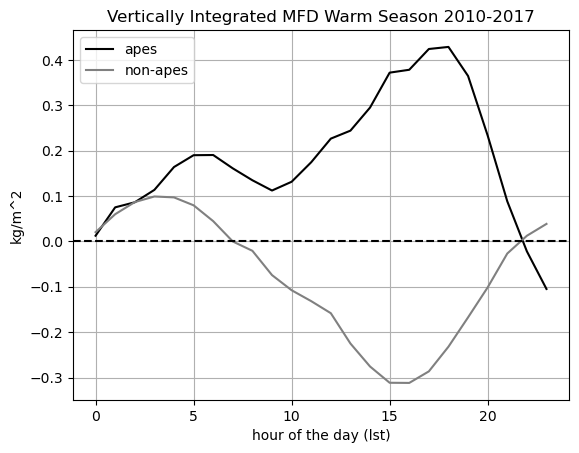

In [408]:
pdf_vimc = pd.merge(diurnpd, pdf, left_index=True, right_index=True, how='inner')

pdf_vimc['time'] = pd.to_datetime(pdf_vimc['time'])

pdf_vimc['hr'] = pdf_vimc['time'].dt.hour

apes = pdf_vimc[pdf_vimc['APE']==True]

nonapes = pdf_vimc[pdf_vimc['APE']==False]

apesgroup = apes.groupby('hr')['vimc'].mean()

nonapesgroup = nonapes.groupby('hr')['vimc'].mean()

plt.plot(apesgroup.index, apesgroup.values, color='black', label='apes')

plt.plot(nonapesgroup.index, nonapesgroup.values, color='grey', label='non-apes')

plt.legend()

plt.ylabel("kg/m^2")

plt.xlabel("hour of the day (lst)")

plt.title("Vertically Integrated MFD Warm Season 2010-2017")

plt.grid()

plt.axhline(0, color='black', linestyle='--')

plt.show()

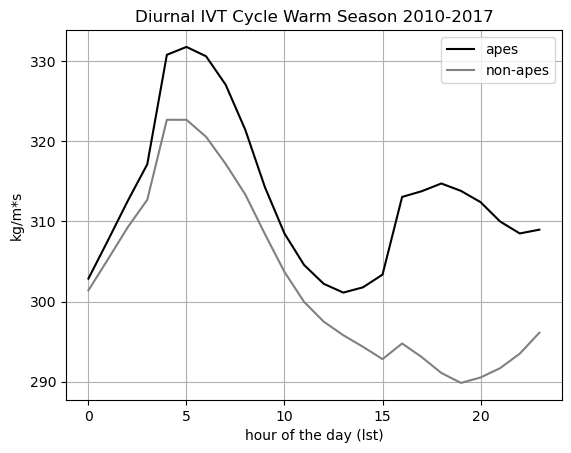

In [448]:
pdf_ivt = pd.merge(diurnpd, pdf, left_index=True, right_index=True, how='inner')

pdf_ivt['time'] = pd.to_datetime(pdf_ivt['time'])

pdf_ivt['hr'] = pdf_ivt['time'].dt.hour

apes = pdf_ivt[pdf_ivt['APE']==True]

nonapes = pdf_ivt[pdf_ivt['APE']==False]

apesgroup = apes.groupby('hr')['ivt'].mean()

nonapesgroup = nonapes.groupby('hr')['ivt'].mean()

plt.plot(apesgroup.index, apesgroup.values, color='black', label='apes')

plt.plot(nonapesgroup.index, nonapesgroup.values, color='grey', label='non-apes')

plt.legend()

plt.ylabel("kg/m*s")

plt.xlabel("hour of the day (lst)")

plt.title("Diurnal IVT Cycle Warm Season 2010-2017")

plt.grid()

plt.show()

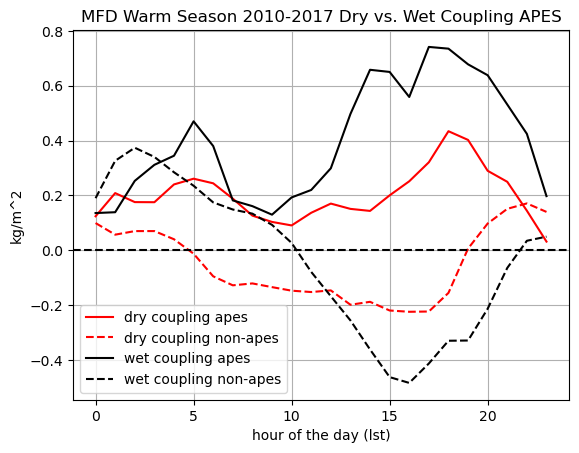

In [424]:
pdf_vimc = pd.merge(diurnpd, couplingdf, left_index=True, right_index=True, how='inner')

pdf_vimc['time'] = pd.to_datetime(pdf_vimc['time'])

pdf_vimc['hr'] = pdf_vimc['time'].dt.hour

#separating into dry/wet coupling apes

apes_dry = pdf_vimc[(pdf_vimc['APE']==True) & (pdf_vimc['dry_coupling']==True)]

apes_wet = pdf_vimc[(pdf_vimc['APE']==True) & (pdf_vimc['wet_coupling']==True)]

non_apes_dry = pdf_vimc[(pdf_vimc['APE']==False) & (pdf_vimc['dry_coupling']==True)]

non_apes_wet = pdf_vimc[(pdf_vimc['APE']==False) & (pdf_vimc['wet_coupling']==True)]

apes_dry_group = apes_dry.groupby('hr')['vimc'].mean()

apes_wet_group = apes_wet.groupby('hr')['vimc'].mean()

non_apes_dry_group = non_apes_dry.groupby('hr')['vimc'].mean()

non_apes_wet_group = non_apes_wet.groupby('hr')['vimc'].mean()

#plotting

plt.plot(apes_dry_group.index, apes_dry_group.values, color='red', label='dry coupling apes')

plt.plot(non_apes_dry_group.index, non_apes_dry_group.values, color='red', label='dry coupling non-apes',linestyle='--')

plt.plot(apes_wet_group.index, apes_wet_group.values, color='black', label='wet coupling apes')

plt.plot(non_apes_wet_group.index, non_apes_wet_group.values, color='black', label='wet coupling non-apes',linestyle='--')

plt.legend()

plt.ylabel("kg/m^2")

plt.xlabel("hour of the day (lst)")

plt.title("MFD Warm Season 2010-2017 Dry vs. Wet Coupling APES")

plt.grid()

plt.axhline(0, color='black', linestyle='--')

plt.show()